In [1]:
import json
import pandas as pd
import os,sys

import pickle

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from nltk.stem import *
import numpy as np
import textmining
import re
import lda
import lda.datasets

from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon
from nltk.corpus import nps_chat
from scipy.sparse import coo_matrix
from gensim import corpora, models
import gensim

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:862: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [4]:
stopWords = set(stopwords.words('english'))

stemmer = SnowballStemmer("english")
stopWords |= set(nps_chat.words())
stopWords |= set(opinion_lexicon.negative())
stopWords |= set(opinion_lexicon.positive())

In [5]:
#Supress default INFO logging

import logging
#logger = logging.getLogger()
#logger.setLevel(logging.CRITICAL)

In [5]:
#filename = 'Yelp-Recommendation-System/input/reviewTest.json'
filename='data/review.json'
with open(filename, encoding="utf8", errors="ignore") as fp:
    sample_object = json.loads(fp.readline())
    column_names = list(sample_object.keys())
    
print("Column names:\n{}".format(column_names))

Column names:
['review_id', 'user_id', 'business_id', 'stars', 'date', 'text', 'useful', 'funny', 'cool']


In [6]:
reviews = []

#filename = 'Yelp-Recommendation-System/input/reviewTest.json'
filename='data/filtered_review.json'
with open(filename, encoding="utf8", errors="ignore") as fp:
    for line in fp:
        review = json.loads(line)
        selected_review = []
        for item in column_names:
            selected_review.append(review[item])
        reviews.append(selected_review)

In [7]:
reviews[0]

['ByRzJ8rF2KJWLr-cUNU6EA',
 'kzyLOqiJvyw_FWFTw2rjiQ',
 'jQsNFOzDpxPmOurSWCg1vQ',
 1,
 '2017-06-03',
 'This place is horrible, we were so excited to try it since I got a gift card for my birthday. We went in an ordered are whole meal and they did not except are gift card, because their system was down. Unacceptable, this would have been so helpful if we would have known this prior!!',
 0,
 0,
 0]

In [8]:
reviews_df = pd.DataFrame(reviews, columns=column_names)

In [9]:
reviews_df.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,ByRzJ8rF2KJWLr-cUNU6EA,kzyLOqiJvyw_FWFTw2rjiQ,jQsNFOzDpxPmOurSWCg1vQ,1,2017-06-03,"This place is horrible, we were so excited to ...",0,0,0
1,i5UwUPlQFPLcE8p2gPFwBw,WZXp9-V2dqRRJqhGgRqueA,jQsNFOzDpxPmOurSWCg1vQ,4,2015-03-26,"For being fairly ""fast"" food.. Pei Wei (pronou...",1,0,0
2,EyQyvTTg2jX4or9bB8PC9g,XylT12exfdLiI_3uDLVIpw,jQsNFOzDpxPmOurSWCg1vQ,5,2012-12-30,"I decided to try it out, I'm celiac and theref...",2,1,1
3,G-EFA005besj5uHsH0sQFA,Ji9PeffxjwqPLO7pEfSpKQ,jQsNFOzDpxPmOurSWCg1vQ,3,2009-01-12,I'm not saying Pei Wei is the best asian food ...,1,1,1
4,6PcJSGUBSLjt4VLXos5C4A,TLIWzAJPrET0zX4_vgvLhg,jQsNFOzDpxPmOurSWCg1vQ,3,2015-07-11,Sometimes the food is spot on and delicious an...,0,0,0


In [10]:
reviews_df.count()

review_id      3216538
user_id        3216538
business_id    3216538
stars          3216538
date           3216538
text           3216538
useful         3216538
funny          3216538
cool           3216538
dtype: int64

### Pickle and Unpickle Reviews dataframe

In [27]:
file_Name = "reviews_pickle.pkl"
# open the file for writing
fileObject = open(file_Name,'wb') 

# this writes the object reviews_df to the
# file named 'reviews_pickle.pkl'
pickle.dump(reviews_df,fileObject)   

# close the fileObject
fileObject.close()

In [42]:
# open the file for reading
fileObject = open(file_Name,'rb')
# load the object from the file into var b
reviews_df = pickle.load(fileObject)

### Exploratory Analysis

In [162]:
counts_per_star_dict = dict(reviews_df['stars'].value_counts())
star_counts = sorted(review_count_dict.items(), key=lambda x:x[0])
star_counts

NameError: name 'reviews_df' is not defined

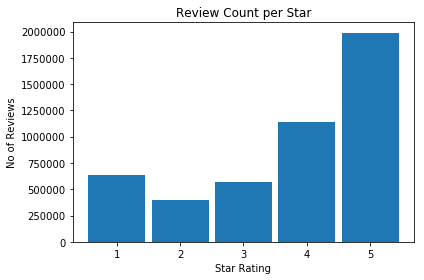

In [159]:
fig, ax = plt.subplots()

plt.bar(*zip(*star_counts),width=0.9)

ax.set_title("Review Count per Star")
ax.set_xlabel("Star Rating")
ax.set_ylabel("No of Reviews")
fig.tight_layout()

In [11]:
docs = pd.Series(reviews_df['text'].values,index=reviews_df['review_id']).to_dict()

In [123]:
tdm = textmining.TermDocumentMatrix()

for review_id,doc in docs.items():
    if doc:
        tdm.add_doc(doc)
    else:
        print(review_id,doc)

In [124]:
temp = list(tdm.rows(cutoff=1))
vocab = tuple(temp[0])
X = np.array(temp[1:])

# document-term matrix
print("* The 'document-term' matrix")
print("type(X): {}".format(type(X)))
print("shape: {}".format(X.shape))
# print("X:", X)

model = lda.LDA(n_topics=10, n_iter=1000, random_state=1)
model.fit(X)
doc_topic = model.doc_topic_
print("Document Topic Distribution\n")
# print doc_topic
for i, doc_dist in enumerate(doc_topic):
    print("Doc ", i,"\n"),
    print(doc_dist)
    for j,topic in enumerate(doc_dist):
         print("Topic ",j," = ",topic)


INFO:lda:n_documents: 100
INFO:lda:vocab_size: 1968
INFO:lda:n_words: 9377
INFO:lda:n_topics: 10
INFO:lda:n_iter: 1000
INFO:lda:<0> log likelihood: -94725


* The 'document-term' matrix
type(X): <class 'numpy.ndarray'>
shape: (100, 1968)


INFO:lda:<10> log likelihood: -73139
INFO:lda:<20> log likelihood: -70530
INFO:lda:<30> log likelihood: -69684
INFO:lda:<40> log likelihood: -69220
INFO:lda:<50> log likelihood: -69011
INFO:lda:<60> log likelihood: -68727
INFO:lda:<70> log likelihood: -68545
INFO:lda:<80> log likelihood: -68519
INFO:lda:<90> log likelihood: -68099
INFO:lda:<100> log likelihood: -68139
INFO:lda:<110> log likelihood: -68051
INFO:lda:<120> log likelihood: -67654
INFO:lda:<130> log likelihood: -67536
INFO:lda:<140> log likelihood: -67498
INFO:lda:<150> log likelihood: -67468
INFO:lda:<160> log likelihood: -67332
INFO:lda:<170> log likelihood: -67408
INFO:lda:<180> log likelihood: -67306
INFO:lda:<190> log likelihood: -67489
INFO:lda:<200> log likelihood: -67347
INFO:lda:<210> log likelihood: -67349
INFO:lda:<220> log likelihood: -67357
INFO:lda:<230> log likelihood: -67341
INFO:lda:<240> log likelihood: -67246
INFO:lda:<250> log likelihood: -67414
INFO:lda:<260> log likelihood: -67183
INFO:lda:<270> log li

Document Topic Distribution

Doc  0 

[ 0.00048309  0.07777778  0.00048309  0.29033816  0.00048309  0.34347826
  0.17922705  0.00048309  0.00048309  0.10676329]
Topic  0  =  0.00048309178744
Topic  1  =  0.0777777777778
Topic  2  =  0.00048309178744
Topic  3  =  0.290338164251
Topic  4  =  0.00048309178744
Topic  5  =  0.34347826087
Topic  6  =  0.17922705314
Topic  7  =  0.00048309178744
Topic  8  =  0.00048309178744
Topic  9  =  0.106763285024
Doc  1 

[ 0.00059172  0.03609467  0.00059172  0.3556213   0.00059172  0.21952663
  0.03017751  0.00059172  0.04792899  0.30828402]
Topic  0  =  0.000591715976331
Topic  1  =  0.0360946745562
Topic  2  =  0.000591715976331
Topic  3  =  0.355621301775
Topic  4  =  0.000591715976331
Topic  5  =  0.219526627219
Topic  6  =  0.0301775147929
Topic  7  =  0.000591715976331
Topic  8  =  0.0479289940828
Topic  9  =  0.308284023669
Doc  2 

[  2.46305419e-04   2.46305419e-04   2.46305419e-04   2.46305419e-04
   2.46305419e-04   2.46305419e-04   2.071428

Topic  7  =  0.00277777777778
Topic  8  =  0.00277777777778
Topic  9  =  0.00277777777778
Doc  28 

[ 0.00138889  0.00138889  0.22361111  0.50138889  0.08472222  0.09861111
  0.00138889  0.00138889  0.04305556  0.04305556]
Topic  0  =  0.00138888888889
Topic  1  =  0.00138888888889
Topic  2  =  0.223611111111
Topic  3  =  0.501388888889
Topic  4  =  0.0847222222222
Topic  5  =  0.0986111111111
Topic  6  =  0.00138888888889
Topic  7  =  0.00138888888889
Topic  8  =  0.0430555555556
Topic  9  =  0.0430555555556
Doc  29 

[ 0.39166667  0.00277778  0.00277778  0.50277778  0.00277778  0.08611111
  0.00277778  0.00277778  0.00277778  0.00277778]
Topic  0  =  0.391666666667
Topic  1  =  0.00277777777778
Topic  2  =  0.00277777777778
Topic  3  =  0.502777777778
Topic  4  =  0.00277777777778
Topic  5  =  0.0861111111111
Topic  6  =  0.00277777777778
Topic  7  =  0.00277777777778
Topic  8  =  0.00277777777778
Topic  9  =  0.00277777777778
Doc  30 

[ 0.15777778  0.09111111  0.00222222  0.4688888

  0.03875  0.01375]
Topic  0  =  0.00125
Topic  1  =  0.02625
Topic  2  =  0.05125
Topic  3  =  0.57625
Topic  4  =  0.27625
Topic  5  =  0.00125
Topic  6  =  0.01375
Topic  7  =  0.00125
Topic  8  =  0.03875
Topic  9  =  0.01375
Doc  78 

[ 0.00526316  0.00526316  0.00526316  0.58421053  0.21578947  0.00526316
  0.00526316  0.00526316  0.11052632  0.05789474]
Topic  0  =  0.00526315789474
Topic  1  =  0.00526315789474
Topic  2  =  0.00526315789474
Topic  3  =  0.584210526316
Topic  4  =  0.215789473684
Topic  5  =  0.00526315789474
Topic  6  =  0.00526315789474
Topic  7  =  0.00526315789474
Topic  8  =  0.110526315789
Topic  9  =  0.0578947368421
Doc  79 

[ 0.13505155  0.08350515  0.00103093  0.51649485  0.23814433  0.00103093
  0.01134021  0.00103093  0.01134021  0.00103093]
Topic  0  =  0.135051546392
Topic  1  =  0.0835051546392
Topic  2  =  0.00103092783505
Topic  3  =  0.516494845361
Topic  4  =  0.238144329897
Topic  5  =  0.00103092783505
Topic  6  =  0.0113402061856
Topic  7 

In [114]:
topic_word = model.topic_word_
print("Topic Word Distribution\n")
# print topic_word
n_top_words = 10
for i, word_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(word_dist)][:-(n_top_words + 1):-1]
    word_dist_sorted = sorted(word_dist,reverse=True)
    print("Topic ", i,"\n")
    for j,words in enumerate(topic_words):
        print(words," = ",word_dist_sorted[j])
    # print "Topic ", i," ", word_dist,"\n"

for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

Topic Word Distribution

Topic  0 

that  =  0.0513177080521
had  =  0.0472673759248
not  =  0.032416158125
food  =  0.0297159367068
asian  =  0.0270157152887
some  =  0.0270157152887
t  =  0.0256656045796
as  =  0.0243154938705
sauce  =  0.0216152724523
than  =  0.0189150510342
Topic  1 

of  =  0.0751030243766
out  =  0.0436718586296
as  =  0.0314486275058
chinese  =  0.0279562757561
with  =  0.0227177481316
take  =  0.0227177481316
fast  =  0.0192253963819
rice  =  0.0174792205071
wife  =  0.0157330446323
lettuce  =  0.0122406928826
Topic  2 

was  =  0.058870651321
we  =  0.049061600837
they  =  0.0376177086058
chicken  =  0.0327131833639
beef  =  0.0245389746273
them  =  0.0229041328799
an  =  0.0229041328799
too  =  0.0212692911326
rice  =  0.0212692911326
mongolian  =  0.017999607638
Topic  3 

the  =  0.0580834120161
it  =  0.0512504348258
i  =  0.0512504348258
a  =  0.0410009690404
to  =  0.039448019679
and  =  0.0341679918501
is  =  0.0304409133827
in  =  0.0245397058093
you 

In [7]:
reviews_dict = dict()

#filename = 'Yelp-Recommendation-System/input/reviewTest.json'
filename='data/filtered_review.json'
with open(filename, encoding="utf8", errors="ignore") as fp:
    for line in fp:
        review = json.loads(line)
        text = review['text']
        text = re.sub('[^A-Za-z ]+', '', text)
        text = [word.strip() for word in text.lower().split() if word.strip() not in stopWords]
        reviews_dict[review['review_id']] = text
    
texts = list(reviews_dict.values())
        
# texts = []

# for review_id,text in docs.items():
#     # clean document string
#     text = re.sub('[^A-Za-z ]+', '', text)

#     # tokenize and removes stopwords from document string
#     text = [word.strip() for word in text.lower().split() if word.strip() not in stopWords]

#     # add tokens to list
#     texts.append(text)

In [8]:
len(texts)

3216538

The Dictionary() function traverses texts, assigning a unique integer id to each unique token while also collecting word counts and relevant statistics.

In [9]:
# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
#print(dictionary.token2id)

The doc2bow() function converts dictionary into a bag-of-words. The result, corpus, is a list of vectors equal to the number of documents. In each document vector is a series of tuples.<br>doc2bow() only includes terms that actually occur: terms that do not occur in a document will not appear in that document’s vector.

In [16]:
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]
# The tuples are (term ID, term frequency) pairs
print(corpus[1])

[(14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1)]


Applying the LDA model

In [17]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

#ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=20, id2word = dictionary, passes=20)
ldamodel = gensim.models.ldamulticore.LdaMulticore(corpus, num_topics=20, id2word = dictionary, passes=20, workers=3)

2017-10-31 14:56:17,500 : INFO : using symmetric alpha at 0.05
2017-10-31 14:56:17,500 : INFO : using symmetric eta at 5.631179163285613e-07
2017-10-31 14:56:17,784 : INFO : using serial LDA version on this node
2017-10-31 14:58:26,116 : INFO : running online LDA training, 20 topics, 20 passes over the supplied corpus of 3216538 documents, updating every 6000 documents, evaluating every ~60000 documents, iterating 50x with a convergence threshold of 0.001000
2017-10-31 14:58:26,228 : INFO : training LDA model using 3 processes
2017-10-31 14:58:26,294 : INFO : PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/3216538, outstanding queue size 1
2017-10-31 14:58:38,041 : INFO : PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/3216538, outstanding queue size 2
2017-10-31 14:58:38,047 : INFO : PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/3216538, outstanding queue size 3
2017-10-31 14:58:38,053 : INFO : PROGRESS: pass 0, dispatched chunk #3 = documen

2017-10-31 15:01:10,669 : INFO : topic #14 (0.050): 0.020*"restaurant" + 0.009*"location" + 0.009*"staff" + 0.007*"sandwich" + 0.007*"salad" + 0.007*"order" + 0.007*"ordered" + 0.005*"beef" + 0.005*"vegas" + 0.005*"sushi"
2017-10-31 15:01:10,739 : INFO : topic #13 (0.050): 0.025*"restaurant" + 0.017*"tea" + 0.011*"sushi" + 0.010*"order" + 0.009*"ordered" + 0.008*"server" + 0.007*"meal" + 0.007*"staff" + 0.005*"tasty" + 0.005*"atmosphere"
2017-10-31 15:01:10,791 : INFO : topic #6 (0.050): 0.016*"ordered" + 0.008*"waitress" + 0.007*"restaurant" + 0.006*"tasty" + 0.006*"staff" + 0.005*"salad" + 0.005*"quality" + 0.005*"seemed" + 0.004*"korean" + 0.004*"dishes"
2017-10-31 15:01:10,872 : INFO : topic #16 (0.050): 0.013*"ordered" + 0.009*"order" + 0.008*"restaurant" + 0.008*"salad" + 0.007*"sandwich" + 0.007*"tasted" + 0.006*"beef" + 0.005*"waiter" + 0.005*"cheese" + 0.004*"meal"
2017-10-31 15:01:10,933 : INFO : topic #10 (0.050): 0.008*"sandwiches" + 0.008*"order" + 0.007*"beers" + 0.007*"o

2017-10-31 15:03:15,399 : INFO : topic #11 (0.050): 0.042*"pizza" + 0.026*"salad" + 0.020*"ordered" + 0.012*"restaurant" + 0.011*"meal" + 0.011*"order" + 0.009*"cheese" + 0.009*"staff" + 0.008*"pasta" + 0.005*"server"
2017-10-31 15:03:15,434 : INFO : topic #13 (0.050): 0.027*"restaurant" + 0.024*"tea" + 0.009*"order" + 0.008*"sushi" + 0.008*"server" + 0.008*"ordered" + 0.007*"staff" + 0.007*"meal" + 0.005*"atmosphere" + 0.004*"tasty"
2017-10-31 15:03:15,470 : INFO : topic #9 (0.050): 0.031*"buffet" + 0.015*"vegan" + 0.010*"restaurant" + 0.009*"ordered" + 0.008*"staff" + 0.008*"options" + 0.007*"selection" + 0.007*"indian" + 0.006*"patio" + 0.005*"tasty"
2017-10-31 15:03:15,505 : INFO : topic #2 (0.050): 0.020*"tacos" + 0.015*"taco" + 0.010*"hooters" + 0.010*"order" + 0.009*"staff" + 0.008*"chips" + 0.008*"burrito" + 0.007*"restaurant" + 0.007*"atmosphere" + 0.006*"meal"
2017-10-31 15:03:15,710 : INFO : topic diff=0.087369, rho=0.152499
2017-10-31 15:03:15,795 : INFO : PROGRESS: pass 0,

2017-10-31 15:05:22,528 : INFO : PROGRESS: pass 0, dispatched chunk #79 = documents up to #160000/3216538, outstanding queue size 6
2017-10-31 15:05:22,538 : INFO : PROGRESS: pass 0, dispatched chunk #80 = documents up to #162000/3216538, outstanding queue size 7
2017-10-31 15:05:46,490 : INFO : merging changes from 14000 documents into a model of 3216538 documents
2017-10-31 15:05:53,456 : INFO : topic #17 (0.050): 0.026*"location" + 0.015*"order" + 0.013*"hotel" + 0.012*"vegas" + 0.012*"ordered" + 0.012*"cheese" + 0.010*"staff" + 0.009*"restaurant" + 0.005*"hakkasan" + 0.005*"stars"
2017-10-31 15:05:53,496 : INFO : topic #0 (0.050): 0.042*"order" + 0.012*"ordered" + 0.012*"breakfast" + 0.011*"manager" + 0.011*"waitress" + 0.011*"server" + 0.009*"customer" + 0.009*"restaurant" + 0.008*"waited" + 0.008*"staff"
2017-10-31 15:05:53,539 : INFO : topic #2 (0.050): 0.025*"tacos" + 0.015*"taco" + 0.013*"chips" + 0.012*"burrito" + 0.009*"order" + 0.009*"staff" + 0.007*"restaurant" + 0.007*"or

2017-10-31 15:10:47,375 : INFO : topic #13 (0.050): 0.033*"restaurant" + 0.029*"tea" + 0.009*"staff" + 0.008*"server" + 0.008*"meal" + 0.007*"atmosphere" + 0.007*"order" + 0.007*"ordered" + 0.006*"sushi" + 0.005*"dining"
2017-10-31 15:10:47,418 : INFO : topic #4 (0.050): 0.034*"cheese" + 0.023*"sandwich" + 0.021*"burgers" + 0.010*"bacon" + 0.007*"ordered" + 0.007*"onion" + 0.007*"order" + 0.006*"beef" + 0.006*"grilled" + 0.006*"bun"
2017-10-31 15:10:47,463 : INFO : topic #11 (0.050): 0.055*"pizza" + 0.033*"salad" + 0.021*"ordered" + 0.013*"cheese" + 0.011*"pasta" + 0.011*"order" + 0.011*"restaurant" + 0.010*"meal" + 0.007*"staff" + 0.006*"dressing"
2017-10-31 15:10:47,675 : INFO : topic diff=0.056681, rho=0.090167
2017-10-31 15:10:47,735 : INFO : PROGRESS: pass 0, dispatched chunk #131 = documents up to #264000/3216538, outstanding queue size 3
2017-10-31 15:10:51,840 : INFO : PROGRESS: pass 0, dispatched chunk #132 = documents up to #266000/3216538, outstanding queue size 2
2017-10-31

2017-10-31 15:13:04,467 : INFO : PROGRESS: pass 0, dispatched chunk #159 = documents up to #320000/3216538, outstanding queue size 7
2017-10-31 15:13:28,495 : INFO : merging changes from 14000 documents into a model of 3216538 documents
2017-10-31 15:13:38,084 : INFO : topic #4 (0.050): 0.035*"cheese" + 0.030*"sandwich" + 0.021*"burgers" + 0.011*"bacon" + 0.008*"ordered" + 0.007*"onion" + 0.007*"beef" + 0.007*"order" + 0.007*"sandwiches" + 0.007*"bun"
2017-10-31 15:13:38,139 : INFO : topic #10 (0.050): 0.015*"selection" + 0.014*"sandwiches" + 0.013*"beers" + 0.009*"cafe" + 0.008*"gluten" + 0.007*"staff" + 0.007*"pho" + 0.006*"pub" + 0.006*"sandwich" + 0.006*"market"
2017-10-31 15:13:38,183 : INFO : topic #17 (0.050): 0.036*"location" + 0.014*"order" + 0.013*"vegas" + 0.012*"hotel" + 0.011*"ordered" + 0.010*"staff" + 0.009*"restaurant" + 0.008*"cheese" + 0.006*"closed" + 0.006*"stars"
2017-10-31 15:13:38,229 : INFO : topic #12 (0.050): 0.035*"und" + 0.020*"der" + 0.019*"das" + 0.014*"is

2017-10-31 15:15:56,382 : INFO : -9.637 per-word bound, 795.9 perplexity estimate based on a held-out corpus of 2000 documents with 41471 words
2017-10-31 15:15:56,398 : INFO : PROGRESS: pass 0, dispatched chunk #183 = documents up to #368000/3216538, outstanding queue size 4
2017-10-31 15:16:01,481 : INFO : merging changes from 6000 documents into a model of 3216538 documents
2017-10-31 15:16:12,038 : INFO : topic #13 (0.050): 0.035*"restaurant" + 0.034*"tea" + 0.010*"staff" + 0.009*"atmosphere" + 0.008*"meal" + 0.008*"server" + 0.008*"view" + 0.007*"dining" + 0.006*"ordered" + 0.006*"order"
2017-10-31 15:16:12,086 : INFO : topic #14 (0.050): 0.020*"restaurant" + 0.011*"staff" + 0.009*"location" + 0.009*"starbucks" + 0.006*"meal" + 0.005*"quality" + 0.005*"vegas" + 0.005*"order" + 0.004*"rib" + 0.004*"ordered"
2017-10-31 15:16:12,133 : INFO : topic #8 (0.050): 0.030*"cake" + 0.012*"bakery" + 0.011*"gelato" + 0.009*"pastries" + 0.009*"cupcakes" + 0.008*"desserts" + 0.008*"vanilla" + 0.

2017-10-31 15:18:20,375 : INFO : topic diff=0.054219, rho=0.071247
2017-10-31 15:18:20,459 : INFO : PROGRESS: pass 0, dispatched chunk #206 = documents up to #414000/3216538, outstanding queue size 3
2017-10-31 15:18:24,306 : INFO : PROGRESS: pass 0, dispatched chunk #207 = documents up to #416000/3216538, outstanding queue size 2
2017-10-31 15:18:27,202 : INFO : PROGRESS: pass 0, dispatched chunk #208 = documents up to #418000/3216538, outstanding queue size 3
2017-10-31 15:18:27,223 : INFO : PROGRESS: pass 0, dispatched chunk #209 = documents up to #420000/3216538, outstanding queue size 4
2017-10-31 15:18:27,231 : INFO : PROGRESS: pass 0, dispatched chunk #210 = documents up to #422000/3216538, outstanding queue size 5
2017-10-31 15:18:27,237 : INFO : PROGRESS: pass 0, dispatched chunk #211 = documents up to #424000/3216538, outstanding queue size 6
2017-10-31 15:18:27,243 : INFO : PROGRESS: pass 0, dispatched chunk #212 = documents up to #426000/3216538, outstanding queue size 7
20

2017-10-31 15:21:14,466 : INFO : topic #6 (0.050): 0.012*"ordered" + 0.007*"waitress" + 0.006*"restaurant" + 0.005*"filet" + 0.005*"seemed" + 0.005*"bill" + 0.005*"tasty" + 0.005*"staff" + 0.005*"waiter" + 0.005*"tip"
2017-10-31 15:21:14,509 : INFO : topic #17 (0.050): 0.043*"location" + 0.013*"order" + 0.011*"hotel" + 0.011*"vegas" + 0.010*"staff" + 0.009*"ordered" + 0.008*"closed" + 0.008*"restaurant" + 0.006*"stars" + 0.006*"review"
2017-10-31 15:21:14,735 : INFO : topic diff=0.050207, rho=0.066519
2017-10-31 15:21:14,802 : INFO : PROGRESS: pass 0, dispatched chunk #234 = documents up to #470000/3216538, outstanding queue size 3
2017-10-31 15:21:19,767 : INFO : PROGRESS: pass 0, dispatched chunk #235 = documents up to #472000/3216538, outstanding queue size 2
2017-10-31 15:21:23,380 : INFO : PROGRESS: pass 0, dispatched chunk #236 = documents up to #474000/3216538, outstanding queue size 3
2017-10-31 15:21:23,391 : INFO : PROGRESS: pass 0, dispatched chunk #237 = documents up to #47

2017-10-31 15:24:08,179 : INFO : topic #8 (0.050): 0.032*"cake" + 0.012*"bakery" + 0.012*"gelato" + 0.012*"cupcakes" + 0.010*"cupcake" + 0.010*"desserts" + 0.009*"pastries" + 0.008*"vanilla" + 0.008*"milk" + 0.008*"latte"
2017-10-31 15:24:08,233 : INFO : topic #12 (0.050): 0.037*"und" + 0.022*"der" + 0.020*"das" + 0.016*"ist" + 0.014*"nicht" + 0.013*"war" + 0.013*"ich" + 0.012*"mit" + 0.012*"sehr" + 0.011*"auch"
2017-10-31 15:24:08,274 : INFO : topic #17 (0.050): 0.045*"location" + 0.013*"order" + 0.011*"hotel" + 0.011*"vegas" + 0.010*"staff" + 0.009*"closed" + 0.009*"ordered" + 0.008*"restaurant" + 0.007*"stars" + 0.006*"review"
2017-10-31 15:24:08,316 : INFO : topic #19 (0.050): 0.036*"bbq" + 0.013*"brisket" + 0.012*"crepe" + 0.011*"pulled" + 0.010*"cheese" + 0.007*"sides" + 0.006*"macarons" + 0.006*"meats" + 0.006*"ordered" + 0.005*"smoked"
2017-10-31 15:24:08,352 : INFO : topic #10 (0.050): 0.019*"selection" + 0.017*"beers" + 0.013*"sandwiches" + 0.010*"cafe" + 0.008*"staff" + 0.00

2017-10-31 15:26:15,045 : INFO : PROGRESS: pass 0, dispatched chunk #288 = documents up to #578000/3216538, outstanding queue size 5
2017-10-31 15:26:15,053 : INFO : PROGRESS: pass 0, dispatched chunk #289 = documents up to #580000/3216538, outstanding queue size 6
2017-10-31 15:26:15,062 : INFO : PROGRESS: pass 0, dispatched chunk #290 = documents up to #582000/3216538, outstanding queue size 7
2017-10-31 15:26:37,449 : INFO : merging changes from 14000 documents into a model of 3216538 documents
2017-10-31 15:26:46,832 : INFO : topic #15 (0.050): 0.034*"sushi" + 0.030*"rice" + 0.017*"spicy" + 0.017*"ordered" + 0.014*"thai" + 0.014*"restaurant" + 0.014*"dishes" + 0.013*"beef" + 0.012*"noodles" + 0.012*"shrimp"
2017-10-31 15:26:46,888 : INFO : topic #17 (0.050): 0.047*"location" + 0.013*"order" + 0.012*"hotel" + 0.011*"vegas" + 0.010*"staff" + 0.009*"closed" + 0.008*"ordered" + 0.008*"restaurant" + 0.007*"stars" + 0.007*"review"
2017-10-31 15:26:46,929 : INFO : topic #1 (0.050): 0.019*

2017-10-31 15:28:49,299 : INFO : topic diff=0.055774, rho=0.057354
2017-10-31 15:28:49,385 : INFO : PROGRESS: pass 0, dispatched chunk #313 = documents up to #628000/3216538, outstanding queue size 3
2017-10-31 15:28:53,233 : INFO : PROGRESS: pass 0, dispatched chunk #314 = documents up to #630000/3216538, outstanding queue size 2
2017-10-31 15:28:56,222 : INFO : PROGRESS: pass 0, dispatched chunk #315 = documents up to #632000/3216538, outstanding queue size 3
2017-10-31 15:28:56,231 : INFO : PROGRESS: pass 0, dispatched chunk #316 = documents up to #634000/3216538, outstanding queue size 4
2017-10-31 15:28:56,240 : INFO : PROGRESS: pass 0, dispatched chunk #317 = documents up to #636000/3216538, outstanding queue size 5
2017-10-31 15:28:56,250 : INFO : PROGRESS: pass 0, dispatched chunk #318 = documents up to #638000/3216538, outstanding queue size 6
2017-10-31 15:28:56,259 : INFO : PROGRESS: pass 0, dispatched chunk #319 = documents up to #640000/3216538, outstanding queue size 7
20

2017-10-31 15:31:30,315 : INFO : topic #3 (0.050): 0.032*"et" + 0.030*"le" + 0.021*"un" + 0.014*"est" + 0.013*"pas" + 0.012*"des" + 0.012*"une" + 0.011*"en" + 0.011*"je" + 0.010*"au"
2017-10-31 15:31:30,351 : INFO : topic #19 (0.050): 0.039*"bbq" + 0.013*"brisket" + 0.013*"pulled" + 0.010*"crepe" + 0.010*"cheese" + 0.009*"sides" + 0.006*"smoked" + 0.005*"meats" + 0.005*"ordered" + 0.005*"macarons"
2017-10-31 15:31:30,560 : INFO : topic diff=0.048871, rho=0.054800
2017-10-31 15:31:30,630 : INFO : PROGRESS: pass 0, dispatched chunk #341 = documents up to #684000/3216538, outstanding queue size 3
2017-10-31 15:31:34,446 : INFO : PROGRESS: pass 0, dispatched chunk #342 = documents up to #686000/3216538, outstanding queue size 2
2017-10-31 15:31:37,323 : INFO : PROGRESS: pass 0, dispatched chunk #343 = documents up to #688000/3216538, outstanding queue size 3
2017-10-31 15:31:37,332 : INFO : PROGRESS: pass 0, dispatched chunk #344 = documents up to #690000/3216538, outstanding queue size 4


2017-10-31 15:34:11,145 : INFO : topic #3 (0.050): 0.032*"et" + 0.031*"le" + 0.021*"un" + 0.014*"est" + 0.013*"pas" + 0.013*"des" + 0.012*"une" + 0.012*"en" + 0.011*"je" + 0.011*"au"
2017-10-31 15:34:11,194 : INFO : topic #1 (0.050): 0.018*"ordered" + 0.013*"dish" + 0.013*"lobster" + 0.012*"meal" + 0.012*"restaurant" + 0.011*"dessert" + 0.011*"cooked" + 0.010*"shrimp" + 0.008*"potatoes" + 0.008*"served"
2017-10-31 15:34:11,243 : INFO : topic #2 (0.050): 0.042*"tacos" + 0.031*"chips" + 0.026*"taco" + 0.026*"burrito" + 0.012*"ordered" + 0.010*"guacamole" + 0.009*"rice" + 0.009*"cheese" + 0.009*"chipotle" + 0.009*"nachos"
2017-10-31 15:34:11,280 : INFO : topic #8 (0.050): 0.033*"cake" + 0.012*"cupcakes" + 0.012*"bakery" + 0.009*"cupcake" + 0.009*"gelato" + 0.009*"milk" + 0.009*"pastries" + 0.008*"latte" + 0.008*"desserts" + 0.008*"strawberry"
2017-10-31 15:34:11,328 : INFO : topic #9 (0.050): 0.039*"buffet" + 0.020*"indian" + 0.017*"vegan" + 0.015*"options" + 0.012*"brunch" + 0.012*"veget

2017-10-31 15:36:30,352 : INFO : PROGRESS: pass 0, dispatched chunk #394 = documents up to #790000/3216538, outstanding queue size 3
2017-10-31 15:36:30,358 : INFO : PROGRESS: pass 0, dispatched chunk #395 = documents up to #792000/3216538, outstanding queue size 4
2017-10-31 15:36:30,364 : INFO : PROGRESS: pass 0, dispatched chunk #396 = documents up to #794000/3216538, outstanding queue size 5
2017-10-31 15:36:30,370 : INFO : PROGRESS: pass 0, dispatched chunk #397 = documents up to #796000/3216538, outstanding queue size 6
2017-10-31 15:36:30,377 : INFO : PROGRESS: pass 0, dispatched chunk #398 = documents up to #798000/3216538, outstanding queue size 7
2017-10-31 15:36:52,962 : INFO : merging changes from 14000 documents into a model of 3216538 documents
2017-10-31 15:37:02,278 : INFO : topic #8 (0.050): 0.032*"cake" + 0.013*"bakery" + 0.012*"cupcakes" + 0.009*"milk" + 0.009*"cupcake" + 0.009*"latte" + 0.009*"pastries" + 0.009*"gelato" + 0.008*"vanilla" + 0.008*"strawberry"
2017-10

2017-10-31 15:39:13,666 : INFO : topic #9 (0.050): 0.037*"buffet" + 0.021*"indian" + 0.017*"vegan" + 0.016*"options" + 0.013*"brunch" + 0.013*"vegetarian" + 0.010*"selection" + 0.009*"patio" + 0.009*"restaurant" + 0.008*"naan"
2017-10-31 15:39:13,905 : INFO : topic diff=0.049396, rho=0.049207
2017-10-31 15:39:13,975 : INFO : PROGRESS: pass 0, dispatched chunk #421 = documents up to #844000/3216538, outstanding queue size 3
2017-10-31 15:39:18,079 : INFO : PROGRESS: pass 0, dispatched chunk #422 = documents up to #846000/3216538, outstanding queue size 2
2017-10-31 15:39:21,241 : INFO : PROGRESS: pass 0, dispatched chunk #423 = documents up to #848000/3216538, outstanding queue size 3
2017-10-31 15:39:21,247 : INFO : PROGRESS: pass 0, dispatched chunk #424 = documents up to #850000/3216538, outstanding queue size 4
2017-10-31 15:39:21,255 : INFO : PROGRESS: pass 0, dispatched chunk #425 = documents up to #852000/3216538, outstanding queue size 5
2017-10-31 15:39:21,261 : INFO : PROGRESS

2017-10-31 15:42:15,502 : INFO : topic #15 (0.050): 0.033*"sushi" + 0.031*"rice" + 0.018*"spicy" + 0.017*"thai" + 0.017*"ordered" + 0.014*"beef" + 0.014*"restaurant" + 0.014*"noodles" + 0.013*"dishes" + 0.012*"order"
2017-10-31 15:42:15,574 : INFO : topic #18 (0.050): 0.026*"breakfast" + 0.023*"prices" + 0.022*"staff" + 0.014*"quality" + 0.011*"location" + 0.011*"places" + 0.009*"selection" + 0.009*"parking" + 0.008*"grocery" + 0.007*"foods"
2017-10-31 15:42:15,656 : INFO : topic #0 (0.050): 0.047*"order" + 0.023*"ordered" + 0.018*"server" + 0.016*"waitress" + 0.016*"manager" + 0.016*"customer" + 0.012*"waited" + 0.012*"breakfast" + 0.011*"restaurant" + 0.009*"customers"
2017-10-31 15:42:15,993 : INFO : topic diff=0.050048, rho=0.047619
2017-10-31 15:42:16,109 : INFO : PROGRESS: pass 0, dispatched chunk #449 = documents up to #900000/3216538, outstanding queue size 3
2017-10-31 15:42:21,568 : INFO : PROGRESS: pass 0, dispatched chunk #450 = documents up to #902000/3216538, outstanding 

2017-10-31 15:44:54,962 : INFO : merging changes from 14000 documents into a model of 3216538 documents
2017-10-31 15:45:05,263 : INFO : topic #17 (0.050): 0.052*"location" + 0.015*"hotel" + 0.011*"vegas" + 0.010*"order" + 0.010*"closed" + 0.010*"staff" + 0.008*"strip" + 0.007*"review" + 0.007*"stars" + 0.007*"casino"
2017-10-31 15:45:05,331 : INFO : topic #8 (0.050): 0.031*"cake" + 0.013*"bakery" + 0.012*"cupcakes" + 0.011*"milk" + 0.011*"cupcake" + 0.010*"latte" + 0.009*"vanilla" + 0.009*"pastries" + 0.008*"gelato" + 0.008*"strawberry"
2017-10-31 15:45:05,391 : INFO : topic #6 (0.050): 0.008*"ordered" + 0.006*"waitress" + 0.005*"tip" + 0.005*"seemed" + 0.005*"restaurant" + 0.005*"filet" + 0.005*"bill" + 0.005*"glass" + 0.004*"staff" + 0.004*"tasty"
2017-10-31 15:45:05,436 : INFO : topic #4 (0.050): 0.046*"sandwich" + 0.043*"cheese" + 0.021*"burgers" + 0.013*"bacon" + 0.012*"sandwiches" + 0.011*"ordered" + 0.010*"grilled" + 0.009*"beef" + 0.009*"onion" + 0.009*"bun"
2017-10-31 15:45:0

2017-10-31 15:47:26,033 : INFO : PROGRESS: pass 0, dispatched chunk #501 = documents up to #1004000/3216538, outstanding queue size 3
2017-10-31 15:47:26,037 : INFO : PROGRESS: pass 0, dispatched chunk #502 = documents up to #1006000/3216538, outstanding queue size 4
2017-10-31 15:47:26,045 : INFO : PROGRESS: pass 0, dispatched chunk #503 = documents up to #1008000/3216538, outstanding queue size 5
2017-10-31 15:47:26,049 : INFO : PROGRESS: pass 0, dispatched chunk #504 = documents up to #1010000/3216538, outstanding queue size 6
2017-10-31 15:47:26,057 : INFO : PROGRESS: pass 0, dispatched chunk #505 = documents up to #1012000/3216538, outstanding queue size 7
2017-10-31 15:47:52,114 : INFO : merging changes from 14000 documents into a model of 3216538 documents
2017-10-31 15:48:03,358 : INFO : topic #9 (0.050): 0.036*"buffet" + 0.020*"indian" + 0.018*"vegan" + 0.017*"options" + 0.016*"brunch" + 0.014*"vegetarian" + 0.010*"selection" + 0.009*"patio" + 0.009*"restaurant" + 0.008*"staff

2017-10-31 15:50:12,773 : INFO : topic #12 (0.050): 0.037*"und" + 0.022*"der" + 0.020*"das" + 0.016*"ist" + 0.014*"nicht" + 0.013*"ich" + 0.013*"war" + 0.012*"mit" + 0.012*"sehr" + 0.012*"auch"
2017-10-31 15:50:12,983 : INFO : topic diff=0.049485, rho=0.043895
2017-10-31 15:50:13,056 : INFO : PROGRESS: pass 0, dispatched chunk #527 = documents up to #1056000/3216538, outstanding queue size 3
2017-10-31 15:50:17,066 : INFO : PROGRESS: pass 0, dispatched chunk #528 = documents up to #1058000/3216538, outstanding queue size 2
2017-10-31 15:50:20,245 : INFO : PROGRESS: pass 0, dispatched chunk #529 = documents up to #1060000/3216538, outstanding queue size 3
2017-10-31 15:50:20,253 : INFO : PROGRESS: pass 0, dispatched chunk #530 = documents up to #1062000/3216538, outstanding queue size 4
2017-10-31 15:50:20,257 : INFO : PROGRESS: pass 0, dispatched chunk #531 = documents up to #1064000/3216538, outstanding queue size 5
2017-10-31 15:50:20,261 : INFO : PROGRESS: pass 0, dispatched chunk #

2017-10-31 15:53:07,836 : INFO : topic #15 (0.050): 0.034*"sushi" + 0.031*"rice" + 0.018*"spicy" + 0.018*"ordered" + 0.017*"thai" + 0.015*"beef" + 0.014*"restaurant" + 0.014*"dishes" + 0.014*"noodles" + 0.013*"order"
2017-10-31 15:53:07,864 : INFO : topic #7 (0.050): 0.029*"yogurt" + 0.012*"toppings" + 0.008*"cuban" + 0.008*"filipino" + 0.006*"chandler" + 0.006*"froyo" + 0.005*"frys" + 0.005*"joes" + 0.005*"doughnuts" + 0.005*"caf"
2017-10-31 15:53:07,896 : INFO : topic #0 (0.050): 0.047*"order" + 0.024*"ordered" + 0.019*"server" + 0.017*"waitress" + 0.016*"customer" + 0.016*"manager" + 0.012*"waited" + 0.012*"breakfast" + 0.012*"restaurant" + 0.009*"customers"
2017-10-31 15:53:07,936 : INFO : topic #16 (0.050): 0.011*"rib" + 0.009*"ordered" + 0.007*"rare" + 0.006*"tasted" + 0.006*"cooked" + 0.006*"waiter" + 0.006*"tots" + 0.006*"beef" + 0.005*"groupon" + 0.005*"oz"
2017-10-31 15:53:08,143 : INFO : topic diff=0.050278, rho=0.042757
2017-10-31 15:53:08,213 : INFO : PROGRESS: pass 0, dis

2017-10-31 15:55:18,261 : INFO : PROGRESS: pass 0, dispatched chunk #583 = documents up to #1168000/3216538, outstanding queue size 6
2017-10-31 15:55:18,269 : INFO : PROGRESS: pass 0, dispatched chunk #584 = documents up to #1170000/3216538, outstanding queue size 7
2017-10-31 15:55:40,692 : INFO : merging changes from 14000 documents into a model of 3216538 documents
2017-10-31 15:55:49,528 : INFO : topic #11 (0.050): 0.083*"pizza" + 0.048*"salad" + 0.020*"ordered" + 0.017*"cheese" + 0.015*"pasta" + 0.011*"order" + 0.008*"restaurant" + 0.008*"dressing" + 0.008*"pizzas" + 0.007*"meal"
2017-10-31 15:55:49,575 : INFO : topic #0 (0.050): 0.047*"order" + 0.024*"ordered" + 0.019*"server" + 0.017*"waitress" + 0.016*"manager" + 0.016*"customer" + 0.012*"waited" + 0.012*"restaurant" + 0.011*"breakfast" + 0.009*"seated"
2017-10-31 15:55:49,609 : INFO : topic #1 (0.050): 0.019*"ordered" + 0.015*"dish" + 0.014*"meal" + 0.012*"dessert" + 0.011*"restaurant" + 0.011*"shrimp" + 0.011*"cooked" + 0.01

2017-10-31 15:57:56,006 : INFO : topic diff=0.047083, rho=0.040825
2017-10-31 15:57:56,078 : INFO : PROGRESS: pass 0, dispatched chunk #608 = documents up to #1218000/3216538, outstanding queue size 3
2017-10-31 15:58:00,012 : INFO : PROGRESS: pass 0, dispatched chunk #609 = documents up to #1220000/3216538, outstanding queue size 2
2017-10-31 15:58:02,922 : INFO : PROGRESS: pass 0, dispatched chunk #610 = documents up to #1222000/3216538, outstanding queue size 3
2017-10-31 15:58:02,933 : INFO : PROGRESS: pass 0, dispatched chunk #611 = documents up to #1224000/3216538, outstanding queue size 4
2017-10-31 15:58:02,937 : INFO : PROGRESS: pass 0, dispatched chunk #612 = documents up to #1226000/3216538, outstanding queue size 5
2017-10-31 15:58:02,945 : INFO : PROGRESS: pass 0, dispatched chunk #613 = documents up to #1228000/3216538, outstanding queue size 6
2017-10-31 15:58:02,949 : INFO : PROGRESS: pass 0, dispatched chunk #614 = documents up to #1230000/3216538, outstanding queue si

2017-10-31 16:00:50,237 : INFO : topic #13 (0.050): 0.039*"restaurant" + 0.033*"tea" + 0.017*"atmosphere" + 0.015*"staff" + 0.011*"dining" + 0.009*"tables" + 0.008*"meal" + 0.007*"reservation" + 0.007*"decor" + 0.007*"seating"
2017-10-31 16:00:50,294 : INFO : topic #4 (0.050): 0.045*"sandwich" + 0.044*"cheese" + 0.023*"burgers" + 0.015*"bacon" + 0.013*"sandwiches" + 0.012*"ordered" + 0.011*"onion" + 0.011*"beef" + 0.009*"bun" + 0.009*"order"
2017-10-31 16:00:50,340 : INFO : topic #11 (0.050): 0.083*"pizza" + 0.049*"salad" + 0.020*"ordered" + 0.017*"cheese" + 0.016*"pasta" + 0.011*"order" + 0.008*"restaurant" + 0.008*"dressing" + 0.008*"pizzas" + 0.007*"salads"
2017-10-31 16:00:50,639 : INFO : topic diff=0.050281, rho=0.039904
2017-10-31 16:00:50,705 : INFO : PROGRESS: pass 0, dispatched chunk #637 = documents up to #1276000/3216538, outstanding queue size 3
2017-10-31 16:00:59,110 : INFO : PROGRESS: pass 0, dispatched chunk #638 = documents up to #1278000/3216538, outstanding queue siz

2017-10-31 16:03:22,048 : INFO : PROGRESS: pass 0, dispatched chunk #665 = documents up to #1332000/3216538, outstanding queue size 7
2017-10-31 16:03:44,428 : INFO : merging changes from 14000 documents into a model of 3216538 documents
2017-10-31 16:03:53,874 : INFO : topic #6 (0.050): 0.006*"ordered" + 0.006*"tip" + 0.006*"glass" + 0.005*"filet" + 0.005*"waitress" + 0.005*"bill" + 0.004*"seemed" + 0.004*"restaurant" + 0.004*"mignon" + 0.004*"edinburgh"
2017-10-31 16:03:53,914 : INFO : topic #15 (0.050): 0.033*"sushi" + 0.032*"rice" + 0.019*"thai" + 0.018*"spicy" + 0.018*"ordered" + 0.016*"beef" + 0.015*"restaurant" + 0.014*"noodles" + 0.013*"dishes" + 0.013*"pho"
2017-10-31 16:03:53,942 : INFO : topic #7 (0.050): 0.027*"yogurt" + 0.012*"toppings" + 0.007*"cuban" + 0.007*"filipino" + 0.006*"chandler" + 0.006*"doughnuts" + 0.005*"joes" + 0.005*"froyo" + 0.005*"frys" + 0.005*"caf"
2017-10-31 16:03:53,982 : INFO : topic #14 (0.050): 0.014*"restaurant" + 0.011*"staff" + 0.008*"starbucks"

2017-10-31 16:09:01,140 : INFO : topic #11 (0.050): 0.084*"pizza" + 0.051*"salad" + 0.019*"ordered" + 0.017*"cheese" + 0.016*"pasta" + 0.011*"order" + 0.008*"dressing" + 0.008*"pizzas" + 0.008*"restaurant" + 0.007*"salads"
2017-10-31 16:09:01,175 : INFO : topic #4 (0.050): 0.046*"sandwich" + 0.045*"cheese" + 0.022*"burgers" + 0.015*"bacon" + 0.013*"sandwiches" + 0.013*"ordered" + 0.011*"onion" + 0.011*"beef" + 0.009*"order" + 0.009*"grilled"
2017-10-31 16:09:01,213 : INFO : topic #10 (0.050): 0.030*"selection" + 0.025*"beers" + 0.011*"staff" + 0.010*"patio" + 0.010*"cafe" + 0.010*"atmosphere" + 0.010*"tap" + 0.008*"gluten" + 0.007*"pub" + 0.007*"craft"
2017-10-31 16:09:01,423 : INFO : topic diff=0.045606, rho=0.037556
2017-10-31 16:09:01,507 : INFO : PROGRESS: pass 0, dispatched chunk #717 = documents up to #1436000/3216538, outstanding queue size 3
2017-10-31 16:09:05,453 : INFO : PROGRESS: pass 0, dispatched chunk #718 = documents up to #1438000/3216538, outstanding queue size 2
2017

2017-10-31 16:11:41,813 : INFO : merging changes from 14000 documents into a model of 3216538 documents
2017-10-31 16:11:51,812 : INFO : topic #17 (0.050): 0.057*"location" + 0.016*"hotel" + 0.011*"vegas" + 0.010*"strip" + 0.010*"closed" + 0.009*"staff" + 0.009*"order" + 0.008*"stars" + 0.008*"review" + 0.007*"casino"
2017-10-31 16:11:51,852 : INFO : topic #5 (0.050): 0.061*"vegas" + 0.025*"las" + 0.015*"pita" + 0.014*"greek" + 0.013*"hummus" + 0.013*"gyro" + 0.010*"restaurant" + 0.009*"strip" + 0.009*"visit" + 0.007*"highly"
2017-10-31 16:11:51,888 : INFO : topic #11 (0.050): 0.086*"pizza" + 0.051*"salad" + 0.019*"ordered" + 0.017*"cheese" + 0.016*"pasta" + 0.011*"order" + 0.009*"dressing" + 0.008*"pizzas" + 0.008*"restaurant" + 0.007*"salads"
2017-10-31 16:11:51,925 : INFO : topic #3 (0.050): 0.034*"le" + 0.033*"et" + 0.022*"un" + 0.015*"est" + 0.013*"pas" + 0.012*"au" + 0.012*"des" + 0.012*"une" + 0.012*"en" + 0.011*"je"
2017-10-31 16:11:51,957 : INFO : topic #19 (0.050): 0.053*"bbq

2017-10-31 16:14:11,437 : INFO : PROGRESS: pass 0, dispatched chunk #770 = documents up to #1542000/3216538, outstanding queue size 3
2017-10-31 16:14:11,449 : INFO : PROGRESS: pass 0, dispatched chunk #771 = documents up to #1544000/3216538, outstanding queue size 4
2017-10-31 16:14:11,453 : INFO : PROGRESS: pass 0, dispatched chunk #772 = documents up to #1546000/3216538, outstanding queue size 5
2017-10-31 16:14:11,461 : INFO : PROGRESS: pass 0, dispatched chunk #773 = documents up to #1548000/3216538, outstanding queue size 6
2017-10-31 16:14:11,465 : INFO : PROGRESS: pass 0, dispatched chunk #774 = documents up to #1550000/3216538, outstanding queue size 7
2017-10-31 16:14:14,260 : INFO : PROGRESS: pass 0, dispatched chunk #775 = documents up to #1552000/3216538, outstanding queue size 8
2017-10-31 16:14:42,088 : INFO : merging changes from 16000 documents into a model of 3216538 documents
2017-10-31 16:14:51,977 : INFO : topic #11 (0.050): 0.087*"pizza" + 0.051*"salad" + 0.019*"o

2017-10-31 16:17:11,219 : INFO : topic #11 (0.050): 0.088*"pizza" + 0.051*"salad" + 0.019*"ordered" + 0.017*"cheese" + 0.016*"pasta" + 0.011*"order" + 0.009*"pizzas" + 0.008*"dressing" + 0.008*"restaurant" + 0.007*"salads"
2017-10-31 16:17:11,255 : INFO : topic #17 (0.050): 0.056*"location" + 0.017*"hotel" + 0.012*"vegas" + 0.011*"strip" + 0.009*"closed" + 0.009*"staff" + 0.008*"order" + 0.008*"stars" + 0.008*"review" + 0.007*"casino"
2017-10-31 16:17:11,292 : INFO : topic #10 (0.050): 0.030*"selection" + 0.025*"beers" + 0.011*"staff" + 0.011*"patio" + 0.011*"atmosphere" + 0.010*"cafe" + 0.010*"tap" + 0.007*"gluten" + 0.007*"pub" + 0.007*"craft"
2017-10-31 16:17:11,501 : INFO : topic diff=0.046413, rho=0.035578
2017-10-31 16:17:11,584 : INFO : PROGRESS: pass 0, dispatched chunk #799 = documents up to #1600000/3216538, outstanding queue size 3
2017-10-31 16:17:15,616 : INFO : PROGRESS: pass 0, dispatched chunk #800 = documents up to #1602000/3216538, outstanding queue size 2
2017-10-31 

2017-10-31 16:19:34,227 : INFO : PROGRESS: pass 0, dispatched chunk #827 = documents up to #1656000/3216538, outstanding queue size 7
2017-10-31 16:19:37,093 : INFO : PROGRESS: pass 0, dispatched chunk #828 = documents up to #1658000/3216538, outstanding queue size 8
2017-10-31 16:20:05,409 : INFO : merging changes from 16000 documents into a model of 3216538 documents
2017-10-31 16:20:14,825 : INFO : topic #11 (0.050): 0.087*"pizza" + 0.051*"salad" + 0.019*"ordered" + 0.017*"cheese" + 0.017*"pasta" + 0.011*"order" + 0.009*"pizzas" + 0.008*"dressing" + 0.008*"restaurant" + 0.007*"salads"
2017-10-31 16:20:14,857 : INFO : topic #3 (0.050): 0.033*"le" + 0.033*"et" + 0.022*"un" + 0.015*"est" + 0.013*"pas" + 0.012*"au" + 0.012*"des" + 0.012*"en" + 0.011*"une" + 0.011*"je"
2017-10-31 16:20:14,897 : INFO : topic #1 (0.050): 0.019*"ordered" + 0.015*"dish" + 0.014*"meal" + 0.014*"dessert" + 0.012*"lobster" + 0.012*"restaurant" + 0.011*"cooked" + 0.011*"shrimp" + 0.010*"potatoes" + 0.009*"served

2017-10-31 16:25:19,898 : INFO : topic #10 (0.050): 0.031*"selection" + 0.026*"beers" + 0.012*"patio" + 0.011*"staff" + 0.011*"atmosphere" + 0.010*"tap" + 0.009*"cafe" + 0.008*"pub" + 0.007*"craft" + 0.007*"gluten"
2017-10-31 16:25:19,930 : INFO : topic #8 (0.050): 0.034*"cake" + 0.013*"milk" + 0.011*"bakery" + 0.010*"latte" + 0.010*"dessert" + 0.010*"strawberry" + 0.010*"vanilla" + 0.009*"pastries" + 0.009*"donut" + 0.009*"desserts"
2017-10-31 16:25:19,966 : INFO : topic #3 (0.050): 0.033*"le" + 0.032*"et" + 0.021*"un" + 0.015*"est" + 0.013*"pas" + 0.012*"au" + 0.012*"des" + 0.012*"en" + 0.011*"une" + 0.011*"je"
2017-10-31 16:25:20,181 : INFO : topic diff=0.044053, rho=0.033884
2017-10-31 16:25:20,247 : INFO : PROGRESS: pass 0, dispatched chunk #879 = documents up to #1760000/3216538, outstanding queue size 3
2017-10-31 16:25:24,663 : INFO : PROGRESS: pass 0, dispatched chunk #880 = documents up to #1762000/3216538, outstanding queue size 2
2017-10-31 16:25:28,192 : INFO : PROGRESS: p

2017-10-31 16:27:58,863 : INFO : merging changes from 14000 documents into a model of 3216538 documents
2017-10-31 16:28:07,561 : INFO : topic #3 (0.050): 0.033*"le" + 0.032*"et" + 0.021*"un" + 0.015*"est" + 0.013*"pas" + 0.012*"des" + 0.012*"au" + 0.012*"en" + 0.011*"une" + 0.011*"je"
2017-10-31 16:28:07,600 : INFO : topic #16 (0.050): 0.020*"rib" + 0.011*"rare" + 0.011*"steaks" + 0.008*"oz" + 0.008*"steakhouse" + 0.007*"ordered" + 0.007*"groupon" + 0.007*"cooked" + 0.006*"beef" + 0.006*"ribeye"
2017-10-31 16:28:07,633 : INFO : topic #5 (0.050): 0.071*"vegas" + 0.029*"las" + 0.015*"pita" + 0.013*"greek" + 0.012*"hummus" + 0.011*"gyro" + 0.010*"restaurant" + 0.010*"strip" + 0.009*"visit" + 0.007*"highly"
2017-10-31 16:28:07,665 : INFO : topic #9 (0.050): 0.045*"buffet" + 0.025*"brunch" + 0.022*"options" + 0.020*"indian" + 0.019*"vegan" + 0.018*"vegetarian" + 0.010*"sunday" + 0.009*"selection" + 0.008*"dishes" + 0.008*"restaurant"
2017-10-31 16:28:07,699 : INFO : topic #15 (0.050): 0.03

2017-10-31 16:33:04,180 : INFO : topic #1 (0.050): 0.020*"ordered" + 0.016*"dish" + 0.015*"meal" + 0.014*"dessert" + 0.012*"shrimp" + 0.012*"cooked" + 0.011*"lobster" + 0.011*"restaurant" + 0.010*"potatoes" + 0.010*"crab"
2017-10-31 16:33:04,216 : INFO : topic #18 (0.050): 0.033*"breakfast" + 0.028*"prices" + 0.022*"staff" + 0.019*"quality" + 0.012*"places" + 0.010*"location" + 0.010*"parking" + 0.009*"selection" + 0.009*"portions" + 0.008*"foods"
2017-10-31 16:33:04,246 : INFO : topic #2 (0.050): 0.056*"tacos" + 0.035*"chips" + 0.030*"taco" + 0.024*"burrito" + 0.015*"ordered" + 0.012*"rice" + 0.012*"nachos" + 0.011*"guacamole" + 0.010*"cheese" + 0.010*"carne"
2017-10-31 16:33:04,436 : INFO : topic diff=0.043777, rho=0.032427
2017-10-31 16:33:04,511 : INFO : PROGRESS: pass 0, dispatched chunk #959 = documents up to #1920000/3216538, outstanding queue size 3
2017-10-31 16:33:08,763 : INFO : PROGRESS: pass 0, dispatched chunk #960 = documents up to #1922000/3216538, outstanding queue siz

2017-10-31 16:35:26,026 : INFO : PROGRESS: pass 0, dispatched chunk #987 = documents up to #1976000/3216538, outstanding queue size 7
2017-10-31 16:35:49,894 : INFO : merging changes from 14000 documents into a model of 3216538 documents
2017-10-31 16:35:58,509 : INFO : topic #2 (0.050): 0.055*"tacos" + 0.035*"chips" + 0.029*"taco" + 0.025*"burrito" + 0.015*"ordered" + 0.012*"nachos" + 0.012*"rice" + 0.011*"guacamole" + 0.010*"cheese" + 0.010*"carne"
2017-10-31 16:35:58,543 : INFO : topic #18 (0.050): 0.034*"breakfast" + 0.028*"prices" + 0.022*"staff" + 0.019*"quality" + 0.012*"places" + 0.010*"location" + 0.010*"parking" + 0.009*"portions" + 0.009*"selection" + 0.008*"foods"
2017-10-31 16:35:58,580 : INFO : topic #5 (0.050): 0.076*"vegas" + 0.031*"las" + 0.016*"pita" + 0.013*"hummus" + 0.012*"greek" + 0.011*"strip" + 0.011*"gyro" + 0.010*"restaurant" + 0.010*"visit" + 0.007*"highly"
2017-10-31 16:35:58,617 : INFO : topic #4 (0.050): 0.046*"sandwich" + 0.046*"cheese" + 0.022*"burgers" 

2017-10-31 16:41:13,579 : INFO : topic #10 (0.050): 0.031*"selection" + 0.025*"beers" + 0.013*"patio" + 0.012*"atmosphere" + 0.011*"staff" + 0.010*"tap" + 0.010*"cafe" + 0.008*"pub" + 0.008*"gluten" + 0.007*"seating"
2017-10-31 16:41:13,628 : INFO : topic #4 (0.050): 0.047*"sandwich" + 0.046*"cheese" + 0.021*"burgers" + 0.017*"bacon" + 0.014*"ordered" + 0.014*"sandwiches" + 0.011*"onion" + 0.010*"beef" + 0.010*"order" + 0.009*"grilled"
2017-10-31 16:41:13,684 : INFO : topic #15 (0.050): 0.036*"sushi" + 0.032*"rice" + 0.023*"thai" + 0.019*"spicy" + 0.018*"ordered" + 0.016*"beef" + 0.015*"restaurant" + 0.014*"noodles" + 0.013*"dishes" + 0.013*"order"
2017-10-31 16:41:13,992 : INFO : topic diff=0.034238, rho=0.031159
2017-10-31 16:41:14,068 : INFO : PROGRESS: pass 0, dispatched chunk #1038 = documents up to #2078000/3216538, outstanding queue size 7
2017-10-31 16:41:24,996 : INFO : merging changes from 12000 documents into a model of 3216538 documents
2017-10-31 16:41:33,576 : INFO : topi

2017-10-31 16:43:52,381 : INFO : topic #7 (0.050): 0.025*"yogurt" + 0.013*"toppings" + 0.010*"joes" + 0.009*"filipino" + 0.008*"chandler" + 0.007*"doughnuts" + 0.006*"cuban" + 0.006*"plantains" + 0.006*"icecream" + 0.005*"frys"
2017-10-31 16:43:52,421 : INFO : topic #16 (0.050): 0.022*"rib" + 0.014*"steaks" + 0.014*"rare" + 0.011*"steakhouse" + 0.010*"oz" + 0.008*"cooked" + 0.007*"groupon" + 0.007*"ordered" + 0.007*"ribeye" + 0.006*"salad"
2017-10-31 16:43:52,621 : INFO : topic diff=0.044286, rho=0.030831
2017-10-31 16:43:52,702 : INFO : PROGRESS: pass 0, dispatched chunk #1060 = documents up to #2122000/3216538, outstanding queue size 3
2017-10-31 16:43:56,831 : INFO : PROGRESS: pass 0, dispatched chunk #1061 = documents up to #2124000/3216538, outstanding queue size 2
2017-10-31 16:43:59,743 : INFO : PROGRESS: pass 0, dispatched chunk #1062 = documents up to #2126000/3216538, outstanding queue size 3
2017-10-31 16:43:59,751 : INFO : PROGRESS: pass 0, dispatched chunk #1063 = document

2017-10-31 16:46:02,812 : INFO : PROGRESS: pass 0, dispatched chunk #1088 = documents up to #2178000/3216538, outstanding queue size 7
2017-10-31 16:46:24,874 : INFO : merging changes from 14000 documents into a model of 3216538 documents
2017-10-31 16:46:32,802 : INFO : topic #1 (0.050): 0.020*"ordered" + 0.016*"dish" + 0.015*"meal" + 0.014*"dessert" + 0.012*"shrimp" + 0.012*"cooked" + 0.012*"restaurant" + 0.011*"lobster" + 0.010*"potatoes" + 0.009*"crab"
2017-10-31 16:46:32,842 : INFO : topic #17 (0.050): 0.060*"location" + 0.016*"hotel" + 0.013*"strip" + 0.011*"vegas" + 0.009*"closed" + 0.008*"stars" + 0.008*"review" + 0.008*"staff" + 0.008*"casino" + 0.007*"order"
2017-10-31 16:46:32,870 : INFO : topic #6 (0.050): 0.007*"glass" + 0.006*"tip" + 0.005*"gratuity" + 0.004*"bill" + 0.004*"ordered" + 0.003*"fillet" + 0.003*"seemed" + 0.003*"waitress" + 0.003*"filet" + 0.003*"review"
2017-10-31 16:46:32,902 : INFO : topic #0 (0.050): 0.047*"order" + 0.027*"ordered" + 0.022*"server" + 0.01

2017-10-31 16:48:36,551 : INFO : PROGRESS: pass 0, dispatched chunk #1112 = documents up to #2226000/3216538, outstanding queue size 3
2017-10-31 16:48:36,563 : INFO : PROGRESS: pass 0, dispatched chunk #1113 = documents up to #2228000/3216538, outstanding queue size 4
2017-10-31 16:48:36,571 : INFO : PROGRESS: pass 0, dispatched chunk #1114 = documents up to #2230000/3216538, outstanding queue size 5
2017-10-31 16:48:36,579 : INFO : PROGRESS: pass 0, dispatched chunk #1115 = documents up to #2232000/3216538, outstanding queue size 6
2017-10-31 16:48:36,591 : INFO : PROGRESS: pass 0, dispatched chunk #1116 = documents up to #2234000/3216538, outstanding queue size 7
2017-10-31 16:49:00,172 : INFO : merging changes from 14000 documents into a model of 3216538 documents
2017-10-31 16:49:08,714 : INFO : topic #14 (0.050): 0.011*"restaurant" + 0.009*"staff" + 0.005*"starbucks" + 0.004*"banh" + 0.004*"location" + 0.004*"visit" + 0.004*"business" + 0.004*"event" + 0.003*"express" + 0.003*"ka

2017-10-31 16:50:54,670 : INFO : PROGRESS: pass 0, dispatched chunk #1136 = documents up to #2274000/3216538, outstanding queue size 5
2017-10-31 16:50:54,678 : INFO : PROGRESS: pass 0, dispatched chunk #1137 = documents up to #2276000/3216538, outstanding queue size 6
2017-10-31 16:50:54,686 : INFO : PROGRESS: pass 0, dispatched chunk #1138 = documents up to #2278000/3216538, outstanding queue size 7
2017-10-31 16:50:57,327 : INFO : PROGRESS: pass 0, dispatched chunk #1139 = documents up to #2280000/3216538, outstanding queue size 8
2017-10-31 16:51:12,201 : INFO : merging changes from 8000 documents into a model of 3216538 documents
2017-10-31 16:51:32,969 : INFO : topic #11 (0.050): 0.088*"pizza" + 0.055*"salad" + 0.019*"ordered" + 0.018*"pasta" + 0.017*"cheese" + 0.011*"order" + 0.009*"dressing" + 0.009*"pizzas" + 0.008*"salads" + 0.007*"restaurant"
2017-10-31 16:51:33,023 : INFO : topic #14 (0.050): 0.011*"restaurant" + 0.009*"staff" + 0.005*"starbucks" + 0.004*"banh" + 0.004*"loc

2017-10-31 16:53:28,832 : INFO : topic #10 (0.050): 0.029*"selection" + 0.026*"beers" + 0.013*"atmosphere" + 0.013*"patio" + 0.012*"staff" + 0.010*"tap" + 0.009*"cafe" + 0.009*"pub" + 0.008*"gluten" + 0.007*"tvs"
2017-10-31 16:53:28,864 : INFO : topic #0 (0.050): 0.047*"order" + 0.027*"ordered" + 0.023*"server" + 0.019*"waitress" + 0.017*"manager" + 0.016*"customer" + 0.014*"restaurant" + 0.013*"waited" + 0.011*"seated" + 0.009*"gave"
2017-10-31 16:53:28,892 : INFO : topic #12 (0.050): 0.033*"und" + 0.020*"der" + 0.019*"das" + 0.015*"ist" + 0.013*"war" + 0.013*"nicht" + 0.012*"ich" + 0.011*"sehr" + 0.011*"mit" + 0.011*"auch"
2017-10-31 16:53:28,924 : INFO : topic #19 (0.050): 0.059*"bbq" + 0.021*"brisket" + 0.020*"pulled" + 0.015*"crepe" + 0.015*"sides" + 0.009*"meats" + 0.009*"sauces" + 0.008*"cheese" + 0.006*"slaw" + 0.006*"smoked"
2017-10-31 16:53:29,426 : INFO : topic diff=0.043482, rho=0.029501
2017-10-31 16:53:29,594 : INFO : PROGRESS: pass 0, dispatched chunk #1157 = documents u

2017-10-31 16:55:36,054 : INFO : PROGRESS: pass 0, dispatched chunk #1183 = documents up to #2368000/3216538, outstanding queue size 5
2017-10-31 16:55:36,064 : INFO : PROGRESS: pass 0, dispatched chunk #1184 = documents up to #2370000/3216538, outstanding queue size 6
2017-10-31 16:55:36,073 : INFO : PROGRESS: pass 0, dispatched chunk #1185 = documents up to #2372000/3216538, outstanding queue size 7
2017-10-31 16:55:38,524 : INFO : PROGRESS: pass 0, dispatched chunk #1186 = documents up to #2374000/3216538, outstanding queue size 8
2017-10-31 16:56:02,046 : INFO : merging changes from 16000 documents into a model of 3216538 documents
2017-10-31 16:56:09,826 : INFO : topic #3 (0.050): 0.031*"et" + 0.031*"le" + 0.020*"un" + 0.014*"est" + 0.012*"en" + 0.012*"pas" + 0.011*"au" + 0.011*"des" + 0.010*"une" + 0.010*"je"
2017-10-31 16:56:09,870 : INFO : topic #13 (0.050): 0.043*"restaurant" + 0.025*"tea" + 0.021*"atmosphere" + 0.018*"staff" + 0.013*"dining" + 0.011*"tables" + 0.009*"group" +

2017-10-31 16:58:08,040 : INFO : topic diff=0.041940, rho=0.028868
2017-10-31 16:58:08,103 : INFO : PROGRESS: pass 0, dispatched chunk #1208 = documents up to #2418000/3216538, outstanding queue size 3
2017-10-31 16:58:12,837 : INFO : PROGRESS: pass 0, dispatched chunk #1209 = documents up to #2420000/3216538, outstanding queue size 2
2017-10-31 16:58:16,902 : INFO : PROGRESS: pass 0, dispatched chunk #1210 = documents up to #2422000/3216538, outstanding queue size 3
2017-10-31 16:58:16,916 : INFO : PROGRESS: pass 0, dispatched chunk #1211 = documents up to #2424000/3216538, outstanding queue size 4
2017-10-31 16:58:16,927 : INFO : PROGRESS: pass 0, dispatched chunk #1212 = documents up to #2426000/3216538, outstanding queue size 5
2017-10-31 16:58:16,936 : INFO : PROGRESS: pass 0, dispatched chunk #1213 = documents up to #2428000/3216538, outstanding queue size 6
2017-10-31 16:58:16,946 : INFO : PROGRESS: pass 0, dispatched chunk #1214 = documents up to #2430000/3216538, outstanding q

2017-10-31 17:01:20,118 : INFO : topic #2 (0.050): 0.057*"tacos" + 0.037*"chips" + 0.028*"taco" + 0.025*"burrito" + 0.015*"ordered" + 0.013*"guacamole" + 0.012*"rice" + 0.012*"nachos" + 0.011*"asada" + 0.011*"carne"
2017-10-31 17:01:20,150 : INFO : topic #17 (0.050): 0.063*"location" + 0.017*"hotel" + 0.014*"strip" + 0.010*"vegas" + 0.009*"closed" + 0.009*"review" + 0.009*"stars" + 0.008*"casino" + 0.008*"staff" + 0.007*"order"
2017-10-31 17:01:20,181 : INFO : topic #10 (0.050): 0.029*"selection" + 0.025*"beers" + 0.014*"atmosphere" + 0.013*"patio" + 0.012*"staff" + 0.010*"pub" + 0.009*"tap" + 0.009*"cafe" + 0.007*"seating" + 0.007*"gluten"
2017-10-31 17:01:20,212 : INFO : topic #8 (0.050): 0.036*"cake" + 0.015*"milk" + 0.011*"dessert" + 0.011*"bakery" + 0.011*"gelato" + 0.010*"strawberry" + 0.010*"latte" + 0.010*"vanilla" + 0.009*"pastries" + 0.009*"desserts"
2017-10-31 17:01:20,424 : INFO : topic diff=0.041398, rho=0.028513
2017-10-31 17:01:20,482 : INFO : PROGRESS: pass 0, dispatche

2017-10-31 17:03:32,128 : INFO : PROGRESS: pass 0, dispatched chunk #1264 = documents up to #2530000/3216538, outstanding queue size 5
2017-10-31 17:03:32,136 : INFO : PROGRESS: pass 0, dispatched chunk #1265 = documents up to #2532000/3216538, outstanding queue size 6
2017-10-31 17:03:32,143 : INFO : PROGRESS: pass 0, dispatched chunk #1266 = documents up to #2534000/3216538, outstanding queue size 7
2017-10-31 17:03:56,015 : INFO : merging changes from 14000 documents into a model of 3216538 documents
2017-10-31 17:04:05,383 : INFO : topic #1 (0.050): 0.021*"ordered" + 0.016*"dish" + 0.015*"meal" + 0.014*"shrimp" + 0.013*"dessert" + 0.012*"cooked" + 0.011*"restaurant" + 0.011*"potatoes" + 0.011*"lobster" + 0.010*"crab"
2017-10-31 17:04:05,414 : INFO : topic #0 (0.050): 0.047*"order" + 0.027*"ordered" + 0.024*"server" + 0.019*"waitress" + 0.017*"manager" + 0.016*"customer" + 0.014*"restaurant" + 0.013*"waited" + 0.011*"seated" + 0.009*"gave"
2017-10-31 17:04:05,444 : INFO : topic #9 (

2017-10-31 17:06:13,358 : INFO : topic #2 (0.050): 0.056*"tacos" + 0.038*"chips" + 0.028*"taco" + 0.027*"burrito" + 0.015*"ordered" + 0.013*"guacamole" + 0.012*"rice" + 0.011*"nachos" + 0.010*"asada" + 0.010*"cheese"
2017-10-31 17:06:13,568 : INFO : topic diff=0.045736, rho=0.027940
2017-10-31 17:06:13,652 : INFO : PROGRESS: pass 0, dispatched chunk #1290 = documents up to #2582000/3216538, outstanding queue size 3
2017-10-31 17:06:17,506 : INFO : PROGRESS: pass 0, dispatched chunk #1291 = documents up to #2584000/3216538, outstanding queue size 2
2017-10-31 17:06:20,361 : INFO : PROGRESS: pass 0, dispatched chunk #1292 = documents up to #2586000/3216538, outstanding queue size 3
2017-10-31 17:06:20,369 : INFO : PROGRESS: pass 0, dispatched chunk #1293 = documents up to #2588000/3216538, outstanding queue size 4
2017-10-31 17:06:20,375 : INFO : PROGRESS: pass 0, dispatched chunk #1294 = documents up to #2590000/3216538, outstanding queue size 5
2017-10-31 17:06:20,375 : INFO : PROGRESS

2017-10-31 17:08:47,778 : INFO : topic #17 (0.050): 0.063*"location" + 0.018*"hotel" + 0.013*"strip" + 0.010*"vegas" + 0.009*"casino" + 0.009*"closed" + 0.009*"review" + 0.009*"stars" + 0.008*"staff" + 0.007*"located"
2017-10-31 17:08:47,822 : INFO : topic #2 (0.050): 0.056*"tacos" + 0.038*"chips" + 0.028*"taco" + 0.027*"burrito" + 0.015*"ordered" + 0.013*"guacamole" + 0.012*"rice" + 0.011*"nachos" + 0.010*"asada" + 0.010*"cheese"
2017-10-31 17:08:47,853 : INFO : topic #4 (0.050): 0.047*"sandwich" + 0.046*"cheese" + 0.022*"burgers" + 0.018*"bacon" + 0.015*"ordered" + 0.014*"sandwiches" + 0.012*"beef" + 0.011*"onion" + 0.010*"order" + 0.010*"potato"
2017-10-31 17:08:48,195 : INFO : topic diff=0.043206, rho=0.027629
2017-10-31 17:08:48,258 : INFO : PROGRESS: pass 0, dispatched chunk #1318 = documents up to #2638000/3216538, outstanding queue size 3
2017-10-31 17:08:53,479 : INFO : PROGRESS: pass 0, dispatched chunk #1319 = documents up to #2640000/3216538, outstanding queue size 2
2017-1

2017-10-31 17:10:56,732 : INFO : PROGRESS: pass 0, dispatched chunk #1345 = documents up to #2692000/3216538, outstanding queue size 6
2017-10-31 17:10:56,732 : INFO : PROGRESS: pass 0, dispatched chunk #1346 = documents up to #2694000/3216538, outstanding queue size 7
2017-10-31 17:11:19,886 : INFO : merging changes from 14000 documents into a model of 3216538 documents
2017-10-31 17:11:28,090 : INFO : topic #3 (0.050): 0.032*"le" + 0.031*"et" + 0.020*"un" + 0.014*"est" + 0.012*"pas" + 0.012*"en" + 0.011*"au" + 0.011*"des" + 0.011*"je" + 0.010*"une"
2017-10-31 17:11:28,127 : INFO : topic #19 (0.050): 0.059*"bbq" + 0.020*"pulled" + 0.020*"brisket" + 0.016*"crepe" + 0.015*"sides" + 0.010*"meats" + 0.009*"sauces" + 0.008*"cheese" + 0.007*"slaw" + 0.006*"cornbread"
2017-10-31 17:11:28,158 : INFO : topic #16 (0.050): 0.022*"rib" + 0.016*"steaks" + 0.016*"rare" + 0.012*"steakhouse" + 0.011*"oz" + 0.009*"cooked" + 0.008*"groupon" + 0.008*"ribeye" + 0.008*"filet" + 0.006*"salad"
2017-10-31 17

2017-10-31 17:13:29,089 : INFO : PROGRESS: pass 0, dispatched chunk #1369 = documents up to #2740000/3216538, outstanding queue size 3
2017-10-31 17:13:32,887 : INFO : PROGRESS: pass 0, dispatched chunk #1370 = documents up to #2742000/3216538, outstanding queue size 2
2017-10-31 17:13:35,835 : INFO : PROGRESS: pass 0, dispatched chunk #1371 = documents up to #2744000/3216538, outstanding queue size 3
2017-10-31 17:13:35,835 : INFO : PROGRESS: pass 0, dispatched chunk #1372 = documents up to #2746000/3216538, outstanding queue size 4
2017-10-31 17:13:35,851 : INFO : PROGRESS: pass 0, dispatched chunk #1373 = documents up to #2748000/3216538, outstanding queue size 5
2017-10-31 17:13:35,851 : INFO : PROGRESS: pass 0, dispatched chunk #1374 = documents up to #2750000/3216538, outstanding queue size 6
2017-10-31 17:13:35,867 : INFO : PROGRESS: pass 0, dispatched chunk #1375 = documents up to #2752000/3216538, outstanding queue size 7
2017-10-31 17:13:59,191 : INFO : merging changes from 1

2017-10-31 17:16:23,498 : INFO : topic #2 (0.050): 0.055*"tacos" + 0.038*"chips" + 0.028*"burrito" + 0.028*"taco" + 0.015*"ordered" + 0.013*"guacamole" + 0.012*"rice" + 0.011*"nachos" + 0.011*"asada" + 0.011*"carne"
2017-10-31 17:16:23,535 : INFO : topic #5 (0.050): 0.106*"vegas" + 0.038*"las" + 0.017*"strip" + 0.014*"pita" + 0.013*"hummus" + 0.013*"greek" + 0.011*"restaurant" + 0.011*"visit" + 0.011*"gyro" + 0.008*"restaurants"
2017-10-31 17:16:23,580 : INFO : topic #9 (0.050): 0.059*"buffet" + 0.031*"brunch" + 0.024*"options" + 0.020*"indian" + 0.020*"vegetarian" + 0.019*"vegan" + 0.012*"buffets" + 0.012*"sunday" + 0.011*"selection" + 0.011*"dishes"
2017-10-31 17:16:23,857 : INFO : topic diff=0.042901, rho=0.026832
2017-10-31 17:16:23,986 : INFO : PROGRESS: pass 0, dispatched chunk #1398 = documents up to #2798000/3216538, outstanding queue size 3
2017-10-31 17:16:28,375 : INFO : PROGRESS: pass 0, dispatched chunk #1399 = documents up to #2800000/3216538, outstanding queue size 2
201

2017-10-31 17:18:47,738 : INFO : PROGRESS: pass 0, dispatched chunk #1426 = documents up to #2854000/3216538, outstanding queue size 7
2017-10-31 17:19:11,711 : INFO : merging changes from 14000 documents into a model of 3216538 documents
2017-10-31 17:19:19,955 : INFO : topic #16 (0.050): 0.023*"rib" + 0.017*"steaks" + 0.017*"rare" + 0.012*"steakhouse" + 0.011*"oz" + 0.009*"ribeye" + 0.009*"cooked" + 0.008*"filet" + 0.008*"groupon" + 0.006*"sides"
2017-10-31 17:19:19,993 : INFO : topic #17 (0.050): 0.062*"location" + 0.017*"hotel" + 0.013*"strip" + 0.010*"vegas" + 0.009*"casino" + 0.009*"closed" + 0.009*"review" + 0.008*"stars" + 0.008*"staff" + 0.007*"located"
2017-10-31 17:19:20,024 : INFO : topic #14 (0.050): 0.009*"restaurant" + 0.008*"staff" + 0.004*"event" + 0.004*"mr" + 0.004*"kalbi" + 0.004*"business" + 0.004*"express" + 0.003*"visit" + 0.003*"banh" + 0.003*"karaoke"
2017-10-31 17:19:20,055 : INFO : topic #19 (0.050): 0.060*"bbq" + 0.021*"brisket" + 0.020*"pulled" + 0.016*"sid

2017-10-31 17:21:24,806 : INFO : topic diff=0.039805, rho=0.026343
2017-10-31 17:21:24,869 : INFO : PROGRESS: pass 0, dispatched chunk #1449 = documents up to #2900000/3216538, outstanding queue size 3
2017-10-31 17:21:28,740 : INFO : PROGRESS: pass 0, dispatched chunk #1450 = documents up to #2902000/3216538, outstanding queue size 2
2017-10-31 17:21:32,027 : INFO : PROGRESS: pass 0, dispatched chunk #1451 = documents up to #2904000/3216538, outstanding queue size 3
2017-10-31 17:21:32,037 : INFO : PROGRESS: pass 0, dispatched chunk #1452 = documents up to #2906000/3216538, outstanding queue size 4
2017-10-31 17:21:32,046 : INFO : PROGRESS: pass 0, dispatched chunk #1453 = documents up to #2908000/3216538, outstanding queue size 5
2017-10-31 17:21:32,053 : INFO : PROGRESS: pass 0, dispatched chunk #1454 = documents up to #2910000/3216538, outstanding queue size 6
2017-10-31 17:21:32,065 : INFO : PROGRESS: pass 0, dispatched chunk #1455 = documents up to #2912000/3216538, outstanding q

2017-10-31 17:24:08,422 : INFO : merging changes from 16000 documents into a model of 3216538 documents
2017-10-31 17:24:16,901 : INFO : topic #0 (0.050): 0.046*"order" + 0.028*"ordered" + 0.024*"server" + 0.019*"waitress" + 0.017*"manager" + 0.016*"customer" + 0.014*"restaurant" + 0.013*"waited" + 0.011*"seated" + 0.010*"waiter"
2017-10-31 17:24:16,964 : INFO : topic #1 (0.050): 0.020*"ordered" + 0.016*"dish" + 0.015*"meal" + 0.013*"dessert" + 0.013*"shrimp" + 0.013*"lobster" + 0.012*"cooked" + 0.011*"restaurant" + 0.011*"potatoes" + 0.010*"crab"
2017-10-31 17:24:17,045 : INFO : topic #19 (0.050): 0.063*"bbq" + 0.024*"brisket" + 0.020*"pulled" + 0.017*"crepe" + 0.016*"sides" + 0.010*"meats" + 0.009*"sauces" + 0.008*"cheese" + 0.008*"smoked" + 0.007*"slaw"
2017-10-31 17:24:17,083 : INFO : topic #7 (0.050): 0.022*"yogurt" + 0.010*"toppings" + 0.009*"filipino" + 0.008*"chandler" + 0.007*"doughnuts" + 0.006*"joes" + 0.005*"blast" + 0.005*"cuban" + 0.005*"frys" + 0.005*"icecream"
2017-10-3

2017-10-31 17:26:30,461 : INFO : PROGRESS: pass 0, dispatched chunk #1503 = documents up to #3008000/3216538, outstanding queue size 2
2017-10-31 17:26:33,980 : INFO : PROGRESS: pass 0, dispatched chunk #1504 = documents up to #3010000/3216538, outstanding queue size 3
2017-10-31 17:26:33,996 : INFO : PROGRESS: pass 0, dispatched chunk #1505 = documents up to #3012000/3216538, outstanding queue size 4
2017-10-31 17:26:34,012 : INFO : PROGRESS: pass 0, dispatched chunk #1506 = documents up to #3014000/3216538, outstanding queue size 5
2017-10-31 17:26:34,020 : INFO : PROGRESS: pass 0, dispatched chunk #1507 = documents up to #3016000/3216538, outstanding queue size 6
2017-10-31 17:26:34,020 : INFO : PROGRESS: pass 0, dispatched chunk #1508 = documents up to #3018000/3216538, outstanding queue size 7
2017-10-31 17:26:59,325 : INFO : merging changes from 14000 documents into a model of 3216538 documents
2017-10-31 17:27:09,127 : INFO : topic #1 (0.050): 0.021*"ordered" + 0.015*"dish" + 0.

2017-10-31 17:29:07,572 : INFO : topic #7 (0.050): 0.023*"yogurt" + 0.010*"toppings" + 0.009*"filipino" + 0.008*"chandler" + 0.007*"doughnuts" + 0.007*"joes" + 0.005*"blast" + 0.005*"frys" + 0.005*"icecream" + 0.005*"cuban"
2017-10-31 17:29:07,617 : INFO : topic #9 (0.050): 0.070*"buffet" + 0.029*"brunch" + 0.023*"options" + 0.019*"vegan" + 0.018*"vegetarian" + 0.018*"indian" + 0.015*"buffets" + 0.013*"selection" + 0.012*"station" + 0.011*"dishes"
2017-10-31 17:29:07,810 : INFO : topic diff=0.061094, rho=0.025624
2017-10-31 17:29:07,892 : INFO : PROGRESS: pass 0, dispatched chunk #1531 = documents up to #3064000/3216538, outstanding queue size 3
2017-10-31 17:29:11,643 : INFO : PROGRESS: pass 0, dispatched chunk #1532 = documents up to #3066000/3216538, outstanding queue size 2
2017-10-31 17:29:14,399 : INFO : PROGRESS: pass 0, dispatched chunk #1533 = documents up to #3068000/3216538, outstanding queue size 3
2017-10-31 17:29:14,408 : INFO : PROGRESS: pass 0, dispatched chunk #1534 = 

2017-10-31 17:31:20,490 : INFO : topic #2 (0.050): 0.056*"tacos" + 0.038*"chips" + 0.030*"taco" + 0.028*"burrito" + 0.015*"ordered" + 0.014*"guacamole" + 0.012*"rice" + 0.012*"nachos" + 0.011*"asada" + 0.011*"carne"
2017-10-31 17:31:20,689 : INFO : topic diff=0.042791, rho=0.025433
2017-10-31 17:31:20,757 : INFO : PROGRESS: pass 0, dispatched chunk #1554 = documents up to #3110000/3216538, outstanding queue size 3
2017-10-31 17:31:24,605 : INFO : PROGRESS: pass 0, dispatched chunk #1555 = documents up to #3112000/3216538, outstanding queue size 2
2017-10-31 17:31:27,597 : INFO : PROGRESS: pass 0, dispatched chunk #1556 = documents up to #3114000/3216538, outstanding queue size 3
2017-10-31 17:31:27,610 : INFO : PROGRESS: pass 0, dispatched chunk #1557 = documents up to #3116000/3216538, outstanding queue size 4
2017-10-31 17:31:27,620 : INFO : PROGRESS: pass 0, dispatched chunk #1558 = documents up to #3118000/3216538, outstanding queue size 5
2017-10-31 17:31:27,632 : INFO : PROGRESS:

2017-10-31 17:33:53,270 : INFO : topic #9 (0.050): 0.072*"buffet" + 0.030*"brunch" + 0.023*"options" + 0.020*"vegan" + 0.019*"vegetarian" + 0.019*"indian" + 0.015*"buffets" + 0.013*"selection" + 0.011*"dishes" + 0.011*"sunday"
2017-10-31 17:33:53,315 : INFO : topic #12 (0.050): 0.031*"und" + 0.018*"der" + 0.018*"das" + 0.014*"ist" + 0.013*"war" + 0.011*"nicht" + 0.011*"ich" + 0.011*"sehr" + 0.010*"mit" + 0.010*"auch"
2017-10-31 17:33:53,387 : INFO : topic #16 (0.050): 0.023*"rib" + 0.017*"steaks" + 0.017*"rare" + 0.012*"steakhouse" + 0.011*"oz" + 0.009*"cooked" + 0.009*"ribeye" + 0.009*"filet" + 0.008*"groupon" + 0.007*"sides"
2017-10-31 17:33:53,651 : INFO : topic diff=0.043975, rho=0.025206
2017-10-31 17:33:53,709 : INFO : PROGRESS: pass 0, dispatched chunk #1582 = documents up to #3166000/3216538, outstanding queue size 3
2017-10-31 17:33:57,689 : INFO : PROGRESS: pass 0, dispatched chunk #1583 = documents up to #3168000/3216538, outstanding queue size 2
2017-10-31 17:34:00,701 : IN

2017-10-31 17:36:28,886 : INFO : topic #14 (0.050): 0.009*"restaurant" + 0.007*"staff" + 0.005*"mr" + 0.004*"event" + 0.004*"banh" + 0.004*"business" + 0.004*"express" + 0.003*"visit" + 0.003*"kalbi" + 0.003*"karaoke"
2017-10-31 17:36:28,918 : INFO : topic #6 (0.050): 0.007*"glass" + 0.006*"tip" + 0.005*"gratuity" + 0.004*"lux" + 0.004*"panera" + 0.004*"fillet" + 0.004*"sam" + 0.004*"gin" + 0.003*"church" + 0.003*"pitcher"
2017-10-31 17:36:28,964 : INFO : topic #19 (0.050): 0.063*"bbq" + 0.024*"brisket" + 0.020*"pulled" + 0.016*"sides" + 0.014*"crepe" + 0.009*"meats" + 0.009*"sauces" + 0.008*"smoked" + 0.008*"cheese" + 0.008*"southern"
2017-10-31 17:36:29,001 : INFO : topic #16 (0.050): 0.024*"rib" + 0.019*"steaks" + 0.018*"rare" + 0.013*"steakhouse" + 0.011*"oz" + 0.011*"ribeye" + 0.010*"filet" + 0.010*"cooked" + 0.008*"groupon" + 0.008*"sides"
2017-10-31 17:36:29,212 : INFO : topic diff=0.045489, rho=0.024984
2017-10-31 17:36:30,916 : INFO : merging changes from 2538 documents into a

2017-10-31 17:38:20,878 : INFO : PROGRESS: pass 1, dispatched chunk #17 = documents up to #36000/3216538, outstanding queue size 3
2017-10-31 17:38:20,888 : INFO : PROGRESS: pass 1, dispatched chunk #18 = documents up to #38000/3216538, outstanding queue size 4
2017-10-31 17:38:20,897 : INFO : PROGRESS: pass 1, dispatched chunk #19 = documents up to #40000/3216538, outstanding queue size 5
2017-10-31 17:38:20,907 : INFO : PROGRESS: pass 1, dispatched chunk #20 = documents up to #42000/3216538, outstanding queue size 6
2017-10-31 17:38:20,917 : INFO : PROGRESS: pass 1, dispatched chunk #21 = documents up to #44000/3216538, outstanding queue size 7
2017-10-31 17:38:48,465 : INFO : merging changes from 12000 documents into a model of 3216538 documents
2017-10-31 17:38:57,556 : INFO : topic #0 (0.050): 0.046*"order" + 0.028*"ordered" + 0.024*"server" + 0.019*"waitress" + 0.017*"manager" + 0.015*"customer" + 0.015*"restaurant" + 0.013*"waited" + 0.012*"seated" + 0.010*"waiter"
2017-10-31 17

2017-10-31 17:41:00,483 : INFO : topic #5 (0.050): 0.116*"vegas" + 0.040*"las" + 0.018*"strip" + 0.014*"hummus" + 0.013*"pita" + 0.012*"greek" + 0.012*"restaurant" + 0.011*"visit" + 0.009*"gyro" + 0.008*"restaurants"
2017-10-31 17:41:00,689 : INFO : topic diff=0.044797, rho=0.024920
2017-10-31 17:41:00,762 : INFO : PROGRESS: pass 1, dispatched chunk #44 = documents up to #90000/3216538, outstanding queue size 3
2017-10-31 17:41:04,563 : INFO : PROGRESS: pass 1, dispatched chunk #45 = documents up to #92000/3216538, outstanding queue size 2
2017-10-31 17:41:07,409 : INFO : PROGRESS: pass 1, dispatched chunk #46 = documents up to #94000/3216538, outstanding queue size 3
2017-10-31 17:41:07,417 : INFO : PROGRESS: pass 1, dispatched chunk #47 = documents up to #96000/3216538, outstanding queue size 4
2017-10-31 17:41:07,427 : INFO : PROGRESS: pass 1, dispatched chunk #48 = documents up to #98000/3216538, outstanding queue size 5
2017-10-31 17:41:07,436 : INFO : PROGRESS: pass 1, dispatched

2017-10-31 17:43:36,710 : INFO : topic #3 (0.050): 0.032*"le" + 0.031*"et" + 0.020*"un" + 0.014*"est" + 0.012*"pas" + 0.012*"en" + 0.011*"au" + 0.011*"je" + 0.011*"une" + 0.011*"des"
2017-10-31 17:43:36,759 : INFO : topic #18 (0.050): 0.039*"breakfast" + 0.029*"prices" + 0.022*"quality" + 0.020*"staff" + 0.012*"places" + 0.010*"portions" + 0.009*"location" + 0.009*"parking" + 0.009*"selection" + 0.008*"foods"
2017-10-31 17:43:36,789 : INFO : topic #14 (0.050): 0.008*"restaurant" + 0.007*"staff" + 0.005*"mr" + 0.005*"event" + 0.004*"business" + 0.004*"banh" + 0.004*"express" + 0.003*"visit" + 0.003*"beyond" + 0.003*"chef"
2017-10-31 17:43:37,037 : INFO : topic diff=0.043492, rho=0.024920
2017-10-31 17:43:37,103 : INFO : PROGRESS: pass 1, dispatched chunk #73 = documents up to #148000/3216538, outstanding queue size 3
2017-10-31 17:43:41,283 : INFO : PROGRESS: pass 1, dispatched chunk #74 = documents up to #150000/3216538, outstanding queue size 2
2017-10-31 17:43:44,746 : INFO : PROGRES

2017-10-31 17:46:15,621 : INFO : PROGRESS: pass 1, dispatched chunk #101 = documents up to #204000/3216538, outstanding queue size 7
2017-10-31 17:46:38,805 : INFO : merging changes from 14000 documents into a model of 3216538 documents
2017-10-31 17:46:46,460 : INFO : topic #15 (0.050): 0.038*"sushi" + 0.032*"rice" + 0.021*"thai" + 0.019*"spicy" + 0.017*"ordered" + 0.015*"beef" + 0.014*"restaurant" + 0.014*"noodles" + 0.013*"dishes" + 0.013*"order"
2017-10-31 17:46:46,486 : INFO : topic #14 (0.050): 0.008*"restaurant" + 0.007*"staff" + 0.005*"mr" + 0.005*"event" + 0.004*"business" + 0.004*"express" + 0.004*"banh" + 0.003*"visit" + 0.003*"beyond" + 0.003*"kalbi"
2017-10-31 17:46:46,517 : INFO : topic #19 (0.050): 0.062*"bbq" + 0.022*"brisket" + 0.020*"pulled" + 0.016*"sides" + 0.013*"crepe" + 0.009*"meats" + 0.009*"sauces" + 0.008*"cheese" + 0.008*"southern" + 0.008*"smoked"
2017-10-31 17:46:46,548 : INFO : topic #12 (0.050): 0.034*"und" + 0.020*"der" + 0.019*"das" + 0.015*"ist" + 0.01

2017-10-31 17:51:33,767 : INFO : topic #18 (0.050): 0.040*"breakfast" + 0.028*"prices" + 0.022*"quality" + 0.020*"staff" + 0.012*"places" + 0.010*"portions" + 0.009*"location" + 0.009*"parking" + 0.009*"selection" + 0.007*"foods"
2017-10-31 17:51:33,782 : INFO : topic #17 (0.050): 0.062*"location" + 0.019*"hotel" + 0.012*"strip" + 0.009*"closed" + 0.009*"casino" + 0.009*"vegas" + 0.008*"review" + 0.008*"stars" + 0.007*"staff" + 0.007*"located"
2017-10-31 17:51:34,001 : INFO : topic diff=0.042607, rho=0.024920
2017-10-31 17:51:34,063 : INFO : PROGRESS: pass 1, dispatched chunk #154 = documents up to #310000/3216538, outstanding queue size 3
2017-10-31 17:51:37,835 : INFO : PROGRESS: pass 1, dispatched chunk #155 = documents up to #312000/3216538, outstanding queue size 2
2017-10-31 17:51:40,570 : INFO : PROGRESS: pass 1, dispatched chunk #156 = documents up to #314000/3216538, outstanding queue size 3
2017-10-31 17:51:40,594 : INFO : PROGRESS: pass 1, dispatched chunk #157 = documents u

2017-10-31 17:54:14,554 : INFO : topic #0 (0.050): 0.046*"order" + 0.028*"ordered" + 0.023*"server" + 0.019*"waitress" + 0.016*"manager" + 0.016*"customer" + 0.015*"restaurant" + 0.013*"waited" + 0.011*"seated" + 0.010*"waiter"
2017-10-31 17:54:14,585 : INFO : topic #18 (0.050): 0.040*"breakfast" + 0.029*"prices" + 0.022*"quality" + 0.020*"staff" + 0.012*"places" + 0.010*"portions" + 0.009*"location" + 0.009*"parking" + 0.009*"selection" + 0.007*"foods"
2017-10-31 17:54:14,616 : INFO : topic #1 (0.050): 0.021*"ordered" + 0.016*"dish" + 0.015*"meal" + 0.014*"shrimp" + 0.013*"dessert" + 0.013*"lobster" + 0.012*"cooked" + 0.011*"restaurant" + 0.011*"crab" + 0.010*"potatoes"
2017-10-31 17:54:14,632 : INFO : topic #13 (0.050): 0.044*"restaurant" + 0.021*"tea" + 0.020*"atmosphere" + 0.019*"staff" + 0.014*"dining" + 0.012*"tables" + 0.010*"decor" + 0.010*"group" + 0.009*"seating" + 0.009*"meal"
2017-10-31 17:54:14,930 : INFO : topic diff=0.040413, rho=0.024920
2017-10-31 17:54:15,018 : INFO :

2017-10-31 17:56:17,219 : INFO : PROGRESS: pass 1, dispatched chunk #209 = documents up to #420000/3216538, outstanding queue size 6
2017-10-31 17:56:17,219 : INFO : PROGRESS: pass 1, dispatched chunk #210 = documents up to #422000/3216538, outstanding queue size 7
2017-10-31 17:56:19,769 : INFO : PROGRESS: pass 1, dispatched chunk #211 = documents up to #424000/3216538, outstanding queue size 8
2017-10-31 17:56:43,464 : INFO : merging changes from 16000 documents into a model of 3216538 documents
2017-10-31 17:56:50,937 : INFO : topic #13 (0.050): 0.044*"restaurant" + 0.022*"tea" + 0.020*"atmosphere" + 0.019*"staff" + 0.014*"dining" + 0.012*"tables" + 0.010*"decor" + 0.010*"group" + 0.009*"seating" + 0.009*"meal"
2017-10-31 17:56:50,984 : INFO : topic #4 (0.050): 0.050*"sandwich" + 0.044*"cheese" + 0.023*"burgers" + 0.018*"bacon" + 0.016*"sandwiches" + 0.016*"ordered" + 0.012*"beef" + 0.011*"order" + 0.011*"onion" + 0.009*"potato"
2017-10-31 17:56:51,015 : INFO : topic #19 (0.050): 0.

2017-10-31 17:58:23,026 : INFO : PROGRESS: pass 1, dispatched chunk #233 = documents up to #468000/3216538, outstanding queue size 7
2017-10-31 17:58:44,899 : INFO : merging changes from 12000 documents into a model of 3216538 documents
2017-10-31 17:58:52,129 : INFO : topic #14 (0.050): 0.008*"restaurant" + 0.007*"staff" + 0.005*"mr" + 0.005*"event" + 0.005*"business" + 0.004*"express" + 0.004*"owner" + 0.003*"banh" + 0.003*"visit" + 0.003*"chef"
2017-10-31 17:58:52,176 : INFO : topic #4 (0.050): 0.050*"sandwich" + 0.044*"cheese" + 0.023*"burgers" + 0.018*"bacon" + 0.016*"sandwiches" + 0.015*"ordered" + 0.012*"beef" + 0.011*"order" + 0.011*"onion" + 0.009*"potato"
2017-10-31 17:58:52,206 : INFO : topic #1 (0.050): 0.021*"ordered" + 0.016*"dish" + 0.015*"meal" + 0.014*"dessert" + 0.014*"shrimp" + 0.013*"lobster" + 0.012*"cooked" + 0.011*"restaurant" + 0.010*"crab" + 0.010*"potatoes"
2017-10-31 17:58:52,248 : INFO : topic #9 (0.050): 0.065*"buffet" + 0.030*"brunch" + 0.023*"indian" + 0.

2017-10-31 18:03:15,770 : INFO : topic #10 (0.050): 0.031*"selection" + 0.022*"beers" + 0.014*"patio" + 0.013*"atmosphere" + 0.012*"staff" + 0.009*"cafe" + 0.009*"tap" + 0.009*"pub" + 0.008*"seating" + 0.007*"vibe"
2017-10-31 18:03:15,834 : INFO : topic #0 (0.050): 0.046*"order" + 0.028*"ordered" + 0.022*"server" + 0.018*"waitress" + 0.016*"customer" + 0.016*"manager" + 0.015*"restaurant" + 0.013*"waited" + 0.010*"seated" + 0.010*"gave"
2017-10-31 18:03:15,872 : INFO : topic #15 (0.050): 0.040*"sushi" + 0.033*"rice" + 0.019*"spicy" + 0.018*"thai" + 0.017*"ordered" + 0.015*"beef" + 0.014*"restaurant" + 0.014*"noodles" + 0.014*"dishes" + 0.013*"order"
2017-10-31 18:03:16,142 : INFO : topic diff=0.031055, rho=0.024920
2017-10-31 18:03:16,207 : INFO : PROGRESS: pass 1, dispatched chunk #286 = documents up to #574000/3216538, outstanding queue size 7
2017-10-31 18:03:25,329 : INFO : merging changes from 12000 documents into a model of 3216538 documents
2017-10-31 18:03:32,654 : INFO : topic

2017-10-31 18:05:38,533 : INFO : topic #7 (0.050): 0.029*"yogurt" + 0.011*"toppings" + 0.010*"filipino" + 0.009*"doughnuts" + 0.008*"chandler" + 0.007*"cuban" + 0.006*"doughnut" + 0.006*"froyo" + 0.005*"frys" + 0.005*"icecream"
2017-10-31 18:05:38,558 : INFO : topic #15 (0.050): 0.040*"sushi" + 0.034*"rice" + 0.019*"spicy" + 0.018*"thai" + 0.017*"ordered" + 0.015*"beef" + 0.014*"restaurant" + 0.014*"noodles" + 0.013*"dishes" + 0.013*"order"
2017-10-31 18:05:38,762 : INFO : topic diff=0.039902, rho=0.024920
2017-10-31 18:05:38,824 : INFO : PROGRESS: pass 1, dispatched chunk #309 = documents up to #620000/3216538, outstanding queue size 3
2017-10-31 18:05:42,735 : INFO : PROGRESS: pass 1, dispatched chunk #310 = documents up to #622000/3216538, outstanding queue size 2
2017-10-31 18:05:45,758 : INFO : PROGRESS: pass 1, dispatched chunk #311 = documents up to #624000/3216538, outstanding queue size 3
2017-10-31 18:05:45,767 : INFO : PROGRESS: pass 1, dispatched chunk #312 = documents up t

2017-10-31 18:07:46,005 : INFO : topic #13 (0.050): 0.044*"restaurant" + 0.022*"tea" + 0.020*"atmosphere" + 0.020*"staff" + 0.014*"dining" + 0.012*"tables" + 0.010*"decor" + 0.009*"group" + 0.009*"seating" + 0.008*"meal"
2017-10-31 18:07:46,208 : INFO : topic diff=0.036571, rho=0.024920
2017-10-31 18:07:46,265 : INFO : PROGRESS: pass 1, dispatched chunk #332 = documents up to #666000/3216538, outstanding queue size 3
2017-10-31 18:07:50,121 : INFO : PROGRESS: pass 1, dispatched chunk #333 = documents up to #668000/3216538, outstanding queue size 2
2017-10-31 18:07:53,042 : INFO : PROGRESS: pass 1, dispatched chunk #334 = documents up to #670000/3216538, outstanding queue size 3
2017-10-31 18:07:53,054 : INFO : PROGRESS: pass 1, dispatched chunk #335 = documents up to #672000/3216538, outstanding queue size 4
2017-10-31 18:07:53,068 : INFO : PROGRESS: pass 1, dispatched chunk #336 = documents up to #674000/3216538, outstanding queue size 5
2017-10-31 18:07:53,080 : INFO : PROGRESS: pass

2017-10-31 18:10:19,296 : INFO : topic #19 (0.050): 0.061*"bbq" + 0.021*"pulled" + 0.020*"brisket" + 0.015*"sides" + 0.013*"crepe" + 0.009*"sauces" + 0.008*"meats" + 0.008*"southern" + 0.008*"cheese" + 0.007*"smoked"
2017-10-31 18:10:19,329 : INFO : topic #3 (0.050): 0.034*"et" + 0.033*"le" + 0.023*"un" + 0.015*"est" + 0.013*"pas" + 0.013*"des" + 0.012*"en" + 0.012*"une" + 0.011*"je" + 0.011*"au"
2017-10-31 18:10:19,368 : INFO : topic #10 (0.050): 0.031*"selection" + 0.022*"beers" + 0.013*"atmosphere" + 0.013*"patio" + 0.012*"staff" + 0.010*"cafe" + 0.009*"tap" + 0.009*"pub" + 0.008*"seating" + 0.007*"tvs"
2017-10-31 18:10:19,401 : INFO : topic #14 (0.050): 0.007*"restaurant" + 0.007*"staff" + 0.005*"event" + 0.005*"business" + 0.005*"mr" + 0.004*"express" + 0.004*"owner" + 0.003*"owners" + 0.003*"banh" + 0.003*"chef"
2017-10-31 18:10:19,710 : INFO : topic diff=0.038819, rho=0.024920
2017-10-31 18:10:19,792 : INFO : PROGRESS: pass 1, dispatched chunk #361 = documents up to #724000/3216

2017-10-31 18:12:28,606 : INFO : PROGRESS: pass 1, dispatched chunk #387 = documents up to #776000/3216538, outstanding queue size 4
2017-10-31 18:12:28,617 : INFO : PROGRESS: pass 1, dispatched chunk #388 = documents up to #778000/3216538, outstanding queue size 5
2017-10-31 18:12:28,626 : INFO : PROGRESS: pass 1, dispatched chunk #389 = documents up to #780000/3216538, outstanding queue size 6
2017-10-31 18:12:28,636 : INFO : PROGRESS: pass 1, dispatched chunk #390 = documents up to #782000/3216538, outstanding queue size 7
2017-10-31 18:12:50,728 : INFO : merging changes from 14000 documents into a model of 3216538 documents
2017-10-31 18:12:58,257 : INFO : topic #14 (0.050): 0.007*"restaurant" + 0.007*"staff" + 0.005*"event" + 0.005*"business" + 0.005*"mr" + 0.004*"express" + 0.004*"owner" + 0.004*"banh" + 0.004*"owners" + 0.003*"chef"
2017-10-31 18:12:58,288 : INFO : topic #15 (0.050): 0.038*"sushi" + 0.034*"rice" + 0.019*"spicy" + 0.019*"thai" + 0.017*"ordered" + 0.015*"beef" + 0

2017-10-31 18:14:35,516 : INFO : PROGRESS: pass 1, dispatched chunk #411 = documents up to #824000/3216538, outstanding queue size 5
2017-10-31 18:14:35,525 : INFO : PROGRESS: pass 1, dispatched chunk #412 = documents up to #826000/3216538, outstanding queue size 6
2017-10-31 18:14:35,532 : INFO : PROGRESS: pass 1, dispatched chunk #413 = documents up to #828000/3216538, outstanding queue size 7
2017-10-31 18:14:39,462 : INFO : PROGRESS: pass 1, dispatched chunk #414 = documents up to #830000/3216538, outstanding queue size 8


KeyboardInterrupt: 

In [18]:
# Each generated topic is separated by a comma. Within each topic are the three most probable words to appear in that topic.
print(ldamodel.print_topics(num_topics=3, num_words=3))

NameError: name 'ldamodel' is not defined

In [20]:
# Train LDA Model
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Set training parameters.
num_topics = 15
chunksize = 10000
passes = 10
iterations = 100
eval_every = None  # Don't evaluate model perplexity, takes too much time.
workers = 3

ldamodel = gensim.models.ldamulticore.LdaMulticore(corpus=corpus, id2word=dictionary, workers=workers, \
                                                    chunksize=chunksize, eta='auto', \
                                                    iterations=iterations, num_topics=num_topics, \
                                                    passes=passes, eval_every=eval_every)

2017-10-31 18:22:04,479 : INFO : using symmetric alpha at 0.06666666666666667
2017-10-31 18:22:04,755 : INFO : using serial LDA version on this node
2017-10-31 18:23:45,124 : INFO : running online LDA training, 15 topics, 10 passes over the supplied corpus of 3216538 documents, updating every 30000 documents, evaluating every ~0 documents, iterating 100x with a convergence threshold of 0.001000
2017-10-31 18:23:45,128 : INFO : training LDA model using 3 processes
2017-10-31 18:23:45,174 : INFO : PROGRESS: pass 0, dispatched chunk #0 = documents up to #10000/3216538, outstanding queue size 1
2017-10-31 18:23:47,746 : INFO : PROGRESS: pass 0, dispatched chunk #1 = documents up to #20000/3216538, outstanding queue size 2
2017-10-31 18:23:47,765 : INFO : PROGRESS: pass 0, dispatched chunk #2 = documents up to #30000/3216538, outstanding queue size 3
2017-10-31 18:23:47,787 : INFO : PROGRESS: pass 0, dispatched chunk #3 = documents up to #40000/3216538, outstanding queue size 4
2017-10-31 1

2017-10-31 18:26:19,884 : INFO : PROGRESS: pass 0, dispatched chunk #21 = documents up to #220000/3216538, outstanding queue size 9
2017-10-31 18:26:28,930 : INFO : merging changes from 30000 documents into a model of 3216538 documents
2017-10-31 18:26:35,552 : INFO : topic #9 (0.067): 0.021*"ordered" + 0.017*"order" + 0.013*"sandwich" + 0.010*"cheese" + 0.008*"salad" + 0.007*"waitress" + 0.006*"beef" + 0.004*"meal" + 0.004*"server" + 0.004*"thai"
2017-10-31 18:26:35,611 : INFO : topic #13 (0.067): 0.010*"staff" + 0.009*"prices" + 0.007*"thai" + 0.006*"selection" + 0.006*"server" + 0.005*"quality" + 0.005*"restaurant" + 0.005*"ordered" + 0.005*"location" + 0.005*"tea"
2017-10-31 18:26:35,686 : INFO : topic #4 (0.067): 0.009*"order" + 0.009*"ordered" + 0.009*"meal" + 0.008*"pizza" + 0.007*"restaurant" + 0.006*"staff" + 0.006*"waitress" + 0.005*"server" + 0.005*"places" + 0.005*"cheese"
2017-10-31 18:26:35,744 : INFO : topic #7 (0.067): 0.022*"sushi" + 0.018*"order" + 0.012*"ordered" + 0

2017-10-31 18:28:51,755 : INFO : merging changes from 30000 documents into a model of 3216538 documents
2017-10-31 18:29:00,575 : INFO : topic #6 (0.067): 0.020*"tea" + 0.010*"location" + 0.008*"staff" + 0.008*"milk" + 0.007*"restaurant" + 0.006*"order" + 0.006*"selection" + 0.006*"burgers" + 0.005*"onion" + 0.005*"ordered"
2017-10-31 18:29:00,628 : INFO : topic #8 (0.067): 0.029*"breakfast" + 0.014*"restaurant" + 0.013*"staff" + 0.008*"cheese" + 0.008*"taco" + 0.007*"quality" + 0.006*"bacon" + 0.005*"pancakes" + 0.005*"chips" + 0.005*"eggs"
2017-10-31 18:29:00,683 : INFO : topic #7 (0.067): 0.039*"sushi" + 0.016*"order" + 0.016*"rice" + 0.013*"ordered" + 0.009*"cake" + 0.009*"spicy" + 0.008*"quality" + 0.008*"eggs" + 0.008*"places" + 0.007*"restaurant"
2017-10-31 18:29:00,739 : INFO : topic #13 (0.067): 0.012*"staff" + 0.010*"prices" + 0.008*"location" + 0.008*"selection" + 0.007*"thai" + 0.005*"quality" + 0.005*"parking" + 0.005*"customer" + 0.005*"vegas" + 0.004*"restaurant"
2017-10

2017-10-31 18:31:07,312 : INFO : PROGRESS: pass 0, dispatched chunk #51 = documents up to #520000/3216538, outstanding queue size 4
2017-10-31 18:31:07,342 : INFO : PROGRESS: pass 0, dispatched chunk #52 = documents up to #530000/3216538, outstanding queue size 5
2017-10-31 18:31:07,365 : INFO : PROGRESS: pass 0, dispatched chunk #53 = documents up to #540000/3216538, outstanding queue size 6
2017-10-31 18:31:07,401 : INFO : PROGRESS: pass 0, dispatched chunk #54 = documents up to #550000/3216538, outstanding queue size 7
2017-10-31 18:31:11,757 : INFO : PROGRESS: pass 0, dispatched chunk #55 = documents up to #560000/3216538, outstanding queue size 8
2017-10-31 18:31:16,654 : INFO : PROGRESS: pass 0, dispatched chunk #56 = documents up to #570000/3216538, outstanding queue size 9
2017-10-31 18:31:42,100 : INFO : merging changes from 40000 documents into a model of 3216538 documents
2017-10-31 18:31:58,519 : INFO : topic #14 (0.067): 0.013*"beers" + 0.007*"tables" + 0.007*"bartender" +

2017-10-31 18:33:55,601 : INFO : topic #4 (0.067): 0.022*"order" + 0.014*"customer" + 0.014*"manager" + 0.014*"waitress" + 0.011*"server" + 0.011*"restaurant" + 0.010*"staff" + 0.009*"ordered" + 0.009*"waited" + 0.008*"meal"
2017-10-31 18:33:55,774 : INFO : topic diff=0.606660, rho=0.125988
2017-10-31 18:34:00,029 : INFO : PROGRESS: pass 0, dispatched chunk #69 = documents up to #700000/3216538, outstanding queue size 3
2017-10-31 18:34:03,253 : INFO : PROGRESS: pass 0, dispatched chunk #70 = documents up to #710000/3216538, outstanding queue size 2
2017-10-31 18:34:06,028 : INFO : PROGRESS: pass 0, dispatched chunk #71 = documents up to #720000/3216538, outstanding queue size 3
2017-10-31 18:34:06,054 : INFO : PROGRESS: pass 0, dispatched chunk #72 = documents up to #730000/3216538, outstanding queue size 4
2017-10-31 18:34:06,078 : INFO : PROGRESS: pass 0, dispatched chunk #73 = documents up to #740000/3216538, outstanding queue size 5
2017-10-31 18:34:06,113 : INFO : PROGRESS: pass 

2017-10-31 18:36:48,328 : INFO : topic #7 (0.067): 0.044*"sushi" + 0.025*"rice" + 0.015*"ordered" + 0.014*"order" + 0.013*"spicy" + 0.009*"cake" + 0.009*"restaurant" + 0.008*"beef" + 0.008*"shrimp" + 0.008*"quality"
2017-10-31 18:36:48,387 : INFO : topic #2 (0.067): 0.027*"restaurant" + 0.019*"buffet" + 0.014*"pho" + 0.012*"dishes" + 0.011*"indian" + 0.010*"restaurants" + 0.010*"quality" + 0.009*"vegas" + 0.008*"curry" + 0.007*"staff"
2017-10-31 18:36:48,440 : INFO : topic #0 (0.067): 0.009*"visit" + 0.007*"restaurant" + 0.007*"ordered" + 0.007*"burgers" + 0.006*"cheese" + 0.006*"pizza" + 0.006*"atmosphere" + 0.006*"staff" + 0.005*"salad" + 0.005*"closed"
2017-10-31 18:36:48,507 : INFO : topic #3 (0.067): 0.069*"pizza" + 0.026*"order" + 0.016*"ordered" + 0.013*"thai" + 0.012*"cheese" + 0.010*"delivery" + 0.007*"restaurant" + 0.007*"dish" + 0.007*"toppings" + 0.006*"location"
2017-10-31 18:36:48,683 : INFO : topic diff=0.549900, rho=0.109109
2017-10-31 18:36:52,939 : INFO : PROGRESS: pa

2017-10-31 18:39:09,180 : INFO : topic #14 (0.067): 0.021*"beers" + 0.010*"bartender" + 0.009*"selection" + 0.008*"tap" + 0.006*"pub" + 0.006*"tables" + 0.006*"bartenders" + 0.005*"atmosphere" + 0.005*"craft" + 0.005*"cheese"
2017-10-31 18:39:09,256 : INFO : topic #1 (0.067): 0.029*"tacos" + 0.021*"bbq" + 0.017*"atmosphere" + 0.015*"korean" + 0.010*"tasty" + 0.009*"staff" + 0.008*"ordered" + 0.008*"taco" + 0.008*"portions" + 0.007*"spicy"
2017-10-31 18:39:09,485 : INFO : topic diff=0.457718, rho=0.099504
2017-10-31 18:39:16,322 : INFO : PROGRESS: pass 0, dispatched chunk #111 = documents up to #1120000/3216538, outstanding queue size 8
2017-10-31 18:39:22,542 : INFO : merging changes from 50000 documents into a model of 3216538 documents
2017-10-31 18:39:31,344 : INFO : topic #6 (0.067): 0.031*"tea" + 0.011*"milk" + 0.009*"location" + 0.008*"staff" + 0.007*"yogurt" + 0.006*"iced" + 0.005*"cake" + 0.005*"boba" + 0.005*"burgers" + 0.005*"selection"
2017-10-31 18:39:31,401 : INFO : topic 

2017-10-31 18:41:24,189 : INFO : topic #7 (0.067): 0.044*"sushi" + 0.028*"rice" + 0.016*"ordered" + 0.015*"spicy" + 0.013*"order" + 0.011*"beef" + 0.009*"shrimp" + 0.009*"noodles" + 0.009*"restaurant" + 0.008*"tuna"
2017-10-31 18:41:24,372 : INFO : topic diff=0.394668, rho=0.090536
2017-10-31 18:41:29,276 : INFO : PROGRESS: pass 0, dispatched chunk #125 = documents up to #1260000/3216538, outstanding queue size 2
2017-10-31 18:41:32,706 : INFO : PROGRESS: pass 0, dispatched chunk #126 = documents up to #1270000/3216538, outstanding queue size 2
2017-10-31 18:41:36,023 : INFO : PROGRESS: pass 0, dispatched chunk #127 = documents up to #1280000/3216538, outstanding queue size 3
2017-10-31 18:41:36,060 : INFO : PROGRESS: pass 0, dispatched chunk #128 = documents up to #1290000/3216538, outstanding queue size 4
2017-10-31 18:41:36,101 : INFO : PROGRESS: pass 0, dispatched chunk #129 = documents up to #1300000/3216538, outstanding queue size 5
2017-10-31 18:41:36,145 : INFO : PROGRESS: pass

2017-10-31 18:43:52,510 : INFO : PROGRESS: pass 0, dispatched chunk #146 = documents up to #1470000/3216538, outstanding queue size 9
2017-10-31 18:44:00,343 : INFO : merging changes from 60000 documents into a model of 3216538 documents
2017-10-31 18:44:10,937 : INFO : topic #5 (0.067): 0.035*"salad" + 0.013*"pasta" + 0.012*"restaurant" + 0.011*"meal" + 0.008*"ordered" + 0.007*"dish" + 0.006*"cheese" + 0.006*"dressing" + 0.005*"served" + 0.005*"dishes"
2017-10-31 18:44:10,971 : INFO : topic #12 (0.067): 0.024*"ordered" + 0.018*"restaurant" + 0.012*"server" + 0.011*"meal" + 0.010*"cooked" + 0.009*"dessert" + 0.009*"dish" + 0.009*"cheese" + 0.008*"waiter" + 0.008*"shrimp"
2017-10-31 18:44:11,008 : INFO : topic #3 (0.067): 0.083*"pizza" + 0.024*"order" + 0.019*"thai" + 0.018*"ordered" + 0.013*"cheese" + 0.010*"delivery" + 0.008*"toppings" + 0.008*"pizzas" + 0.007*"thin" + 0.007*"restaurant"
2017-10-31 18:44:11,044 : INFO : topic #0 (0.067): 0.009*"burgers" + 0.008*"visit" + 0.006*"restau

2017-10-31 18:46:11,154 : INFO : PROGRESS: pass 0, dispatched chunk #161 = documents up to #1620000/3216538, outstanding queue size 2
2017-10-31 18:46:13,848 : INFO : PROGRESS: pass 0, dispatched chunk #162 = documents up to #1630000/3216538, outstanding queue size 3
2017-10-31 18:46:13,897 : INFO : PROGRESS: pass 0, dispatched chunk #163 = documents up to #1640000/3216538, outstanding queue size 4
2017-10-31 18:46:13,939 : INFO : PROGRESS: pass 0, dispatched chunk #164 = documents up to #1650000/3216538, outstanding queue size 5
2017-10-31 18:46:13,988 : INFO : PROGRESS: pass 0, dispatched chunk #165 = documents up to #1660000/3216538, outstanding queue size 6
2017-10-31 18:46:14,038 : INFO : PROGRESS: pass 0, dispatched chunk #166 = documents up to #1670000/3216538, outstanding queue size 7
2017-10-31 18:46:18,776 : INFO : PROGRESS: pass 0, dispatched chunk #167 = documents up to #1680000/3216538, outstanding queue size 8
2017-10-31 18:46:22,831 : INFO : PROGRESS: pass 0, dispatched 

2017-10-31 18:48:46,392 : INFO : topic #14 (0.067): 0.024*"beers" + 0.016*"selection" + 0.011*"bartender" + 0.010*"tap" + 0.008*"atmosphere" + 0.007*"pub" + 0.007*"patio" + 0.007*"bartenders" + 0.006*"craft" + 0.006*"tables"
2017-10-31 18:48:46,439 : INFO : topic #2 (0.067): 0.031*"restaurant" + 0.020*"buffet" + 0.016*"pho" + 0.014*"dishes" + 0.012*"quality" + 0.012*"vegas" + 0.012*"restaurants" + 0.011*"curry" + 0.009*"indian" + 0.008*"staff"
2017-10-31 18:48:46,481 : INFO : topic #9 (0.067): 0.047*"sandwich" + 0.033*"cheese" + 0.019*"ordered" + 0.015*"order" + 0.015*"sandwiches" + 0.012*"salad" + 0.008*"grilled" + 0.007*"beef" + 0.007*"bacon" + 0.007*"pita"
2017-10-31 18:48:46,520 : INFO : topic #4 (0.067): 0.032*"order" + 0.017*"server" + 0.015*"manager" + 0.015*"restaurant" + 0.015*"customer" + 0.015*"waitress" + 0.013*"ordered" + 0.013*"staff" + 0.010*"waited" + 0.008*"customers"
2017-10-31 18:48:46,765 : INFO : topic diff=0.402829, rho=0.075378
2017-10-31 18:48:50,735 : INFO : PR

2017-10-31 18:50:37,396 : INFO : PROGRESS: pass 0, dispatched chunk #200 = documents up to #2010000/3216538, outstanding queue size 5
2017-10-31 18:50:37,439 : INFO : PROGRESS: pass 0, dispatched chunk #201 = documents up to #2020000/3216538, outstanding queue size 6
2017-10-31 18:50:37,483 : INFO : PROGRESS: pass 0, dispatched chunk #202 = documents up to #2030000/3216538, outstanding queue size 7
2017-10-31 18:50:40,424 : INFO : PROGRESS: pass 0, dispatched chunk #203 = documents up to #2040000/3216538, outstanding queue size 8
2017-10-31 18:50:43,894 : INFO : PROGRESS: pass 0, dispatched chunk #204 = documents up to #2050000/3216538, outstanding queue size 9
2017-10-31 18:50:51,224 : INFO : PROGRESS: pass 0, dispatched chunk #205 = documents up to #2060000/3216538, outstanding queue size 9
2017-10-31 18:51:00,482 : INFO : merging changes from 40000 documents into a model of 3216538 documents
2017-10-31 18:51:18,378 : INFO : topic #3 (0.067): 0.096*"pizza" + 0.023*"order" + 0.021*"th

2017-10-31 18:53:09,517 : INFO : topic #5 (0.067): 0.040*"salad" + 0.015*"pasta" + 0.012*"restaurant" + 0.010*"meal" + 0.008*"dish" + 0.007*"ordered" + 0.007*"dressing" + 0.007*"cheese" + 0.005*"dishes" + 0.005*"served"
2017-10-31 18:53:09,560 : INFO : topic #8 (0.067): 0.046*"breakfast" + 0.021*"eggs" + 0.018*"brunch" + 0.013*"bacon" + 0.012*"toast" + 0.012*"chips" + 0.012*"burrito" + 0.010*"pancakes" + 0.009*"ordered" + 0.008*"restaurant"
2017-10-31 18:53:09,604 : INFO : topic #4 (0.067): 0.033*"order" + 0.018*"server" + 0.016*"restaurant" + 0.015*"manager" + 0.015*"waitress" + 0.015*"customer" + 0.014*"ordered" + 0.013*"staff" + 0.010*"waited" + 0.009*"seated"
2017-10-31 18:53:09,774 : INFO : topic diff=0.395003, rho=0.068680
2017-10-31 18:53:13,537 : INFO : PROGRESS: pass 0, dispatched chunk #219 = documents up to #2200000/3216538, outstanding queue size 4
2017-10-31 18:53:17,623 : INFO : merging changes from 30000 documents into a model of 3216538 documents
2017-10-31 18:53:24,248

2017-10-31 18:55:00,477 : INFO : PROGRESS: pass 0, dispatched chunk #238 = documents up to #2390000/3216538, outstanding queue size 7
2017-10-31 18:55:02,419 : INFO : PROGRESS: pass 0, dispatched chunk #239 = documents up to #2400000/3216538, outstanding queue size 8
2017-10-31 18:55:07,099 : INFO : PROGRESS: pass 0, dispatched chunk #240 = documents up to #2410000/3216538, outstanding queue size 9
2017-10-31 18:55:15,753 : INFO : PROGRESS: pass 0, dispatched chunk #241 = documents up to #2420000/3216538, outstanding queue size 9
2017-10-31 18:55:24,856 : INFO : merging changes from 40000 documents into a model of 3216538 documents
2017-10-31 18:55:41,423 : INFO : topic #4 (0.067): 0.034*"order" + 0.019*"server" + 0.017*"restaurant" + 0.015*"manager" + 0.015*"waitress" + 0.015*"customer" + 0.014*"ordered" + 0.013*"staff" + 0.010*"waited" + 0.009*"seated"
2017-10-31 18:55:41,498 : INFO : topic #3 (0.067): 0.100*"pizza" + 0.022*"thai" + 0.022*"order" + 0.019*"ordered" + 0.013*"cheese" + 

2017-10-31 18:57:26,043 : INFO : topic diff=0.381219, rho=0.063500
2017-10-31 18:57:30,186 : INFO : PROGRESS: pass 0, dispatched chunk #254 = documents up to #2550000/3216538, outstanding queue size 3
2017-10-31 18:57:33,606 : INFO : PROGRESS: pass 0, dispatched chunk #255 = documents up to #2560000/3216538, outstanding queue size 2
2017-10-31 18:57:36,295 : INFO : PROGRESS: pass 0, dispatched chunk #256 = documents up to #2570000/3216538, outstanding queue size 3
2017-10-31 18:57:36,353 : INFO : PROGRESS: pass 0, dispatched chunk #257 = documents up to #2580000/3216538, outstanding queue size 4
2017-10-31 18:57:36,423 : INFO : PROGRESS: pass 0, dispatched chunk #258 = documents up to #2590000/3216538, outstanding queue size 5
2017-10-31 18:57:36,490 : INFO : PROGRESS: pass 0, dispatched chunk #259 = documents up to #2600000/3216538, outstanding queue size 6
2017-10-31 18:57:36,548 : INFO : PROGRESS: pass 0, dispatched chunk #260 = documents up to #2610000/3216538, outstanding queue si

2017-10-31 19:00:00,002 : INFO : topic #8 (0.067): 0.050*"breakfast" + 0.022*"eggs" + 0.019*"brunch" + 0.014*"toast" + 0.013*"burrito" + 0.013*"bacon" + 0.013*"pancakes" + 0.012*"chips" + 0.010*"ordered" + 0.008*"potatoes"
2017-10-31 19:00:00,037 : INFO : topic #0 (0.067): 0.012*"burgers" + 0.007*"los" + 0.007*"visit" + 0.004*"scottsdale" + 0.004*"restaurant" + 0.004*"staff" + 0.004*"closed" + 0.003*"angeles" + 0.003*"atmosphere" + 0.003*"croissant"
2017-10-31 19:00:00,114 : INFO : topic #12 (0.067): 0.023*"ordered" + 0.017*"restaurant" + 0.013*"meal" + 0.011*"dessert" + 0.011*"cooked" + 0.010*"server" + 0.010*"shrimp" + 0.009*"dish" + 0.008*"lobster" + 0.008*"waiter"
2017-10-31 19:00:00,192 : INFO : topic #9 (0.067): 0.045*"sandwich" + 0.036*"cheese" + 0.019*"ordered" + 0.014*"order" + 0.014*"sandwiches" + 0.013*"salad" + 0.009*"grilled" + 0.008*"beef" + 0.008*"bacon" + 0.007*"onion"
2017-10-31 19:00:00,562 : INFO : topic diff=0.385613, rho=0.060971
2017-10-31 19:00:04,458 : INFO : PR

2017-10-31 19:02:16,622 : INFO : topic #3 (0.067): 0.108*"pizza" + 0.021*"order" + 0.021*"thai" + 0.019*"ordered" + 0.014*"cheese" + 0.013*"delivery" + 0.010*"pizzas" + 0.010*"toppings" + 0.009*"thin" + 0.008*"slice"
2017-10-31 19:02:16,675 : INFO : topic #5 (0.067): 0.042*"salad" + 0.016*"pasta" + 0.012*"restaurant" + 0.010*"meal" + 0.009*"dish" + 0.007*"cheese" + 0.007*"ordered" + 0.007*"dressing" + 0.006*"dishes" + 0.005*"served"
2017-10-31 19:02:16,937 : INFO : topic diff=0.349950, rho=0.059028
2017-10-31 19:02:23,536 : INFO : PROGRESS: pass 0, dispatched chunk #297 = documents up to #2980000/3216538, outstanding queue size 8
2017-10-31 19:02:30,350 : INFO : merging changes from 50000 documents into a model of 3216538 documents
2017-10-31 19:02:37,846 : INFO : topic #9 (0.067): 0.046*"sandwich" + 0.036*"cheese" + 0.019*"ordered" + 0.015*"sandwiches" + 0.014*"order" + 0.013*"salad" + 0.009*"beef" + 0.008*"grilled" + 0.008*"bacon" + 0.008*"onion"
2017-10-31 19:02:37,893 : INFO : topi

2017-10-31 19:04:16,632 : INFO : topic #1 (0.067): 0.043*"tacos" + 0.031*"bbq" + 0.020*"taco" + 0.019*"atmosphere" + 0.013*"korean" + 0.011*"staff" + 0.011*"brisket" + 0.009*"tasty" + 0.009*"asada" + 0.009*"carne"
2017-10-31 19:04:16,676 : INFO : topic #13 (0.067): 0.019*"location" + 0.014*"staff" + 0.011*"parking" + 0.011*"prices" + 0.010*"vegas" + 0.008*"hotel" + 0.008*"selection" + 0.007*"strip" + 0.006*"located" + 0.006*"market"
2017-10-31 19:04:16,856 : INFO : topic diff=0.303331, rho=0.056980
2017-10-31 19:04:20,627 : INFO : PROGRESS: pass 0, dispatched chunk #311 = documents up to #3120000/3216538, outstanding queue size 2
2017-10-31 19:04:23,324 : INFO : PROGRESS: pass 0, dispatched chunk #312 = documents up to #3130000/3216538, outstanding queue size 2
2017-10-31 19:04:25,982 : INFO : PROGRESS: pass 0, dispatched chunk #313 = documents up to #3140000/3216538, outstanding queue size 3
2017-10-31 19:04:26,032 : INFO : PROGRESS: pass 0, dispatched chunk #314 = documents up to #31

2017-10-31 19:06:28,046 : INFO : topic diff=0.218538, rho=0.055585
2017-10-31 19:06:37,445 : INFO : PROGRESS: pass 1, dispatched chunk #11 = documents up to #120000/3216538, outstanding queue size 9
2017-10-31 19:06:44,931 : INFO : merging changes from 60000 documents into a model of 3216538 documents
2017-10-31 19:06:53,184 : INFO : topic #13 (0.067): 0.020*"location" + 0.014*"staff" + 0.011*"parking" + 0.010*"prices" + 0.010*"vegas" + 0.008*"hotel" + 0.008*"strip" + 0.007*"selection" + 0.006*"located" + 0.005*"shopping"
2017-10-31 19:06:53,231 : INFO : topic #11 (0.067): 0.034*"und" + 0.019*"das" + 0.019*"der" + 0.015*"ist" + 0.014*"war" + 0.013*"nicht" + 0.012*"ich" + 0.012*"sehr" + 0.011*"mit" + 0.011*"auch"
2017-10-31 19:06:53,268 : INFO : topic #6 (0.067): 0.038*"tea" + 0.019*"cake" + 0.014*"milk" + 0.009*"iced" + 0.007*"boba" + 0.007*"dessert" + 0.007*"strawberry" + 0.006*"vanilla" + 0.006*"cheesecake" + 0.006*"latte"
2017-10-31 19:06:53,307 : INFO : topic #10 (0.067): 0.027*"le

2017-10-31 19:08:50,545 : INFO : topic #2 (0.067): 0.032*"restaurant" + 0.029*"buffet" + 0.019*"vegas" + 0.016*"dishes" + 0.015*"quality" + 0.014*"pho" + 0.012*"restaurants" + 0.009*"curry" + 0.009*"indian" + 0.009*"options"
2017-10-31 19:08:53,938 : INFO : topic #5 (0.067): 0.044*"salad" + 0.017*"pasta" + 0.012*"restaurant" + 0.010*"meal" + 0.009*"dish" + 0.008*"cheese" + 0.007*"ordered" + 0.007*"dressing" + 0.006*"served" + 0.006*"dishes"
2017-10-31 19:08:54,033 : INFO : topic #3 (0.067): 0.108*"pizza" + 0.022*"order" + 0.021*"thai" + 0.019*"ordered" + 0.014*"delivery" + 0.014*"cheese" + 0.010*"pizzas" + 0.010*"toppings" + 0.009*"thin" + 0.007*"slice"
2017-10-31 19:08:54,309 : INFO : topic diff=0.202889, rho=0.055585
2017-10-31 19:09:00,001 : INFO : PROGRESS: pass 1, dispatched chunk #32 = documents up to #330000/3216538, outstanding queue size 9
2017-10-31 19:09:07,152 : INFO : merging changes from 60000 documents into a model of 3216538 documents
2017-10-31 19:09:13,967 : INFO : to

2017-10-31 19:10:47,978 : INFO : topic #5 (0.067): 0.043*"salad" + 0.017*"pasta" + 0.012*"restaurant" + 0.010*"meal" + 0.009*"dish" + 0.008*"cheese" + 0.007*"ordered" + 0.007*"dressing" + 0.006*"served" + 0.006*"dishes"
2017-10-31 19:10:48,020 : INFO : topic #10 (0.067): 0.029*"et" + 0.028*"le" + 0.019*"un" + 0.014*"cupcakes" + 0.013*"est" + 0.011*"en" + 0.011*"pas" + 0.010*"des" + 0.010*"cupcake" + 0.010*"au"
2017-10-31 19:10:48,196 : INFO : topic diff=0.191759, rho=0.055585
2017-10-31 19:10:51,567 : INFO : PROGRESS: pass 1, dispatched chunk #46 = documents up to #470000/3216538, outstanding queue size 2
2017-10-31 19:10:54,290 : INFO : PROGRESS: pass 1, dispatched chunk #47 = documents up to #480000/3216538, outstanding queue size 2
2017-10-31 19:10:56,897 : INFO : PROGRESS: pass 1, dispatched chunk #48 = documents up to #490000/3216538, outstanding queue size 3
2017-10-31 19:10:56,917 : INFO : PROGRESS: pass 1, dispatched chunk #49 = documents up to #500000/3216538, outstanding queu

2017-10-31 19:12:55,435 : INFO : topic diff=0.181814, rho=0.055585
2017-10-31 19:13:00,807 : INFO : PROGRESS: pass 1, dispatched chunk #68 = documents up to #690000/3216538, outstanding queue size 8
2017-10-31 19:13:07,161 : INFO : merging changes from 50000 documents into a model of 3216538 documents
2017-10-31 19:13:13,500 : INFO : topic #11 (0.067): 0.037*"und" + 0.022*"der" + 0.021*"das" + 0.016*"ist" + 0.014*"nicht" + 0.014*"war" + 0.013*"ich" + 0.013*"mit" + 0.012*"sehr" + 0.012*"auch"
2017-10-31 19:13:13,531 : INFO : topic #12 (0.067): 0.023*"ordered" + 0.017*"restaurant" + 0.013*"meal" + 0.012*"dessert" + 0.012*"cooked" + 0.011*"lobster" + 0.011*"shrimp" + 0.009*"server" + 0.009*"crab" + 0.009*"dish"
2017-10-31 19:13:13,567 : INFO : topic #0 (0.067): 0.011*"burgers" + 0.007*"los" + 0.006*"visit" + 0.005*"closed" + 0.004*"scottsdale" + 0.004*"restaurant" + 0.003*"angeles" + 0.003*"staff" + 0.003*"atmosphere" + 0.002*"phoenix"
2017-10-31 19:13:13,604 : INFO : topic #7 (0.067): 0.

2017-10-31 19:14:53,054 : INFO : PROGRESS: pass 1, dispatched chunk #82 = documents up to #830000/3216538, outstanding queue size 2
2017-10-31 19:14:55,818 : INFO : PROGRESS: pass 1, dispatched chunk #83 = documents up to #840000/3216538, outstanding queue size 2
2017-10-31 19:14:58,496 : INFO : PROGRESS: pass 1, dispatched chunk #84 = documents up to #850000/3216538, outstanding queue size 3
2017-10-31 19:14:58,535 : INFO : PROGRESS: pass 1, dispatched chunk #85 = documents up to #860000/3216538, outstanding queue size 4
2017-10-31 19:14:58,570 : INFO : PROGRESS: pass 1, dispatched chunk #86 = documents up to #870000/3216538, outstanding queue size 5
2017-10-31 19:14:58,623 : INFO : PROGRESS: pass 1, dispatched chunk #87 = documents up to #880000/3216538, outstanding queue size 6
2017-10-31 19:14:58,669 : INFO : PROGRESS: pass 1, dispatched chunk #88 = documents up to #890000/3216538, outstanding queue size 7
2017-10-31 19:15:00,636 : INFO : PROGRESS: pass 1, dispatched chunk #89 = do

2017-10-31 19:17:25,593 : INFO : topic #0 (0.067): 0.010*"burgers" + 0.006*"los" + 0.006*"visit" + 0.005*"closed" + 0.004*"scottsdale" + 0.003*"restaurant" + 0.003*"angeles" + 0.003*"staff" + 0.003*"uncle" + 0.002*"atmosphere"
2017-10-31 19:17:25,640 : INFO : topic #1 (0.067): 0.040*"tacos" + 0.031*"bbq" + 0.022*"taco" + 0.016*"atmosphere" + 0.015*"korean" + 0.011*"staff" + 0.010*"tasty" + 0.009*"brisket" + 0.009*"chips" + 0.008*"restaurant"
2017-10-31 19:17:25,675 : INFO : topic #7 (0.067): 0.046*"sushi" + 0.033*"rice" + 0.018*"spicy" + 0.016*"ordered" + 0.015*"noodles" + 0.015*"beef" + 0.013*"ramen" + 0.012*"shrimp" + 0.012*"order" + 0.010*"restaurant"
2017-10-31 19:17:25,719 : INFO : topic #14 (0.067): 0.018*"selection" + 0.018*"beers" + 0.013*"atmosphere" + 0.011*"patio" + 0.009*"bartender" + 0.008*"staff" + 0.007*"tap" + 0.007*"pub" + 0.007*"tables" + 0.006*"crowd"
2017-10-31 19:17:25,944 : INFO : topic diff=0.164049, rho=0.055585
2017-10-31 19:17:29,332 : INFO : PROGRESS: pass 1,

2017-10-31 19:19:30,925 : INFO : topic #9 (0.067): 0.044*"sandwich" + 0.036*"cheese" + 0.018*"ordered" + 0.015*"sandwiches" + 0.013*"order" + 0.013*"burgers" + 0.011*"salad" + 0.009*"beef" + 0.009*"onion" + 0.008*"bacon"
2017-10-31 19:19:30,960 : INFO : topic #0 (0.067): 0.010*"burgers" + 0.006*"los" + 0.006*"visit" + 0.005*"closed" + 0.004*"scottsdale" + 0.003*"restaurant" + 0.003*"angeles" + 0.003*"staff" + 0.002*"uncle" + 0.002*"resturant"
2017-10-31 19:19:31,129 : INFO : topic diff=0.157888, rho=0.055585
2017-10-31 19:19:34,472 : INFO : PROGRESS: pass 1, dispatched chunk #124 = documents up to #1250000/3216538, outstanding queue size 4
2017-10-31 19:19:38,529 : INFO : merging changes from 30000 documents into a model of 3216538 documents
2017-10-31 19:19:44,640 : INFO : topic #12 (0.067): 0.023*"ordered" + 0.017*"restaurant" + 0.013*"meal" + 0.012*"dessert" + 0.012*"cooked" + 0.011*"shrimp" + 0.010*"lobster" + 0.010*"server" + 0.009*"crab" + 0.009*"dish"
2017-10-31 19:19:44,686 : I

2017-10-31 19:21:25,030 : INFO : PROGRESS: pass 1, dispatched chunk #144 = documents up to #1450000/3216538, outstanding queue size 8
2017-10-31 19:21:27,303 : INFO : PROGRESS: pass 1, dispatched chunk #145 = documents up to #1460000/3216538, outstanding queue size 9
2017-10-31 19:21:43,808 : INFO : merging changes from 40000 documents into a model of 3216538 documents
2017-10-31 19:21:56,221 : INFO : topic #1 (0.067): 0.041*"tacos" + 0.033*"bbq" + 0.022*"taco" + 0.015*"atmosphere" + 0.013*"korean" + 0.011*"brisket" + 0.010*"staff" + 0.010*"chips" + 0.010*"tasty" + 0.009*"restaurant"
2017-10-31 19:21:56,268 : INFO : topic #6 (0.067): 0.035*"tea" + 0.021*"cake" + 0.013*"milk" + 0.008*"iced" + 0.008*"dessert" + 0.007*"yogurt" + 0.007*"vanilla" + 0.006*"latte" + 0.006*"strawberry" + 0.006*"staff"
2017-10-31 19:21:56,300 : INFO : topic #0 (0.067): 0.009*"burgers" + 0.007*"los" + 0.006*"visit" + 0.005*"closed" + 0.004*"scottsdale" + 0.003*"restaurant" + 0.003*"angeles" + 0.003*"staff" + 0.0

2017-10-31 19:24:02,054 : INFO : topic #6 (0.067): 0.034*"tea" + 0.021*"cake" + 0.013*"milk" + 0.008*"iced" + 0.008*"dessert" + 0.007*"latte" + 0.007*"vanilla" + 0.007*"yogurt" + 0.006*"strawberry" + 0.006*"staff"
2017-10-31 19:24:02,106 : INFO : topic #14 (0.067): 0.019*"selection" + 0.018*"beers" + 0.015*"atmosphere" + 0.013*"patio" + 0.009*"bartender" + 0.009*"staff" + 0.007*"tap" + 0.007*"tables" + 0.006*"crowd" + 0.006*"bartenders"
2017-10-31 19:24:02,147 : INFO : topic #13 (0.067): 0.022*"location" + 0.014*"staff" + 0.012*"parking" + 0.011*"prices" + 0.009*"vegas" + 0.008*"selection" + 0.008*"hotel" + 0.007*"strip" + 0.006*"located" + 0.006*"market"
2017-10-31 19:24:02,228 : INFO : topic #8 (0.067): 0.054*"breakfast" + 0.024*"eggs" + 0.021*"brunch" + 0.015*"toast" + 0.015*"bacon" + 0.013*"burrito" + 0.012*"pancakes" + 0.012*"ordered" + 0.011*"chips" + 0.008*"potatoes"
2017-10-31 19:24:05,792 : INFO : topic diff=0.122460, rho=0.055585
2017-10-31 19:24:12,325 : INFO : PROGRESS: pas

2017-10-31 19:26:07,728 : INFO : topic #0 (0.067): 0.008*"los" + 0.007*"burgers" + 0.006*"visit" + 0.005*"closed" + 0.004*"scottsdale" + 0.003*"angeles" + 0.003*"restaurant" + 0.003*"uncle" + 0.003*"resturant" + 0.003*"staff"
2017-10-31 19:26:07,783 : INFO : topic #14 (0.067): 0.019*"selection" + 0.018*"beers" + 0.015*"atmosphere" + 0.013*"patio" + 0.009*"staff" + 0.009*"bartender" + 0.007*"tap" + 0.007*"tables" + 0.006*"crowd" + 0.006*"seating"
2017-10-31 19:26:07,833 : INFO : topic #5 (0.067): 0.044*"salad" + 0.017*"pasta" + 0.012*"restaurant" + 0.010*"dish" + 0.009*"meal" + 0.009*"cheese" + 0.007*"dressing" + 0.007*"ordered" + 0.006*"served" + 0.006*"dishes"
2017-10-31 19:26:08,065 : INFO : topic diff=0.119753, rho=0.055585
2017-10-31 19:26:11,794 : INFO : PROGRESS: pass 1, dispatched chunk #180 = documents up to #1810000/3216538, outstanding queue size 2
2017-10-31 19:26:14,669 : INFO : PROGRESS: pass 1, dispatched chunk #181 = documents up to #1820000/3216538, outstanding queue si

2017-10-31 19:28:16,541 : INFO : topic #1 (0.067): 0.045*"tacos" + 0.033*"bbq" + 0.024*"taco" + 0.014*"atmosphere" + 0.012*"chips" + 0.011*"brisket" + 0.010*"staff" + 0.010*"korean" + 0.009*"tasty" + 0.009*"ordered"
2017-10-31 19:28:20,100 : INFO : topic diff=0.112927, rho=0.055585
2017-10-31 19:28:26,206 : INFO : PROGRESS: pass 1, dispatched chunk #202 = documents up to #2030000/3216538, outstanding queue size 9
2017-10-31 19:28:33,530 : INFO : merging changes from 60000 documents into a model of 3216538 documents
2017-10-31 19:28:40,810 : INFO : topic #14 (0.067): 0.019*"selection" + 0.018*"beers" + 0.016*"atmosphere" + 0.014*"patio" + 0.009*"staff" + 0.009*"bartender" + 0.007*"tap" + 0.007*"tables" + 0.006*"seating" + 0.006*"crowd"
2017-10-31 19:28:40,845 : INFO : topic #5 (0.067): 0.045*"salad" + 0.018*"pasta" + 0.012*"restaurant" + 0.010*"dish" + 0.009*"meal" + 0.009*"cheese" + 0.007*"dressing" + 0.007*"ordered" + 0.006*"served" + 0.006*"dishes"
2017-10-31 19:28:40,883 : INFO : to

2017-10-31 19:30:16,510 : INFO : topic #6 (0.067): 0.036*"tea" + 0.021*"cake" + 0.013*"milk" + 0.009*"iced" + 0.009*"dessert" + 0.007*"crepe" + 0.007*"boba" + 0.006*"latte" + 0.006*"vanilla" + 0.006*"staff"
2017-10-31 19:30:16,670 : INFO : topic diff=0.114915, rho=0.055585
2017-10-31 19:30:20,191 : INFO : PROGRESS: pass 1, dispatched chunk #216 = documents up to #2170000/3216538, outstanding queue size 2
2017-10-31 19:30:22,915 : INFO : PROGRESS: pass 1, dispatched chunk #217 = documents up to #2180000/3216538, outstanding queue size 2
2017-10-31 19:30:25,561 : INFO : PROGRESS: pass 1, dispatched chunk #218 = documents up to #2190000/3216538, outstanding queue size 3
2017-10-31 19:30:25,601 : INFO : PROGRESS: pass 1, dispatched chunk #219 = documents up to #2200000/3216538, outstanding queue size 4
2017-10-31 19:30:25,642 : INFO : PROGRESS: pass 1, dispatched chunk #220 = documents up to #2210000/3216538, outstanding queue size 5
2017-10-31 19:30:25,680 : INFO : PROGRESS: pass 1, dispa

2017-10-31 19:32:34,364 : INFO : PROGRESS: pass 1, dispatched chunk #238 = documents up to #2390000/3216538, outstanding queue size 8
2017-10-31 19:32:40,935 : INFO : merging changes from 50000 documents into a model of 3216538 documents
2017-10-31 19:32:48,406 : INFO : topic #5 (0.067): 0.047*"salad" + 0.018*"pasta" + 0.012*"restaurant" + 0.010*"dish" + 0.009*"meal" + 0.009*"cheese" + 0.007*"dressing" + 0.007*"ordered" + 0.006*"served" + 0.006*"dishes"
2017-10-31 19:32:48,448 : INFO : topic #14 (0.067): 0.018*"selection" + 0.017*"beers" + 0.017*"atmosphere" + 0.014*"patio" + 0.010*"staff" + 0.009*"bartender" + 0.007*"seating" + 0.007*"tables" + 0.007*"tap" + 0.006*"pub"
2017-10-31 19:32:48,485 : INFO : topic #1 (0.067): 0.047*"tacos" + 0.031*"bbq" + 0.023*"taco" + 0.013*"chips" + 0.012*"atmosphere" + 0.011*"korean" + 0.011*"brisket" + 0.010*"staff" + 0.009*"tasty" + 0.009*"asada"
2017-10-31 19:32:48,515 : INFO : topic #6 (0.067): 0.036*"tea" + 0.022*"cake" + 0.013*"milk" + 0.009*"iced

2017-10-31 19:34:52,778 : INFO : topic #4 (0.067): 0.036*"order" + 0.021*"server" + 0.018*"restaurant" + 0.017*"ordered" + 0.015*"waitress" + 0.015*"customer" + 0.015*"manager" + 0.013*"staff" + 0.010*"waited" + 0.009*"seated"
2017-10-31 19:34:52,831 : INFO : topic #2 (0.067): 0.035*"restaurant" + 0.019*"buffet" + 0.018*"vegas" + 0.016*"thai" + 0.016*"dishes" + 0.015*"quality" + 0.015*"pho" + 0.013*"restaurants" + 0.012*"curry" + 0.009*"options"
2017-10-31 19:34:52,890 : INFO : topic #3 (0.067): 0.127*"pizza" + 0.021*"order" + 0.019*"ordered" + 0.018*"thai" + 0.016*"delivery" + 0.015*"cheese" + 0.012*"pizzas" + 0.011*"toppings" + 0.010*"thin" + 0.009*"slice"
2017-10-31 19:34:52,935 : INFO : topic #6 (0.067): 0.037*"tea" + 0.022*"cake" + 0.014*"milk" + 0.009*"iced" + 0.009*"dessert" + 0.008*"boba" + 0.007*"crepe" + 0.007*"latte" + 0.006*"vanilla" + 0.006*"strawberry"
2017-10-31 19:34:53,143 : INFO : topic diff=0.114016, rho=0.055585
2017-10-31 19:34:58,866 : INFO : PROGRESS: pass 1, dis

2017-10-31 19:36:51,407 : INFO : topic #12 (0.067): 0.022*"ordered" + 0.017*"restaurant" + 0.014*"meal" + 0.012*"dessert" + 0.012*"shrimp" + 0.012*"cooked" + 0.010*"lobster" + 0.010*"crab" + 0.009*"server" + 0.008*"vegas"
2017-10-31 19:36:51,460 : INFO : topic #10 (0.067): 0.029*"le" + 0.029*"et" + 0.019*"un" + 0.018*"cupcakes" + 0.013*"cupcake" + 0.013*"est" + 0.011*"pas" + 0.011*"en" + 0.010*"des" + 0.010*"au"
2017-10-31 19:36:51,507 : INFO : topic #1 (0.067): 0.044*"tacos" + 0.031*"bbq" + 0.022*"taco" + 0.015*"chips" + 0.013*"korean" + 0.011*"atmosphere" + 0.010*"brisket" + 0.009*"staff" + 0.009*"burrito" + 0.009*"ordered"
2017-10-31 19:36:51,558 : INFO : topic #14 (0.067): 0.018*"atmosphere" + 0.018*"selection" + 0.017*"beers" + 0.014*"patio" + 0.010*"staff" + 0.009*"bartender" + 0.008*"seating" + 0.007*"pub" + 0.007*"tables" + 0.007*"tap"
2017-10-31 19:36:51,732 : INFO : topic diff=0.110264, rho=0.055585
2017-10-31 19:36:55,158 : INFO : PROGRESS: pass 1, dispatched chunk #274 = do

2017-10-31 19:39:06,137 : INFO : topic #12 (0.067): 0.022*"ordered" + 0.016*"restaurant" + 0.013*"meal" + 0.012*"dessert" + 0.012*"shrimp" + 0.012*"cooked" + 0.011*"lobster" + 0.010*"crab" + 0.009*"server" + 0.009*"vegas"
2017-10-31 19:39:06,192 : INFO : topic #2 (0.067): 0.034*"restaurant" + 0.026*"buffet" + 0.020*"vegas" + 0.016*"dishes" + 0.016*"quality" + 0.015*"thai" + 0.015*"pho" + 0.013*"restaurants" + 0.010*"curry" + 0.009*"options"
2017-10-31 19:39:06,368 : INFO : topic diff=0.121069, rho=0.055585
2017-10-31 19:39:09,772 : INFO : PROGRESS: pass 1, dispatched chunk #295 = documents up to #2960000/3216538, outstanding queue size 4
2017-10-31 19:39:13,856 : INFO : merging changes from 30000 documents into a model of 3216538 documents
2017-10-31 19:39:19,779 : INFO : topic #9 (0.067): 0.045*"sandwich" + 0.037*"cheese" + 0.018*"ordered" + 0.015*"sandwiches" + 0.015*"burgers" + 0.013*"order" + 0.011*"salad" + 0.010*"beef" + 0.009*"onion" + 0.009*"bacon"
2017-10-31 19:39:19,818 : INF

2017-10-31 19:40:54,609 : INFO : PROGRESS: pass 1, dispatched chunk #316 = documents up to #3170000/3216538, outstanding queue size 9
2017-10-31 19:41:04,292 : INFO : PROGRESS: pass 1, dispatched chunk #317 = documents up to #3180000/3216538, outstanding queue size 9
2017-10-31 19:41:13,353 : INFO : merging changes from 40000 documents into a model of 3216538 documents
2017-10-31 19:41:28,734 : INFO : topic #13 (0.067): 0.024*"location" + 0.013*"parking" + 0.013*"staff" + 0.011*"vegas" + 0.010*"prices" + 0.009*"hotel" + 0.009*"strip" + 0.007*"located" + 0.007*"selection" + 0.006*"market"
2017-10-31 19:41:28,805 : INFO : topic #8 (0.067): 0.059*"breakfast" + 0.026*"eggs" + 0.025*"brunch" + 0.016*"toast" + 0.016*"bacon" + 0.014*"pancakes" + 0.013*"ordered" + 0.011*"burrito" + 0.010*"potatoes" + 0.009*"hash"
2017-10-31 19:41:28,881 : INFO : topic #5 (0.067): 0.048*"salad" + 0.019*"pasta" + 0.012*"restaurant" + 0.010*"dish" + 0.010*"cheese" + 0.009*"meal" + 0.008*"dressing" + 0.007*"ordere

2017-10-31 19:45:16,782 : INFO : topic diff=0.113968, rho=0.055500
2017-10-31 19:45:20,401 : INFO : PROGRESS: pass 2, dispatched chunk #24 = documents up to #250000/3216538, outstanding queue size 2
2017-10-31 19:45:23,120 : INFO : PROGRESS: pass 2, dispatched chunk #25 = documents up to #260000/3216538, outstanding queue size 2
2017-10-31 19:45:25,777 : INFO : PROGRESS: pass 2, dispatched chunk #26 = documents up to #270000/3216538, outstanding queue size 3
2017-10-31 19:45:25,802 : INFO : PROGRESS: pass 2, dispatched chunk #27 = documents up to #280000/3216538, outstanding queue size 4
2017-10-31 19:45:25,841 : INFO : PROGRESS: pass 2, dispatched chunk #28 = documents up to #290000/3216538, outstanding queue size 5
2017-10-31 19:45:25,874 : INFO : PROGRESS: pass 2, dispatched chunk #29 = documents up to #300000/3216538, outstanding queue size 6
2017-10-31 19:45:25,905 : INFO : PROGRESS: pass 2, dispatched chunk #30 = documents up to #310000/3216538, outstanding queue size 7
2017-10-3

2017-10-31 19:47:42,318 : INFO : topic #2 (0.067): 0.033*"restaurant" + 0.029*"buffet" + 0.018*"vegas" + 0.016*"dishes" + 0.016*"quality" + 0.015*"thai" + 0.014*"pho" + 0.012*"restaurants" + 0.010*"curry" + 0.009*"options"
2017-10-31 19:47:42,348 : INFO : topic #0 (0.067): 0.007*"los" + 0.005*"visit" + 0.004*"closed" + 0.004*"scottsdale" + 0.004*"angeles" + 0.003*"resturant" + 0.003*"burgers" + 0.003*"uncle" + 0.003*"phoenix" + 0.002*"lola"
2017-10-31 19:47:42,401 : INFO : topic #1 (0.067): 0.038*"tacos" + 0.033*"bbq" + 0.022*"taco" + 0.019*"chips" + 0.013*"burrito" + 0.012*"korean" + 0.011*"brisket" + 0.010*"ordered" + 0.009*"tasty" + 0.009*"restaurant"
2017-10-31 19:47:42,447 : INFO : topic #4 (0.067): 0.035*"order" + 0.020*"server" + 0.019*"restaurant" + 0.017*"ordered" + 0.015*"waitress" + 0.015*"customer" + 0.014*"manager" + 0.013*"staff" + 0.010*"waited" + 0.009*"seated"
2017-10-31 19:47:42,493 : INFO : topic #13 (0.067): 0.025*"location" + 0.012*"parking" + 0.012*"staff" + 0.010

2017-10-31 19:49:44,407 : INFO : topic #9 (0.067): 0.044*"sandwich" + 0.036*"cheese" + 0.018*"ordered" + 0.016*"burgers" + 0.015*"sandwiches" + 0.013*"order" + 0.011*"salad" + 0.010*"beef" + 0.009*"onion" + 0.008*"bacon"
2017-10-31 19:49:44,471 : INFO : topic #14 (0.067): 0.020*"atmosphere" + 0.018*"selection" + 0.015*"beers" + 0.014*"patio" + 0.012*"staff" + 0.008*"seating" + 0.008*"bartender" + 0.008*"tables" + 0.006*"tap" + 0.006*"crowd"
2017-10-31 19:49:44,773 : INFO : topic diff=0.111774, rho=0.055500
2017-10-31 19:49:50,490 : INFO : PROGRESS: pass 2, dispatched chunk #67 = documents up to #680000/3216538, outstanding queue size 9
2017-10-31 19:49:57,827 : INFO : merging changes from 60000 documents into a model of 3216538 documents
2017-10-31 19:50:04,924 : INFO : topic #14 (0.067): 0.020*"atmosphere" + 0.017*"selection" + 0.015*"beers" + 0.014*"patio" + 0.012*"staff" + 0.008*"seating" + 0.008*"bartender" + 0.008*"tables" + 0.006*"tap" + 0.006*"crowd"
2017-10-31 19:50:04,973 : IN

2017-10-31 19:51:40,710 : INFO : topic #7 (0.067): 0.046*"sushi" + 0.034*"rice" + 0.018*"spicy" + 0.017*"ordered" + 0.016*"noodles" + 0.015*"beef" + 0.013*"ramen" + 0.012*"shrimp" + 0.012*"order" + 0.010*"dish"
2017-10-31 19:51:40,883 : INFO : topic diff=0.110843, rho=0.055500
2017-10-31 19:51:44,292 : INFO : PROGRESS: pass 2, dispatched chunk #81 = documents up to #820000/3216538, outstanding queue size 2
2017-10-31 19:51:47,011 : INFO : PROGRESS: pass 2, dispatched chunk #82 = documents up to #830000/3216538, outstanding queue size 2
2017-10-31 19:51:49,645 : INFO : PROGRESS: pass 2, dispatched chunk #83 = documents up to #840000/3216538, outstanding queue size 3
2017-10-31 19:51:49,669 : INFO : PROGRESS: pass 2, dispatched chunk #84 = documents up to #850000/3216538, outstanding queue size 4
2017-10-31 19:51:49,701 : INFO : PROGRESS: pass 2, dispatched chunk #85 = documents up to #860000/3216538, outstanding queue size 5
2017-10-31 19:51:49,734 : INFO : PROGRESS: pass 2, dispatched 

2017-10-31 19:54:03,282 : INFO : topic #3 (0.067): 0.133*"pizza" + 0.022*"order" + 0.019*"ordered" + 0.018*"delivery" + 0.015*"cheese" + 0.013*"pizzas" + 0.011*"toppings" + 0.010*"thin" + 0.009*"slice" + 0.008*"thai"
2017-10-31 19:54:03,335 : INFO : topic #11 (0.067): 0.038*"und" + 0.022*"der" + 0.021*"das" + 0.017*"ist" + 0.014*"nicht" + 0.014*"war" + 0.013*"ich" + 0.013*"mit" + 0.012*"sehr" + 0.012*"auch"
2017-10-31 19:54:03,404 : INFO : topic #10 (0.067): 0.031*"et" + 0.030*"le" + 0.020*"un" + 0.017*"cupcakes" + 0.015*"cupcake" + 0.014*"est" + 0.012*"pas" + 0.012*"des" + 0.011*"en" + 0.011*"une"
2017-10-31 19:54:03,466 : INFO : topic #4 (0.067): 0.035*"order" + 0.019*"server" + 0.018*"restaurant" + 0.017*"ordered" + 0.015*"customer" + 0.015*"waitress" + 0.014*"manager" + 0.013*"staff" + 0.010*"waited" + 0.009*"customers"
2017-10-31 19:54:03,685 : INFO : topic diff=0.108960, rho=0.055500
2017-10-31 19:54:07,613 : INFO : PROGRESS: pass 2, dispatched chunk #102 = documents up to #10300

2017-10-31 19:56:38,377 : INFO : topic #5 (0.067): 0.048*"salad" + 0.017*"pasta" + 0.012*"restaurant" + 0.011*"dish" + 0.011*"cheese" + 0.009*"meal" + 0.008*"dressing" + 0.007*"ordered" + 0.007*"served" + 0.006*"dishes"
2017-10-31 19:56:38,429 : INFO : topic #8 (0.067): 0.062*"breakfast" + 0.029*"eggs" + 0.024*"brunch" + 0.018*"bacon" + 0.017*"toast" + 0.014*"pancakes" + 0.013*"ordered" + 0.010*"potatoes" + 0.010*"hash" + 0.010*"waffles"
2017-10-31 19:56:38,657 : INFO : topic diff=0.111462, rho=0.055500
2017-10-31 19:56:43,089 : INFO : PROGRESS: pass 2, dispatched chunk #124 = documents up to #1250000/3216538, outstanding queue size 7
2017-10-31 19:56:49,801 : INFO : merging changes from 60000 documents into a model of 3216538 documents
2017-10-31 19:56:56,749 : INFO : topic #3 (0.067): 0.133*"pizza" + 0.022*"order" + 0.020*"ordered" + 0.018*"delivery" + 0.016*"cheese" + 0.013*"pizzas" + 0.011*"toppings" + 0.010*"thin" + 0.009*"slice" + 0.008*"thai"
2017-10-31 19:56:56,797 : INFO : top

2017-10-31 19:58:35,777 : INFO : PROGRESS: pass 2, dispatched chunk #144 = documents up to #1450000/3216538, outstanding queue size 8
2017-10-31 19:58:39,605 : INFO : PROGRESS: pass 2, dispatched chunk #145 = documents up to #1460000/3216538, outstanding queue size 9
2017-10-31 19:58:55,780 : INFO : merging changes from 40000 documents into a model of 3216538 documents
2017-10-31 19:59:12,696 : INFO : topic #2 (0.067): 0.034*"restaurant" + 0.020*"thai" + 0.019*"buffet" + 0.017*"pho" + 0.016*"dishes" + 0.016*"quality" + 0.015*"vegas" + 0.013*"restaurants" + 0.011*"curry" + 0.010*"prices"
2017-10-31 19:59:12,744 : INFO : topic #6 (0.067): 0.034*"tea" + 0.022*"cake" + 0.013*"milk" + 0.009*"dessert" + 0.008*"iced" + 0.007*"yogurt" + 0.007*"vanilla" + 0.007*"strawberry" + 0.006*"latte" + 0.006*"gelato"
2017-10-31 19:59:12,800 : INFO : topic #3 (0.067): 0.137*"pizza" + 0.022*"order" + 0.019*"ordered" + 0.018*"delivery" + 0.016*"cheese" + 0.013*"pizzas" + 0.011*"toppings" + 0.010*"thin" + 0.0

2017-10-31 20:01:32,376 : INFO : topic #5 (0.067): 0.048*"salad" + 0.018*"pasta" + 0.012*"restaurant" + 0.011*"cheese" + 0.011*"dish" + 0.009*"meal" + 0.008*"dressing" + 0.007*"ordered" + 0.007*"served" + 0.006*"dishes"
2017-10-31 20:01:32,472 : INFO : topic #9 (0.067): 0.044*"sandwich" + 0.036*"cheese" + 0.018*"ordered" + 0.016*"burgers" + 0.015*"sandwiches" + 0.013*"order" + 0.011*"salad" + 0.009*"onion" + 0.009*"beef" + 0.009*"bacon"
2017-10-31 20:01:32,536 : INFO : topic #10 (0.067): 0.031*"le" + 0.031*"et" + 0.021*"un" + 0.016*"cupcakes" + 0.014*"cupcake" + 0.014*"est" + 0.012*"pas" + 0.011*"en" + 0.011*"des" + 0.011*"une"
2017-10-31 20:01:32,596 : INFO : topic #2 (0.067): 0.034*"restaurant" + 0.020*"thai" + 0.019*"buffet" + 0.016*"pho" + 0.016*"quality" + 0.016*"dishes" + 0.015*"vegas" + 0.013*"restaurants" + 0.011*"curry" + 0.010*"prices"
2017-10-31 20:01:32,652 : INFO : topic #7 (0.067): 0.046*"sushi" + 0.033*"rice" + 0.018*"spicy" + 0.017*"ordered" + 0.016*"noodles" + 0.016*"b

2017-10-31 20:03:33,856 : INFO : PROGRESS: pass 2, dispatched chunk #182 = documents up to #1830000/3216538, outstanding queue size 4
2017-10-31 20:03:33,908 : INFO : PROGRESS: pass 2, dispatched chunk #183 = documents up to #1840000/3216538, outstanding queue size 5
2017-10-31 20:03:33,960 : INFO : PROGRESS: pass 2, dispatched chunk #184 = documents up to #1850000/3216538, outstanding queue size 6
2017-10-31 20:03:34,004 : INFO : PROGRESS: pass 2, dispatched chunk #185 = documents up to #1860000/3216538, outstanding queue size 7
2017-10-31 20:03:37,244 : INFO : PROGRESS: pass 2, dispatched chunk #186 = documents up to #1870000/3216538, outstanding queue size 8
2017-10-31 20:03:40,916 : INFO : PROGRESS: pass 2, dispatched chunk #187 = documents up to #1880000/3216538, outstanding queue size 9
2017-10-31 20:03:55,848 : INFO : merging changes from 40000 documents into a model of 3216538 documents
2017-10-31 20:04:08,348 : INFO : topic #5 (0.067): 0.048*"salad" + 0.018*"pasta" + 0.012*"re

2017-10-31 20:05:58,840 : INFO : topic #0 (0.067): 0.007*"los" + 0.004*"closed" + 0.004*"visit" + 0.004*"scottsdale" + 0.003*"angeles" + 0.003*"uncle" + 0.003*"arepas" + 0.003*"resturant" + 0.003*"cleveland" + 0.003*"frank"
2017-10-31 20:05:58,888 : INFO : topic #5 (0.067): 0.049*"salad" + 0.019*"pasta" + 0.012*"restaurant" + 0.011*"dish" + 0.011*"cheese" + 0.009*"meal" + 0.008*"dressing" + 0.007*"ordered" + 0.006*"served" + 0.006*"tomato"
2017-10-31 20:05:59,128 : INFO : topic diff=0.098365, rho=0.055500
2017-10-31 20:06:03,492 : INFO : PROGRESS: pass 2, dispatched chunk #201 = documents up to #2020000/3216538, outstanding queue size 2
2017-10-31 20:06:07,084 : INFO : PROGRESS: pass 2, dispatched chunk #202 = documents up to #2030000/3216538, outstanding queue size 2
2017-10-31 20:06:09,744 : INFO : PROGRESS: pass 2, dispatched chunk #203 = documents up to #2040000/3216538, outstanding queue size 3
2017-10-31 20:06:09,788 : INFO : PROGRESS: pass 2, dispatched chunk #204 = documents up

2017-10-31 20:08:11,724 : INFO : PROGRESS: pass 2, dispatched chunk #221 = documents up to #2220000/3216538, outstanding queue size 2
2017-10-31 20:08:15,185 : INFO : PROGRESS: pass 2, dispatched chunk #222 = documents up to #2230000/3216538, outstanding queue size 2
2017-10-31 20:08:18,817 : INFO : PROGRESS: pass 2, dispatched chunk #223 = documents up to #2240000/3216538, outstanding queue size 3
2017-10-31 20:08:18,861 : INFO : PROGRESS: pass 2, dispatched chunk #224 = documents up to #2250000/3216538, outstanding queue size 4
2017-10-31 20:08:18,909 : INFO : PROGRESS: pass 2, dispatched chunk #225 = documents up to #2260000/3216538, outstanding queue size 5
2017-10-31 20:08:18,953 : INFO : PROGRESS: pass 2, dispatched chunk #226 = documents up to #2270000/3216538, outstanding queue size 6
2017-10-31 20:08:18,997 : INFO : PROGRESS: pass 2, dispatched chunk #227 = documents up to #2280000/3216538, outstanding queue size 7
2017-10-31 20:08:21,245 : INFO : PROGRESS: pass 2, dispatched 

2017-10-31 20:10:28,161 : INFO : PROGRESS: pass 2, dispatched chunk #245 = documents up to #2460000/3216538, outstanding queue size 5
2017-10-31 20:10:28,205 : INFO : PROGRESS: pass 2, dispatched chunk #246 = documents up to #2470000/3216538, outstanding queue size 6
2017-10-31 20:10:28,249 : INFO : PROGRESS: pass 2, dispatched chunk #247 = documents up to #2480000/3216538, outstanding queue size 7
2017-10-31 20:10:30,381 : INFO : PROGRESS: pass 2, dispatched chunk #248 = documents up to #2490000/3216538, outstanding queue size 8
2017-10-31 20:10:35,025 : INFO : PROGRESS: pass 2, dispatched chunk #249 = documents up to #2500000/3216538, outstanding queue size 9
2017-10-31 20:10:40,581 : INFO : merging changes from 30000 documents into a model of 3216538 documents
2017-10-31 20:10:59,417 : INFO : topic #0 (0.067): 0.007*"los" + 0.004*"scottsdale" + 0.004*"closed" + 0.004*"visit" + 0.004*"angeles" + 0.003*"uncle" + 0.003*"arepas" + 0.003*"resturant" + 0.003*"cleveland" + 0.003*"phoenix"


2017-10-31 20:12:42,949 : INFO : topic #0 (0.067): 0.007*"los" + 0.004*"scottsdale" + 0.004*"angeles" + 0.004*"closed" + 0.004*"visit" + 0.004*"uncle" + 0.003*"resturant" + 0.003*"cleveland" + 0.003*"arepas" + 0.003*"phoenix"
2017-10-31 20:12:43,017 : INFO : topic #2 (0.067): 0.035*"restaurant" + 0.025*"thai" + 0.020*"buffet" + 0.017*"vegas" + 0.016*"dishes" + 0.016*"quality" + 0.015*"pho" + 0.013*"restaurants" + 0.012*"curry" + 0.010*"prices"
2017-10-31 20:12:43,245 : INFO : topic diff=0.103635, rho=0.055500
2017-10-31 20:12:47,389 : INFO : PROGRESS: pass 2, dispatched chunk #263 = documents up to #2640000/3216538, outstanding queue size 3
2017-10-31 20:12:51,129 : INFO : PROGRESS: pass 2, dispatched chunk #264 = documents up to #2650000/3216538, outstanding queue size 2
2017-10-31 20:12:54,165 : INFO : PROGRESS: pass 2, dispatched chunk #265 = documents up to #2660000/3216538, outstanding queue size 3
2017-10-31 20:12:54,201 : INFO : PROGRESS: pass 2, dispatched chunk #266 = document

2017-10-31 20:15:12,220 : INFO : PROGRESS: pass 2, dispatched chunk #283 = documents up to #2840000/3216538, outstanding queue size 2
2017-10-31 20:15:16,044 : INFO : PROGRESS: pass 2, dispatched chunk #284 = documents up to #2850000/3216538, outstanding queue size 2
2017-10-31 20:15:19,680 : INFO : PROGRESS: pass 2, dispatched chunk #285 = documents up to #2860000/3216538, outstanding queue size 3
2017-10-31 20:15:19,728 : INFO : PROGRESS: pass 2, dispatched chunk #286 = documents up to #2870000/3216538, outstanding queue size 4
2017-10-31 20:15:19,776 : INFO : PROGRESS: pass 2, dispatched chunk #287 = documents up to #2880000/3216538, outstanding queue size 5
2017-10-31 20:15:19,828 : INFO : PROGRESS: pass 2, dispatched chunk #288 = documents up to #2890000/3216538, outstanding queue size 6
2017-10-31 20:15:19,876 : INFO : PROGRESS: pass 2, dispatched chunk #289 = documents up to #2900000/3216538, outstanding queue size 7
2017-10-31 20:15:23,576 : INFO : PROGRESS: pass 2, dispatched 

2017-10-31 20:17:43,669 : INFO : PROGRESS: pass 2, dispatched chunk #307 = documents up to #3080000/3216538, outstanding queue size 5
2017-10-31 20:17:43,721 : INFO : PROGRESS: pass 2, dispatched chunk #308 = documents up to #3090000/3216538, outstanding queue size 6
2017-10-31 20:17:43,769 : INFO : PROGRESS: pass 2, dispatched chunk #309 = documents up to #3100000/3216538, outstanding queue size 7
2017-10-31 20:17:46,109 : INFO : PROGRESS: pass 2, dispatched chunk #310 = documents up to #3110000/3216538, outstanding queue size 8
2017-10-31 20:17:51,061 : INFO : PROGRESS: pass 2, dispatched chunk #311 = documents up to #3120000/3216538, outstanding queue size 9
2017-10-31 20:17:57,712 : INFO : merging changes from 30000 documents into a model of 3216538 documents
2017-10-31 20:18:17,368 : INFO : topic #7 (0.067): 0.047*"sushi" + 0.033*"rice" + 0.019*"spicy" + 0.017*"ordered" + 0.016*"noodles" + 0.016*"beef" + 0.012*"shrimp" + 0.012*"order" + 0.010*"ramen" + 0.010*"dish"
2017-10-31 20:1

2017-10-31 20:20:17,288 : INFO : topic diff=0.097611, rho=0.055500
2017-10-31 20:20:22,056 : INFO : PROGRESS: pass 3, dispatched chunk #0 = documents up to #10000/3216538, outstanding queue size 1
2017-10-31 20:20:24,836 : INFO : PROGRESS: pass 3, dispatched chunk #1 = documents up to #20000/3216538, outstanding queue size 2
2017-10-31 20:20:24,876 : INFO : PROGRESS: pass 3, dispatched chunk #2 = documents up to #30000/3216538, outstanding queue size 3
2017-10-31 20:20:24,920 : INFO : PROGRESS: pass 3, dispatched chunk #3 = documents up to #40000/3216538, outstanding queue size 4
2017-10-31 20:20:24,972 : INFO : PROGRESS: pass 3, dispatched chunk #4 = documents up to #50000/3216538, outstanding queue size 5
2017-10-31 20:20:25,016 : INFO : PROGRESS: pass 3, dispatched chunk #5 = documents up to #60000/3216538, outstanding queue size 6
2017-10-31 20:20:28,884 : INFO : PROGRESS: pass 3, dispatched chunk #6 = documents up to #70000/3216538, outstanding queue size 7
2017-10-31 20:20:32,896

2017-10-31 20:22:57,292 : INFO : topic #13 (0.067): 0.027*"location" + 0.013*"vegas" + 0.013*"parking" + 0.011*"staff" + 0.010*"hotel" + 0.010*"strip" + 0.009*"prices" + 0.007*"located" + 0.006*"market" + 0.006*"selection"
2017-10-31 20:22:57,344 : INFO : topic #8 (0.067): 0.064*"breakfast" + 0.030*"eggs" + 0.029*"brunch" + 0.019*"bacon" + 0.019*"toast" + 0.015*"pancakes" + 0.013*"ordered" + 0.012*"potatoes" + 0.011*"waffles" + 0.010*"sunday"
2017-10-31 20:22:57,388 : INFO : topic #5 (0.067): 0.051*"salad" + 0.019*"pasta" + 0.012*"cheese" + 0.012*"restaurant" + 0.011*"dish" + 0.009*"meal" + 0.008*"dressing" + 0.008*"ordered" + 0.007*"served" + 0.006*"tomato"
2017-10-31 20:22:57,436 : INFO : topic #14 (0.067): 0.023*"atmosphere" + 0.017*"selection" + 0.016*"patio" + 0.015*"staff" + 0.014*"beers" + 0.010*"seating" + 0.008*"tables" + 0.008*"bartender" + 0.006*"vibe" + 0.006*"crowd"
2017-10-31 20:22:57,468 : INFO : topic #0 (0.067): 0.007*"los" + 0.004*"scottsdale" + 0.004*"closed" + 0.004

2017-10-31 20:24:48,020 : INFO : PROGRESS: pass 3, dispatched chunk #38 = documents up to #390000/3216538, outstanding queue size 2
2017-10-31 20:24:50,612 : INFO : PROGRESS: pass 3, dispatched chunk #39 = documents up to #400000/3216538, outstanding queue size 3
2017-10-31 20:24:50,676 : INFO : PROGRESS: pass 3, dispatched chunk #40 = documents up to #410000/3216538, outstanding queue size 4
2017-10-31 20:24:50,740 : INFO : PROGRESS: pass 3, dispatched chunk #41 = documents up to #420000/3216538, outstanding queue size 5
2017-10-31 20:24:50,784 : INFO : PROGRESS: pass 3, dispatched chunk #42 = documents up to #430000/3216538, outstanding queue size 6
2017-10-31 20:24:50,832 : INFO : PROGRESS: pass 3, dispatched chunk #43 = documents up to #440000/3216538, outstanding queue size 7
2017-10-31 20:24:53,980 : INFO : PROGRESS: pass 3, dispatched chunk #44 = documents up to #450000/3216538, outstanding queue size 8
2017-10-31 20:24:56,520 : INFO : PROGRESS: pass 3, dispatched chunk #45 = do

2017-10-31 20:27:02,296 : INFO : topic #14 (0.067): 0.023*"atmosphere" + 0.017*"selection" + 0.015*"patio" + 0.015*"staff" + 0.014*"beers" + 0.010*"seating" + 0.009*"tables" + 0.007*"bartender" + 0.006*"vibe" + 0.006*"crowd"
2017-10-31 20:27:02,348 : INFO : topic #5 (0.067): 0.050*"salad" + 0.019*"pasta" + 0.012*"restaurant" + 0.012*"cheese" + 0.012*"dish" + 0.010*"meal" + 0.008*"dressing" + 0.008*"ordered" + 0.007*"served" + 0.006*"tomato"
2017-10-31 20:27:02,564 : INFO : topic diff=0.109424, rho=0.055414
2017-10-31 20:27:06,288 : INFO : PROGRESS: pass 3, dispatched chunk #58 = documents up to #590000/3216538, outstanding queue size 3
2017-10-31 20:27:10,628 : INFO : PROGRESS: pass 3, dispatched chunk #59 = documents up to #600000/3216538, outstanding queue size 2
2017-10-31 20:27:13,184 : INFO : PROGRESS: pass 3, dispatched chunk #60 = documents up to #610000/3216538, outstanding queue size 3
2017-10-31 20:27:13,236 : INFO : PROGRESS: pass 3, dispatched chunk #61 = documents up to #6

2017-10-31 20:29:25,805 : INFO : topic diff=0.105296, rho=0.055414
2017-10-31 20:29:30,909 : INFO : PROGRESS: pass 3, dispatched chunk #79 = documents up to #800000/3216538, outstanding queue size 8
2017-10-31 20:29:37,213 : INFO : merging changes from 50000 documents into a model of 3216538 documents
2017-10-31 20:29:45,413 : INFO : topic #5 (0.067): 0.050*"salad" + 0.018*"pasta" + 0.012*"restaurant" + 0.012*"cheese" + 0.012*"dish" + 0.010*"meal" + 0.008*"dressing" + 0.008*"ordered" + 0.007*"served" + 0.006*"tomato"
2017-10-31 20:29:45,457 : INFO : topic #12 (0.067): 0.021*"ordered" + 0.017*"restaurant" + 0.014*"meal" + 0.013*"dessert" + 0.013*"shrimp" + 0.013*"lobster" + 0.012*"cooked" + 0.012*"crab" + 0.009*"server" + 0.009*"seafood"
2017-10-31 20:29:45,497 : INFO : topic #3 (0.067): 0.140*"pizza" + 0.022*"order" + 0.019*"delivery" + 0.019*"ordered" + 0.016*"cheese" + 0.014*"pizzas" + 0.011*"toppings" + 0.011*"thin" + 0.009*"slice" + 0.008*"chicago"
2017-10-31 20:29:45,541 : INFO : 

2017-10-31 20:32:32,924 : INFO : topic #12 (0.067): 0.021*"ordered" + 0.017*"restaurant" + 0.014*"meal" + 0.013*"dessert" + 0.013*"shrimp" + 0.013*"lobster" + 0.012*"cooked" + 0.011*"crab" + 0.009*"server" + 0.009*"seafood"
2017-10-31 20:32:32,984 : INFO : topic #9 (0.067): 0.044*"sandwich" + 0.035*"cheese" + 0.017*"ordered" + 0.017*"burgers" + 0.015*"sandwiches" + 0.013*"order" + 0.010*"beef" + 0.010*"salad" + 0.009*"onion" + 0.008*"potato"
2017-10-31 20:32:33,053 : INFO : topic #6 (0.067): 0.033*"tea" + 0.021*"cake" + 0.013*"milk" + 0.009*"dessert" + 0.009*"iced" + 0.007*"latte" + 0.007*"vanilla" + 0.007*"yogurt" + 0.007*"strawberry" + 0.006*"gelato"
2017-10-31 20:32:33,117 : INFO : topic #10 (0.067): 0.031*"et" + 0.031*"le" + 0.021*"un" + 0.015*"cupcake" + 0.014*"est" + 0.012*"pas" + 0.012*"des" + 0.012*"en" + 0.011*"une" + 0.011*"je"
2017-10-31 20:32:33,597 : INFO : topic diff=0.104742, rho=0.055414
2017-10-31 20:32:41,501 : INFO : PROGRESS: pass 3, dispatched chunk #101 = document

2017-10-31 20:34:46,881 : INFO : PROGRESS: pass 3, dispatched chunk #118 = documents up to #1190000/3216538, outstanding queue size 6
2017-10-31 20:34:46,921 : INFO : PROGRESS: pass 3, dispatched chunk #119 = documents up to #1200000/3216538, outstanding queue size 7
2017-10-31 20:34:50,977 : INFO : PROGRESS: pass 3, dispatched chunk #120 = documents up to #1210000/3216538, outstanding queue size 8
2017-10-31 20:34:55,573 : INFO : PROGRESS: pass 3, dispatched chunk #121 = documents up to #1220000/3216538, outstanding queue size 9
2017-10-31 20:35:14,172 : INFO : merging changes from 40000 documents into a model of 3216538 documents
2017-10-31 20:35:30,938 : INFO : topic #1 (0.067): 0.037*"tacos" + 0.030*"bbq" + 0.024*"chips" + 0.021*"taco" + 0.018*"burrito" + 0.012*"ordered" + 0.011*"rice" + 0.010*"korean" + 0.010*"brisket" + 0.009*"cheese"
2017-10-31 20:35:31,011 : INFO : topic #0 (0.067): 0.006*"los" + 0.005*"closed" + 0.004*"uncle" + 0.003*"cleveland" + 0.003*"visit" + 0.003*"scotts

2017-10-31 20:37:31,726 : INFO : topic #0 (0.067): 0.006*"los" + 0.005*"closed" + 0.003*"uncle" + 0.003*"cleveland" + 0.003*"scottsdale" + 0.003*"visit" + 0.003*"angeles" + 0.003*"resturant" + 0.002*"frank" + 0.002*"michael"
2017-10-31 20:37:31,918 : INFO : topic diff=0.093732, rho=0.055414
2017-10-31 20:37:35,972 : INFO : PROGRESS: pass 3, dispatched chunk #136 = documents up to #1370000/3216538, outstanding queue size 3
2017-10-31 20:37:39,719 : INFO : PROGRESS: pass 3, dispatched chunk #137 = documents up to #1380000/3216538, outstanding queue size 2
2017-10-31 20:37:42,928 : INFO : PROGRESS: pass 3, dispatched chunk #138 = documents up to #1390000/3216538, outstanding queue size 3
2017-10-31 20:37:42,965 : INFO : PROGRESS: pass 3, dispatched chunk #139 = documents up to #1400000/3216538, outstanding queue size 4
2017-10-31 20:37:43,010 : INFO : PROGRESS: pass 3, dispatched chunk #140 = documents up to #1410000/3216538, outstanding queue size 5
2017-10-31 20:37:43,051 : INFO : PROGR

2017-10-31 20:40:20,258 : INFO : topic #2 (0.067): 0.035*"restaurant" + 0.024*"thai" + 0.019*"buffet" + 0.016*"dishes" + 0.016*"quality" + 0.016*"pho" + 0.014*"vegas" + 0.012*"restaurants" + 0.011*"curry" + 0.011*"prices"
2017-10-31 20:40:20,301 : INFO : topic #14 (0.067): 0.024*"atmosphere" + 0.017*"selection" + 0.016*"patio" + 0.016*"staff" + 0.015*"beers" + 0.011*"seating" + 0.009*"tables" + 0.007*"bartender" + 0.006*"vibe" + 0.006*"decor"
2017-10-31 20:40:20,339 : INFO : topic #1 (0.067): 0.038*"tacos" + 0.032*"bbq" + 0.025*"chips" + 0.021*"taco" + 0.018*"burrito" + 0.012*"ordered" + 0.011*"brisket" + 0.011*"rice" + 0.009*"cheese" + 0.009*"korean"
2017-10-31 20:40:20,386 : INFO : topic #9 (0.067): 0.044*"sandwich" + 0.035*"cheese" + 0.018*"burgers" + 0.017*"ordered" + 0.015*"sandwiches" + 0.013*"order" + 0.010*"onion" + 0.010*"salad" + 0.010*"beef" + 0.009*"bacon"
2017-10-31 20:40:20,425 : INFO : topic #10 (0.067): 0.032*"le" + 0.031*"et" + 0.021*"un" + 0.014*"est" + 0.012*"cupcake

2017-10-31 20:42:51,736 : INFO : topic #3 (0.067): 0.148*"pizza" + 0.022*"order" + 0.019*"ordered" + 0.019*"delivery" + 0.017*"cheese" + 0.015*"pizzas" + 0.012*"toppings" + 0.011*"thin" + 0.010*"slice" + 0.007*"chicago"
2017-10-31 20:42:51,792 : INFO : topic #0 (0.067): 0.007*"los" + 0.005*"closed" + 0.004*"uncle" + 0.003*"cleveland" + 0.003*"scottsdale" + 0.003*"angeles" + 0.003*"visit" + 0.003*"resturant" + 0.003*"frank" + 0.002*"serendipity"
2017-10-31 20:42:51,966 : INFO : topic diff=0.096472, rho=0.055414
2017-10-31 20:42:56,041 : INFO : PROGRESS: pass 3, dispatched chunk #177 = documents up to #1780000/3216538, outstanding queue size 2
2017-10-31 20:42:59,380 : INFO : PROGRESS: pass 3, dispatched chunk #178 = documents up to #1790000/3216538, outstanding queue size 2
2017-10-31 20:43:02,486 : INFO : PROGRESS: pass 3, dispatched chunk #179 = documents up to #1800000/3216538, outstanding queue size 3
2017-10-31 20:43:02,526 : INFO : PROGRESS: pass 3, dispatched chunk #180 = documen

2017-10-31 20:45:27,090 : INFO : PROGRESS: pass 3, dispatched chunk #198 = documents up to #1990000/3216538, outstanding queue size 2
2017-10-31 20:45:30,215 : INFO : PROGRESS: pass 3, dispatched chunk #199 = documents up to #2000000/3216538, outstanding queue size 3
2017-10-31 20:45:30,254 : INFO : PROGRESS: pass 3, dispatched chunk #200 = documents up to #2010000/3216538, outstanding queue size 4
2017-10-31 20:45:30,327 : INFO : PROGRESS: pass 3, dispatched chunk #201 = documents up to #2020000/3216538, outstanding queue size 5
2017-10-31 20:45:30,369 : INFO : PROGRESS: pass 3, dispatched chunk #202 = documents up to #2030000/3216538, outstanding queue size 6
2017-10-31 20:45:30,419 : INFO : PROGRESS: pass 3, dispatched chunk #203 = documents up to #2040000/3216538, outstanding queue size 7
2017-10-31 20:45:32,779 : INFO : PROGRESS: pass 3, dispatched chunk #204 = documents up to #2050000/3216538, outstanding queue size 8
2017-10-31 20:45:39,257 : INFO : PROGRESS: pass 3, dispatched 

2017-10-31 20:48:42,488 : INFO : PROGRESS: pass 3, dispatched chunk #222 = documents up to #2230000/3216538, outstanding queue size 6
2017-10-31 20:48:42,536 : INFO : PROGRESS: pass 3, dispatched chunk #223 = documents up to #2240000/3216538, outstanding queue size 7
2017-10-31 20:48:47,207 : INFO : PROGRESS: pass 3, dispatched chunk #224 = documents up to #2250000/3216538, outstanding queue size 8
2017-10-31 20:48:53,065 : INFO : PROGRESS: pass 3, dispatched chunk #225 = documents up to #2260000/3216538, outstanding queue size 9
2017-10-31 20:49:03,047 : INFO : merging changes from 30000 documents into a model of 3216538 documents
2017-10-31 20:49:33,406 : INFO : topic #14 (0.067): 0.024*"atmosphere" + 0.017*"selection" + 0.017*"patio" + 0.016*"staff" + 0.014*"beers" + 0.011*"seating" + 0.009*"tables" + 0.007*"bartender" + 0.006*"vibe" + 0.006*"outdoor"
2017-10-31 20:49:33,469 : INFO : topic #12 (0.067): 0.021*"ordered" + 0.018*"restaurant" + 0.014*"meal" + 0.014*"dessert" + 0.012*"sh

2017-10-31 20:52:06,325 : INFO : topic #2 (0.067): 0.036*"restaurant" + 0.026*"thai" + 0.019*"buffet" + 0.016*"dishes" + 0.016*"quality" + 0.015*"vegas" + 0.014*"pho" + 0.013*"restaurants" + 0.012*"curry" + 0.011*"prices"
2017-10-31 20:52:06,591 : INFO : topic diff=0.090886, rho=0.055414
2017-10-31 20:52:11,277 : INFO : PROGRESS: pass 3, dispatched chunk #239 = documents up to #2400000/3216538, outstanding queue size 4
2017-10-31 20:52:16,231 : INFO : PROGRESS: pass 3, dispatched chunk #240 = documents up to #2410000/3216538, outstanding queue size 3
2017-10-31 20:52:21,743 : INFO : merging changes from 30000 documents into a model of 3216538 documents
2017-10-31 20:52:33,410 : INFO : topic #12 (0.067): 0.022*"ordered" + 0.017*"restaurant" + 0.014*"meal" + 0.013*"dessert" + 0.013*"shrimp" + 0.012*"cooked" + 0.011*"lobster" + 0.011*"crab" + 0.009*"server" + 0.009*"vegas"
2017-10-31 20:52:33,459 : INFO : topic #5 (0.067): 0.053*"salad" + 0.019*"pasta" + 0.013*"cheese" + 0.012*"restaurant

2017-10-31 20:54:59,940 : INFO : PROGRESS: pass 3, dispatched chunk #261 = documents up to #2620000/3216538, outstanding queue size 9
2017-10-31 20:55:22,921 : INFO : merging changes from 40000 documents into a model of 3216538 documents
2017-10-31 20:55:42,260 : INFO : topic #3 (0.067): 0.149*"pizza" + 0.021*"order" + 0.019*"ordered" + 0.018*"delivery" + 0.017*"cheese" + 0.015*"pizzas" + 0.012*"toppings" + 0.011*"thin" + 0.011*"slice" + 0.008*"chicago"
2017-10-31 20:55:42,311 : INFO : topic #0 (0.067): 0.007*"los" + 0.004*"uncle" + 0.004*"cleveland" + 0.004*"angeles" + 0.004*"scottsdale" + 0.004*"closed" + 0.003*"resturant" + 0.003*"visit" + 0.003*"las" + 0.002*"frank"
2017-10-31 20:55:42,387 : INFO : topic #10 (0.067): 0.031*"et" + 0.030*"le" + 0.020*"un" + 0.014*"est" + 0.012*"pas" + 0.012*"en" + 0.011*"des" + 0.010*"au" + 0.010*"une" + 0.010*"je"
2017-10-31 20:55:42,459 : INFO : topic #2 (0.067): 0.036*"restaurant" + 0.027*"thai" + 0.019*"buffet" + 0.017*"dishes" + 0.016*"quality" 

2017-10-31 20:58:30,622 : INFO : PROGRESS: pass 3, dispatched chunk #277 = documents up to #2780000/3216538, outstanding queue size 3
2017-10-31 20:58:30,662 : INFO : PROGRESS: pass 3, dispatched chunk #278 = documents up to #2790000/3216538, outstanding queue size 4
2017-10-31 20:58:30,722 : INFO : PROGRESS: pass 3, dispatched chunk #279 = documents up to #2800000/3216538, outstanding queue size 5
2017-10-31 20:58:30,777 : INFO : PROGRESS: pass 3, dispatched chunk #280 = documents up to #2810000/3216538, outstanding queue size 6
2017-10-31 20:58:30,830 : INFO : PROGRESS: pass 3, dispatched chunk #281 = documents up to #2820000/3216538, outstanding queue size 7
2017-10-31 20:58:35,456 : INFO : PROGRESS: pass 3, dispatched chunk #282 = documents up to #2830000/3216538, outstanding queue size 8
2017-10-31 20:58:40,977 : INFO : PROGRESS: pass 3, dispatched chunk #283 = documents up to #2840000/3216538, outstanding queue size 9
2017-10-31 20:58:50,404 : INFO : merging changes from 30000 do

2017-10-31 21:01:50,588 : INFO : topic #10 (0.067): 0.031*"le" + 0.031*"et" + 0.020*"un" + 0.014*"est" + 0.012*"pas" + 0.011*"en" + 0.011*"des" + 0.010*"au" + 0.010*"une" + 0.010*"je"
2017-10-31 21:01:50,651 : INFO : topic #14 (0.067): 0.025*"atmosphere" + 0.017*"selection" + 0.016*"staff" + 0.016*"patio" + 0.014*"beers" + 0.012*"seating" + 0.009*"tables" + 0.007*"bartender" + 0.007*"vibe" + 0.006*"decor"
2017-10-31 21:01:50,698 : INFO : topic #1 (0.067): 0.040*"tacos" + 0.032*"bbq" + 0.025*"chips" + 0.021*"taco" + 0.019*"burrito" + 0.012*"ordered" + 0.012*"brisket" + 0.010*"rice" + 0.010*"cheese" + 0.009*"korean"
2017-10-31 21:01:50,967 : INFO : topic diff=0.095139, rho=0.055414
2017-10-31 21:01:56,218 : INFO : PROGRESS: pass 3, dispatched chunk #297 = documents up to #2980000/3216538, outstanding queue size 4
2017-10-31 21:02:02,632 : INFO : merging changes from 30000 documents into a model of 3216538 documents
2017-10-31 21:02:10,804 : INFO : topic #11 (0.067): 0.035*"und" + 0.021*"

2017-10-31 21:04:19,241 : INFO : PROGRESS: pass 3, dispatched chunk #316 = documents up to #3170000/3216538, outstanding queue size 8
2017-10-31 21:04:26,352 : INFO : PROGRESS: pass 3, dispatched chunk #317 = documents up to #3180000/3216538, outstanding queue size 9
2017-10-31 21:04:50,922 : INFO : merging changes from 40000 documents into a model of 3216538 documents
2017-10-31 21:05:17,946 : INFO : topic #1 (0.067): 0.041*"tacos" + 0.030*"bbq" + 0.025*"chips" + 0.022*"taco" + 0.018*"burrito" + 0.013*"ordered" + 0.011*"brisket" + 0.010*"rice" + 0.010*"cheese" + 0.010*"guacamole"
2017-10-31 21:05:18,043 : INFO : topic #4 (0.067): 0.036*"order" + 0.021*"server" + 0.019*"restaurant" + 0.018*"ordered" + 0.015*"waitress" + 0.015*"customer" + 0.014*"manager" + 0.012*"staff" + 0.011*"waited" + 0.010*"seated"
2017-10-31 21:05:18,145 : INFO : topic #10 (0.067): 0.031*"le" + 0.030*"et" + 0.019*"un" + 0.013*"est" + 0.011*"pas" + 0.011*"en" + 0.011*"au" + 0.010*"des" + 0.010*"je" + 0.010*"une"
2

2017-10-31 21:08:35,879 : INFO : topic #13 (0.067): 0.030*"location" + 0.015*"vegas" + 0.014*"parking" + 0.011*"strip" + 0.010*"staff" + 0.010*"hotel" + 0.009*"prices" + 0.008*"located" + 0.006*"market" + 0.006*"selection"
2017-10-31 21:08:36,185 : INFO : topic diff=0.103806, rho=0.055329
2017-10-31 21:08:41,480 : INFO : PROGRESS: pass 4, dispatched chunk #11 = documents up to #120000/3216538, outstanding queue size 4
2017-10-31 21:08:49,147 : INFO : merging changes from 30000 documents into a model of 3216538 documents
2017-10-31 21:08:58,397 : INFO : topic #7 (0.067): 0.047*"sushi" + 0.032*"rice" + 0.019*"spicy" + 0.017*"ordered" + 0.016*"noodles" + 0.016*"beef" + 0.012*"ramen" + 0.012*"order" + 0.012*"shrimp" + 0.010*"dish"
2017-10-31 21:08:58,495 : INFO : topic #1 (0.067): 0.040*"tacos" + 0.030*"bbq" + 0.025*"chips" + 0.022*"taco" + 0.018*"burrito" + 0.013*"ordered" + 0.011*"brisket" + 0.010*"rice" + 0.010*"cheese" + 0.009*"guacamole"
2017-10-31 21:08:58,537 : INFO : topic #0 (0.06

2017-10-31 21:16:30,094 : INFO : topic #14 (0.067): 0.025*"atmosphere" + 0.017*"selection" + 0.017*"staff" + 0.016*"patio" + 0.013*"beers" + 0.012*"seating" + 0.009*"tables" + 0.007*"bartender" + 0.007*"decor" + 0.007*"vibe"
2017-10-31 21:16:30,172 : INFO : topic #8 (0.067): 0.067*"breakfast" + 0.031*"eggs" + 0.030*"brunch" + 0.020*"bacon" + 0.019*"toast" + 0.016*"pancakes" + 0.013*"ordered" + 0.012*"potatoes" + 0.011*"waffles" + 0.011*"sunday"
2017-10-31 21:16:30,284 : INFO : topic #9 (0.067): 0.044*"sandwich" + 0.035*"cheese" + 0.019*"burgers" + 0.018*"ordered" + 0.015*"sandwiches" + 0.013*"order" + 0.010*"beef" + 0.010*"onion" + 0.009*"salad" + 0.009*"potato"
2017-10-31 21:16:30,365 : INFO : topic #1 (0.067): 0.037*"tacos" + 0.032*"bbq" + 0.024*"chips" + 0.021*"taco" + 0.018*"burrito" + 0.013*"ordered" + 0.012*"brisket" + 0.010*"rice" + 0.010*"cheese" + 0.009*"korean"
2017-10-31 21:16:30,432 : INFO : topic #13 (0.067): 0.029*"location" + 0.014*"vegas" + 0.013*"parking" + 0.010*"staf

2017-10-31 21:19:27,698 : INFO : PROGRESS: pass 4, dispatched chunk #48 = documents up to #490000/3216538, outstanding queue size 3
2017-10-31 21:19:27,737 : INFO : PROGRESS: pass 4, dispatched chunk #49 = documents up to #500000/3216538, outstanding queue size 4
2017-10-31 21:19:27,792 : INFO : PROGRESS: pass 4, dispatched chunk #50 = documents up to #510000/3216538, outstanding queue size 5
2017-10-31 21:19:27,838 : INFO : PROGRESS: pass 4, dispatched chunk #51 = documents up to #520000/3216538, outstanding queue size 6
2017-10-31 21:19:27,882 : INFO : PROGRESS: pass 4, dispatched chunk #52 = documents up to #530000/3216538, outstanding queue size 7
2017-10-31 21:19:31,145 : INFO : PROGRESS: pass 4, dispatched chunk #53 = documents up to #540000/3216538, outstanding queue size 8
2017-10-31 21:19:39,337 : INFO : PROGRESS: pass 4, dispatched chunk #54 = documents up to #550000/3216538, outstanding queue size 9
2017-10-31 21:19:47,299 : INFO : PROGRESS: pass 4, dispatched chunk #55 = do

2017-10-31 21:21:55,997 : INFO : topic #7 (0.067): 0.048*"sushi" + 0.033*"rice" + 0.018*"spicy" + 0.017*"ordered" + 0.016*"noodles" + 0.016*"beef" + 0.012*"shrimp" + 0.012*"order" + 0.012*"ramen" + 0.010*"dish"
2017-10-31 21:21:56,040 : INFO : topic #11 (0.067): 0.038*"und" + 0.022*"der" + 0.021*"das" + 0.016*"ist" + 0.014*"nicht" + 0.014*"war" + 0.013*"ich" + 0.013*"sehr" + 0.013*"mit" + 0.012*"auch"
2017-10-31 21:21:56,081 : INFO : topic #9 (0.067): 0.045*"sandwich" + 0.035*"cheese" + 0.018*"burgers" + 0.018*"ordered" + 0.015*"sandwiches" + 0.013*"order" + 0.010*"beef" + 0.009*"onion" + 0.009*"salad" + 0.009*"potato"
2017-10-31 21:21:56,246 : INFO : topic diff=0.099695, rho=0.055329
2017-10-31 21:21:59,678 : INFO : PROGRESS: pass 4, dispatched chunk #69 = documents up to #700000/3216538, outstanding queue size 4
2017-10-31 21:22:03,715 : INFO : merging changes from 30000 documents into a model of 3216538 documents
2017-10-31 21:22:09,921 : INFO : topic #14 (0.067): 0.024*"atmosphere"

2017-10-31 21:23:46,354 : INFO : PROGRESS: pass 4, dispatched chunk #88 = documents up to #890000/3216538, outstanding queue size 6
2017-10-31 21:23:46,388 : INFO : PROGRESS: pass 4, dispatched chunk #89 = documents up to #900000/3216538, outstanding queue size 7
2017-10-31 21:23:49,402 : INFO : PROGRESS: pass 4, dispatched chunk #90 = documents up to #910000/3216538, outstanding queue size 8
2017-10-31 21:23:52,934 : INFO : PROGRESS: pass 4, dispatched chunk #91 = documents up to #920000/3216538, outstanding queue size 9
2017-10-31 21:23:58,287 : INFO : merging changes from 30000 documents into a model of 3216538 documents
2017-10-31 21:24:16,915 : INFO : topic #10 (0.067): 0.032*"et" + 0.031*"le" + 0.021*"un" + 0.014*"est" + 0.012*"pas" + 0.012*"en" + 0.012*"des" + 0.011*"une" + 0.011*"je" + 0.011*"au"
2017-10-31 21:24:16,956 : INFO : topic #7 (0.067): 0.046*"sushi" + 0.033*"rice" + 0.019*"spicy" + 0.017*"ordered" + 0.017*"noodles" + 0.016*"beef" + 0.014*"ramen" + 0.012*"order" + 0.0

2017-10-31 21:25:58,710 : INFO : topic #12 (0.067): 0.021*"ordered" + 0.018*"restaurant" + 0.014*"meal" + 0.014*"dessert" + 0.013*"shrimp" + 0.013*"lobster" + 0.012*"cooked" + 0.012*"crab" + 0.009*"seafood" + 0.009*"server"
2017-10-31 21:25:58,915 : INFO : topic diff=0.093412, rho=0.055329
2017-10-31 21:26:02,428 : INFO : PROGRESS: pass 4, dispatched chunk #105 = documents up to #1060000/3216538, outstanding queue size 4
2017-10-31 21:26:05,731 : INFO : PROGRESS: pass 4, dispatched chunk #106 = documents up to #1070000/3216538, outstanding queue size 3
2017-10-31 21:26:09,224 : INFO : merging changes from 30000 documents into a model of 3216538 documents
2017-10-31 21:26:16,641 : INFO : topic #7 (0.067): 0.046*"sushi" + 0.033*"rice" + 0.018*"spicy" + 0.017*"ordered" + 0.017*"noodles" + 0.016*"beef" + 0.014*"ramen" + 0.012*"order" + 0.012*"shrimp" + 0.010*"dish"
2017-10-31 21:26:16,670 : INFO : topic #0 (0.067): 0.006*"los" + 0.005*"closed" + 0.004*"cleveland" + 0.004*"uncle" + 0.004*"c

2017-10-31 21:27:48,359 : INFO : PROGRESS: pass 4, dispatched chunk #126 = documents up to #1270000/3216538, outstanding queue size 8
2017-10-31 21:27:50,632 : INFO : PROGRESS: pass 4, dispatched chunk #127 = documents up to #1280000/3216538, outstanding queue size 9
2017-10-31 21:27:57,830 : INFO : merging changes from 30000 documents into a model of 3216538 documents
2017-10-31 21:28:16,485 : INFO : topic #3 (0.067): 0.146*"pizza" + 0.023*"order" + 0.021*"delivery" + 0.019*"ordered" + 0.017*"cheese" + 0.014*"pizzas" + 0.012*"toppings" + 0.011*"thin" + 0.010*"slice" + 0.008*"chicago"
2017-10-31 21:28:16,534 : INFO : topic #2 (0.067): 0.035*"restaurant" + 0.024*"thai" + 0.021*"buffet" + 0.016*"dishes" + 0.016*"quality" + 0.015*"pho" + 0.014*"vegas" + 0.012*"restaurants" + 0.012*"curry" + 0.012*"prices"
2017-10-31 21:28:16,581 : INFO : topic #6 (0.067): 0.034*"tea" + 0.021*"cake" + 0.013*"milk" + 0.009*"dessert" + 0.008*"iced" + 0.007*"cupcakes" + 0.007*"gelato" + 0.007*"vanilla" + 0.00

2017-10-31 21:30:12,816 : INFO : topic diff=0.089334, rho=0.055329
2017-10-31 21:30:16,125 : INFO : PROGRESS: pass 4, dispatched chunk #141 = documents up to #1420000/3216538, outstanding queue size 4
2017-10-31 21:30:20,182 : INFO : merging changes from 30000 documents into a model of 3216538 documents
2017-10-31 21:30:25,883 : INFO : topic #6 (0.067): 0.033*"tea" + 0.021*"cake" + 0.013*"milk" + 0.009*"dessert" + 0.008*"iced" + 0.007*"cupcakes" + 0.007*"yogurt" + 0.007*"strawberry" + 0.007*"vanilla" + 0.006*"bakery"
2017-10-31 21:30:25,919 : INFO : topic #4 (0.067): 0.036*"order" + 0.020*"server" + 0.019*"restaurant" + 0.018*"ordered" + 0.015*"waitress" + 0.015*"customer" + 0.014*"manager" + 0.012*"staff" + 0.010*"waited" + 0.009*"customers"
2017-10-31 21:30:25,946 : INFO : topic #7 (0.067): 0.045*"sushi" + 0.033*"rice" + 0.018*"spicy" + 0.017*"ordered" + 0.017*"noodles" + 0.016*"beef" + 0.013*"ramen" + 0.012*"order" + 0.012*"shrimp" + 0.010*"dish"
2017-10-31 21:30:25,984 : INFO : top

2017-10-31 21:32:31,863 : INFO : topic #9 (0.067): 0.044*"sandwich" + 0.035*"cheese" + 0.018*"burgers" + 0.017*"ordered" + 0.015*"sandwiches" + 0.013*"order" + 0.010*"onion" + 0.010*"beef" + 0.009*"bacon" + 0.009*"salad"
2017-10-31 21:32:31,988 : INFO : topic #13 (0.067): 0.030*"location" + 0.013*"parking" + 0.012*"vegas" + 0.010*"staff" + 0.010*"strip" + 0.009*"prices" + 0.009*"hotel" + 0.007*"located" + 0.007*"selection" + 0.007*"market"
2017-10-31 21:32:32,058 : INFO : topic #11 (0.067): 0.037*"und" + 0.022*"der" + 0.021*"das" + 0.017*"ist" + 0.014*"nicht" + 0.014*"war" + 0.013*"ich" + 0.012*"mit" + 0.012*"sehr" + 0.012*"auch"
2017-10-31 21:32:32,108 : INFO : topic #1 (0.067): 0.038*"tacos" + 0.031*"bbq" + 0.026*"chips" + 0.021*"taco" + 0.019*"burrito" + 0.013*"ordered" + 0.011*"brisket" + 0.011*"rice" + 0.011*"cheese" + 0.009*"beef"
2017-10-31 21:32:32,166 : INFO : topic #12 (0.067): 0.021*"ordered" + 0.018*"restaurant" + 0.015*"meal" + 0.014*"dessert" + 0.012*"shrimp" + 0.012*"lob

2017-10-31 21:34:26,860 : INFO : PROGRESS: pass 4, dispatched chunk #180 = documents up to #1810000/3216538, outstanding queue size 4
2017-10-31 21:34:26,902 : INFO : PROGRESS: pass 4, dispatched chunk #181 = documents up to #1820000/3216538, outstanding queue size 5
2017-10-31 21:34:26,945 : INFO : PROGRESS: pass 4, dispatched chunk #182 = documents up to #1830000/3216538, outstanding queue size 6
2017-10-31 21:34:26,985 : INFO : PROGRESS: pass 4, dispatched chunk #183 = documents up to #1840000/3216538, outstanding queue size 7
2017-10-31 21:34:30,042 : INFO : PROGRESS: pass 4, dispatched chunk #184 = documents up to #1850000/3216538, outstanding queue size 8
2017-10-31 21:34:32,324 : INFO : PROGRESS: pass 4, dispatched chunk #185 = documents up to #1860000/3216538, outstanding queue size 9
2017-10-31 21:34:39,289 : INFO : PROGRESS: pass 4, dispatched chunk #186 = documents up to #1870000/3216538, outstanding queue size 9
2017-10-31 21:34:47,913 : INFO : merging changes from 40000 do

2017-10-31 21:36:45,210 : INFO : topic #0 (0.067): 0.007*"los" + 0.004*"cleveland" + 0.004*"closed" + 0.004*"cuban" + 0.004*"uncle" + 0.004*"arepas" + 0.003*"angeles" + 0.003*"arepa" + 0.003*"scottsdale" + 0.003*"resturant"
2017-10-31 21:36:45,256 : INFO : topic #9 (0.067): 0.043*"sandwich" + 0.036*"cheese" + 0.018*"burgers" + 0.017*"ordered" + 0.015*"sandwiches" + 0.013*"order" + 0.010*"onion" + 0.009*"beef" + 0.009*"bacon" + 0.009*"potato"
2017-10-31 21:36:45,300 : INFO : topic #14 (0.067): 0.025*"atmosphere" + 0.017*"staff" + 0.017*"selection" + 0.017*"patio" + 0.014*"beers" + 0.012*"seating" + 0.009*"tables" + 0.007*"bartender" + 0.007*"decor" + 0.007*"vibe"
2017-10-31 21:36:45,457 : INFO : topic diff=0.088425, rho=0.055329
2017-10-31 21:36:49,082 : INFO : PROGRESS: pass 4, dispatched chunk #200 = documents up to #2010000/3216538, outstanding queue size 4
2017-10-31 21:36:53,236 : INFO : merging changes from 30000 documents into a model of 3216538 documents
2017-10-31 21:36:59,652 

2017-10-31 21:38:33,308 : INFO : PROGRESS: pass 4, dispatched chunk #219 = documents up to #2200000/3216538, outstanding queue size 7
2017-10-31 21:38:36,294 : INFO : PROGRESS: pass 4, dispatched chunk #220 = documents up to #2210000/3216538, outstanding queue size 8
2017-10-31 21:38:38,603 : INFO : PROGRESS: pass 4, dispatched chunk #221 = documents up to #2220000/3216538, outstanding queue size 9
2017-10-31 21:38:45,707 : INFO : PROGRESS: pass 4, dispatched chunk #222 = documents up to #2230000/3216538, outstanding queue size 9
2017-10-31 21:38:54,505 : INFO : merging changes from 40000 documents into a model of 3216538 documents
2017-10-31 21:39:09,531 : INFO : topic #11 (0.067): 0.037*"und" + 0.022*"der" + 0.020*"das" + 0.017*"ist" + 0.014*"war" + 0.014*"nicht" + 0.013*"ich" + 0.012*"sehr" + 0.012*"auch" + 0.012*"mit"
2017-10-31 21:39:09,584 : INFO : topic #14 (0.067): 0.025*"atmosphere" + 0.017*"staff" + 0.017*"selection" + 0.017*"patio" + 0.014*"beers" + 0.012*"seating" + 0.009*"

2017-10-31 21:40:48,294 : INFO : topic #12 (0.067): 0.021*"ordered" + 0.018*"restaurant" + 0.014*"meal" + 0.014*"dessert" + 0.014*"shrimp" + 0.012*"cooked" + 0.011*"lobster" + 0.011*"crab" + 0.009*"server" + 0.009*"vegas"
2017-10-31 21:40:48,542 : INFO : topic diff=0.083614, rho=0.055329
2017-10-31 21:40:52,009 : INFO : PROGRESS: pass 4, dispatched chunk #236 = documents up to #2370000/3216538, outstanding queue size 4
2017-10-31 21:40:56,095 : INFO : merging changes from 30000 documents into a model of 3216538 documents
2017-10-31 21:41:02,252 : INFO : topic #14 (0.067): 0.026*"atmosphere" + 0.017*"staff" + 0.016*"patio" + 0.016*"selection" + 0.014*"beers" + 0.012*"seating" + 0.009*"tables" + 0.007*"vibe" + 0.007*"bartender" + 0.007*"decor"
2017-10-31 21:41:02,300 : INFO : topic #9 (0.067): 0.043*"sandwich" + 0.036*"cheese" + 0.018*"burgers" + 0.018*"ordered" + 0.014*"sandwiches" + 0.013*"order" + 0.010*"onion" + 0.010*"beef" + 0.009*"potato" + 0.009*"bacon"
2017-10-31 21:41:02,342 : 

2017-10-31 21:43:05,368 : INFO : topic #14 (0.067): 0.026*"atmosphere" + 0.018*"staff" + 0.016*"patio" + 0.016*"selection" + 0.013*"beers" + 0.012*"seating" + 0.009*"tables" + 0.007*"vibe" + 0.007*"decor" + 0.007*"bartender"
2017-10-31 21:43:05,407 : INFO : topic #2 (0.067): 0.036*"restaurant" + 0.028*"thai" + 0.019*"buffet" + 0.017*"dishes" + 0.017*"quality" + 0.014*"pho" + 0.014*"vegas" + 0.013*"restaurants" + 0.013*"curry" + 0.012*"prices"
2017-10-31 21:43:05,455 : INFO : topic #1 (0.067): 0.041*"tacos" + 0.030*"bbq" + 0.026*"chips" + 0.021*"taco" + 0.019*"burrito" + 0.013*"ordered" + 0.011*"cheese" + 0.010*"brisket" + 0.010*"rice" + 0.009*"guacamole"
2017-10-31 21:43:05,500 : INFO : topic #6 (0.067): 0.035*"tea" + 0.022*"cake" + 0.014*"milk" + 0.010*"dessert" + 0.009*"iced" + 0.007*"crepe" + 0.007*"boba" + 0.007*"gelato" + 0.007*"strawberry" + 0.007*"vanilla"
2017-10-31 21:43:05,544 : INFO : topic #4 (0.067): 0.037*"order" + 0.021*"server" + 0.019*"restaurant" + 0.018*"ordered" + 0

2017-10-31 21:45:03,369 : INFO : topic #4 (0.067): 0.036*"order" + 0.021*"server" + 0.019*"restaurant" + 0.018*"ordered" + 0.016*"waitress" + 0.015*"customer" + 0.014*"manager" + 0.012*"staff" + 0.011*"waited" + 0.010*"seated"
2017-10-31 21:45:03,495 : INFO : topic #7 (0.067): 0.048*"sushi" + 0.032*"rice" + 0.019*"spicy" + 0.017*"ordered" + 0.017*"noodles" + 0.016*"beef" + 0.012*"shrimp" + 0.012*"order" + 0.011*"ramen" + 0.010*"dish"
2017-10-31 21:45:03,585 : INFO : topic #13 (0.067): 0.031*"location" + 0.016*"vegas" + 0.014*"parking" + 0.012*"strip" + 0.010*"staff" + 0.009*"prices" + 0.009*"hotel" + 0.008*"located" + 0.006*"market" + 0.006*"selection"
2017-10-31 21:45:03,837 : INFO : topic diff=0.081204, rho=0.055329
2017-10-31 21:45:09,324 : INFO : PROGRESS: pass 4, dispatched chunk #278 = documents up to #2790000/3216538, outstanding queue size 8
2017-10-31 21:45:16,017 : INFO : merging changes from 50000 documents into a model of 3216538 documents
2017-10-31 21:45:22,449 : INFO : t

2017-10-31 21:46:59,500 : INFO : PROGRESS: pass 4, dispatched chunk #297 = documents up to #2980000/3216538, outstanding queue size 7
2017-10-31 21:46:59,544 : INFO : PROGRESS: pass 4, dispatched chunk #298 = documents up to #2990000/3216538, outstanding queue size 8
2017-10-31 21:47:03,158 : INFO : PROGRESS: pass 4, dispatched chunk #299 = documents up to #3000000/3216538, outstanding queue size 9
2017-10-31 21:47:08,956 : INFO : merging changes from 30000 documents into a model of 3216538 documents
2017-10-31 21:47:27,479 : INFO : topic #9 (0.067): 0.046*"sandwich" + 0.036*"cheese" + 0.018*"burgers" + 0.017*"ordered" + 0.015*"sandwiches" + 0.013*"order" + 0.010*"beef" + 0.010*"onion" + 0.009*"potato" + 0.009*"bacon"
2017-10-31 21:47:27,529 : INFO : topic #0 (0.067): 0.007*"los" + 0.004*"cleveland" + 0.004*"angeles" + 0.004*"uncle" + 0.004*"scottsdale" + 0.003*"closed" + 0.003*"resturant" + 0.003*"michael" + 0.003*"frank" + 0.002*"las"
2017-10-31 21:47:27,632 : INFO : topic #1 (0.067)

2017-10-31 21:49:06,626 : INFO : topic diff=0.082739, rho=0.055329
2017-10-31 21:49:09,989 : INFO : PROGRESS: pass 4, dispatched chunk #313 = documents up to #3140000/3216538, outstanding queue size 4
2017-10-31 21:49:14,068 : INFO : merging changes from 30000 documents into a model of 3216538 documents
2017-10-31 21:49:20,168 : INFO : topic #11 (0.067): 0.035*"und" + 0.020*"der" + 0.020*"das" + 0.016*"ist" + 0.014*"war" + 0.013*"nicht" + 0.013*"ich" + 0.012*"sehr" + 0.012*"mit" + 0.011*"auch"
2017-10-31 21:49:20,243 : INFO : topic #14 (0.067): 0.026*"atmosphere" + 0.018*"staff" + 0.016*"selection" + 0.016*"patio" + 0.013*"beers" + 0.012*"seating" + 0.010*"tables" + 0.007*"decor" + 0.007*"vibe" + 0.007*"bartender"
2017-10-31 21:49:20,300 : INFO : topic #6 (0.067): 0.036*"tea" + 0.022*"cake" + 0.014*"milk" + 0.010*"dessert" + 0.009*"iced" + 0.008*"boba" + 0.007*"strawberry" + 0.007*"gelato" + 0.007*"vanilla" + 0.007*"desserts"
2017-10-31 21:49:20,358 : INFO : topic #10 (0.067): 0.032*"l

2017-10-31 21:51:20,129 : INFO : topic #0 (0.067): 0.006*"los" + 0.004*"cleveland" + 0.004*"angeles" + 0.004*"uncle" + 0.003*"michael" + 0.003*"closed" + 0.003*"scottsdale" + 0.003*"lola" + 0.003*"resturant" + 0.003*"frank"
2017-10-31 21:51:20,173 : INFO : topic #11 (0.067): 0.036*"und" + 0.020*"der" + 0.020*"das" + 0.016*"ist" + 0.014*"war" + 0.013*"nicht" + 0.012*"ich" + 0.012*"sehr" + 0.012*"mit" + 0.011*"auch"
2017-10-31 21:51:20,212 : INFO : topic #14 (0.067): 0.026*"atmosphere" + 0.018*"staff" + 0.017*"selection" + 0.016*"patio" + 0.013*"beers" + 0.012*"seating" + 0.010*"tables" + 0.007*"decor" + 0.007*"vibe" + 0.007*"bartender"
2017-10-31 21:51:20,375 : INFO : topic diff=0.097305, rho=0.055245
2017-10-31 21:51:23,885 : INFO : PROGRESS: pass 5, dispatched chunk #11 = documents up to #120000/3216538, outstanding queue size 3
2017-10-31 21:51:26,689 : INFO : PROGRESS: pass 5, dispatched chunk #12 = documents up to #130000/3216538, outstanding queue size 3
2017-10-31 21:51:29,913 : 

2017-10-31 21:55:08,956 : INFO : PROGRESS: pass 5, dispatched chunk #51 = documents up to #520000/3216538, outstanding queue size 7
2017-10-31 21:55:11,998 : INFO : PROGRESS: pass 5, dispatched chunk #52 = documents up to #530000/3216538, outstanding queue size 8
2017-10-31 21:55:15,447 : INFO : PROGRESS: pass 5, dispatched chunk #53 = documents up to #540000/3216538, outstanding queue size 9
2017-10-31 21:55:20,719 : INFO : PROGRESS: pass 5, dispatched chunk #54 = documents up to #550000/3216538, outstanding queue size 9
2017-10-31 21:55:29,618 : INFO : merging changes from 40000 documents into a model of 3216538 documents
2017-10-31 21:55:44,902 : INFO : topic #0 (0.067): 0.006*"los" + 0.004*"cleveland" + 0.004*"closed" + 0.004*"angeles" + 0.003*"cuban" + 0.003*"uncle" + 0.003*"michael" + 0.003*"resturant" + 0.003*"scottsdale" + 0.002*"frank"
2017-10-31 21:55:44,976 : INFO : topic #2 (0.067): 0.034*"restaurant" + 0.028*"buffet" + 0.022*"thai" + 0.017*"quality" + 0.017*"dishes" + 0.01

2017-10-31 21:57:23,421 : INFO : topic #6 (0.067): 0.033*"tea" + 0.022*"cake" + 0.012*"milk" + 0.010*"dessert" + 0.008*"iced" + 0.007*"gelato" + 0.007*"strawberry" + 0.007*"desserts" + 0.007*"vanilla" + 0.006*"latte"
2017-10-31 21:57:23,630 : INFO : topic diff=0.089894, rho=0.055245
2017-10-31 21:57:26,838 : INFO : PROGRESS: pass 5, dispatched chunk #68 = documents up to #690000/3216538, outstanding queue size 4
2017-10-31 21:57:30,138 : INFO : PROGRESS: pass 5, dispatched chunk #69 = documents up to #700000/3216538, outstanding queue size 3
2017-10-31 21:57:33,638 : INFO : merging changes from 30000 documents into a model of 3216538 documents
2017-10-31 21:57:40,884 : INFO : topic #6 (0.067): 0.033*"tea" + 0.022*"cake" + 0.012*"milk" + 0.010*"dessert" + 0.008*"iced" + 0.007*"gelato" + 0.007*"strawberry" + 0.007*"vanilla" + 0.007*"desserts" + 0.006*"bakery"
2017-10-31 21:57:40,929 : INFO : topic #10 (0.067): 0.032*"et" + 0.031*"le" + 0.021*"un" + 0.014*"est" + 0.012*"pas" + 0.012*"en" 

2017-10-31 21:59:22,696 : INFO : merging changes from 30000 documents into a model of 3216538 documents
2017-10-31 21:59:41,490 : INFO : topic #0 (0.067): 0.006*"los" + 0.004*"closed" + 0.004*"cleveland" + 0.003*"uncle" + 0.003*"angeles" + 0.003*"resturant" + 0.003*"frank" + 0.003*"cuban" + 0.003*"michael" + 0.003*"scottsdale"
2017-10-31 21:59:41,559 : INFO : topic #4 (0.067): 0.036*"order" + 0.019*"server" + 0.019*"restaurant" + 0.018*"ordered" + 0.015*"customer" + 0.015*"waitress" + 0.014*"manager" + 0.012*"staff" + 0.010*"waited" + 0.009*"customers"
2017-10-31 21:59:41,623 : INFO : topic #7 (0.067): 0.046*"sushi" + 0.033*"rice" + 0.018*"spicy" + 0.017*"noodles" + 0.017*"ordered" + 0.016*"beef" + 0.014*"ramen" + 0.012*"order" + 0.012*"shrimp" + 0.010*"dish"
2017-10-31 21:59:41,693 : INFO : topic #8 (0.067): 0.070*"breakfast" + 0.032*"eggs" + 0.028*"brunch" + 0.020*"bacon" + 0.020*"toast" + 0.017*"pancakes" + 0.013*"ordered" + 0.012*"potatoes" + 0.011*"sunday" + 0.010*"waffles"
2017-1

2017-10-31 22:01:25,433 : INFO : PROGRESS: pass 5, dispatched chunk #106 = documents up to #1070000/3216538, outstanding queue size 4
2017-10-31 22:01:25,475 : INFO : PROGRESS: pass 5, dispatched chunk #107 = documents up to #1080000/3216538, outstanding queue size 5
2017-10-31 22:01:25,517 : INFO : PROGRESS: pass 5, dispatched chunk #108 = documents up to #1090000/3216538, outstanding queue size 6
2017-10-31 22:01:25,555 : INFO : PROGRESS: pass 5, dispatched chunk #109 = documents up to #1100000/3216538, outstanding queue size 7
2017-10-31 22:01:27,512 : INFO : PROGRESS: pass 5, dispatched chunk #110 = documents up to #1110000/3216538, outstanding queue size 8
2017-10-31 22:01:32,131 : INFO : PROGRESS: pass 5, dispatched chunk #111 = documents up to #1120000/3216538, outstanding queue size 9
2017-10-31 22:01:37,633 : INFO : merging changes from 30000 documents into a model of 3216538 documents
2017-10-31 22:01:52,713 : INFO : topic #5 (0.067): 0.053*"salad" + 0.018*"pasta" + 0.014*"ch

2017-10-31 22:03:35,495 : INFO : PROGRESS: pass 5, dispatched chunk #131 = documents up to #1320000/3216538, outstanding queue size 9
2017-10-31 22:03:40,745 : INFO : merging changes from 30000 documents into a model of 3216538 documents
2017-10-31 22:04:00,058 : INFO : topic #0 (0.067): 0.006*"los" + 0.005*"cleveland" + 0.005*"closed" + 0.004*"cuban" + 0.004*"uncle" + 0.003*"angeles" + 0.003*"resturant" + 0.003*"frank" + 0.003*"scottsdale" + 0.003*"michael"
2017-10-31 22:04:00,124 : INFO : topic #1 (0.067): 0.038*"tacos" + 0.030*"bbq" + 0.026*"chips" + 0.022*"taco" + 0.020*"burrito" + 0.013*"ordered" + 0.011*"cheese" + 0.011*"rice" + 0.010*"brisket" + 0.009*"beef"
2017-10-31 22:04:00,209 : INFO : topic #2 (0.067): 0.035*"restaurant" + 0.024*"thai" + 0.021*"buffet" + 0.017*"dishes" + 0.017*"quality" + 0.015*"pho" + 0.012*"restaurants" + 0.012*"curry" + 0.012*"prices" + 0.011*"vegas"
2017-10-31 22:04:00,285 : INFO : topic #14 (0.067): 0.024*"atmosphere" + 0.018*"staff" + 0.016*"selectio

2017-10-31 22:05:49,273 : INFO : PROGRESS: pass 5, dispatched chunk #146 = documents up to #1470000/3216538, outstanding queue size 3
2017-10-31 22:05:52,748 : INFO : merging changes from 30000 documents into a model of 3216538 documents
2017-10-31 22:06:00,335 : INFO : topic #13 (0.067): 0.031*"location" + 0.015*"vegas" + 0.013*"parking" + 0.010*"staff" + 0.010*"strip" + 0.010*"prices" + 0.009*"hotel" + 0.008*"located" + 0.007*"market" + 0.007*"selection"
2017-10-31 22:06:00,380 : INFO : topic #11 (0.067): 0.038*"und" + 0.022*"der" + 0.021*"das" + 0.017*"ist" + 0.014*"nicht" + 0.014*"war" + 0.014*"ich" + 0.012*"mit" + 0.012*"sehr" + 0.012*"auch"
2017-10-31 22:06:00,423 : INFO : topic #14 (0.067): 0.025*"atmosphere" + 0.018*"staff" + 0.017*"selection" + 0.016*"patio" + 0.013*"beers" + 0.012*"seating" + 0.010*"tables" + 0.007*"decor" + 0.007*"bartender" + 0.007*"vibe"
2017-10-31 22:06:00,464 : INFO : topic #2 (0.067): 0.035*"restaurant" + 0.025*"thai" + 0.019*"buffet" + 0.017*"dishes" +

2017-10-31 22:08:07,030 : INFO : topic #4 (0.067): 0.036*"order" + 0.020*"server" + 0.019*"restaurant" + 0.018*"ordered" + 0.015*"waitress" + 0.015*"customer" + 0.014*"manager" + 0.012*"staff" + 0.010*"waited" + 0.009*"customers"
2017-10-31 22:08:07,067 : INFO : topic #5 (0.067): 0.053*"salad" + 0.019*"pasta" + 0.014*"cheese" + 0.012*"dish" + 0.011*"restaurant" + 0.009*"meal" + 0.009*"ordered" + 0.008*"dressing" + 0.007*"served" + 0.007*"tomato"
2017-10-31 22:08:07,107 : INFO : topic #9 (0.067): 0.045*"sandwich" + 0.035*"cheese" + 0.018*"burgers" + 0.017*"ordered" + 0.016*"sandwiches" + 0.013*"order" + 0.010*"onion" + 0.010*"beef" + 0.009*"bacon" + 0.008*"potato"
2017-10-31 22:08:07,146 : INFO : topic #6 (0.067): 0.033*"tea" + 0.021*"cake" + 0.012*"milk" + 0.010*"dessert" + 0.008*"iced" + 0.007*"strawberry" + 0.007*"vanilla" + 0.007*"latte" + 0.006*"yogurt" + 0.006*"desserts"
2017-10-31 22:08:07,300 : INFO : topic diff=0.071773, rho=0.055245
2017-10-31 22:08:10,846 : INFO : PROGRESS: p

2017-10-31 22:10:16,220 : INFO : topic #8 (0.067): 0.069*"breakfast" + 0.032*"eggs" + 0.028*"brunch" + 0.021*"bacon" + 0.019*"toast" + 0.016*"pancakes" + 0.013*"ordered" + 0.013*"potatoes" + 0.011*"sunday" + 0.010*"hash"
2017-10-31 22:10:16,264 : INFO : topic #0 (0.067): 0.007*"los" + 0.005*"cleveland" + 0.005*"cuban" + 0.004*"closed" + 0.004*"uncle" + 0.003*"angeles" + 0.003*"resturant" + 0.003*"scottsdale" + 0.003*"frank" + 0.003*"michael"
2017-10-31 22:10:16,343 : INFO : topic #5 (0.067): 0.054*"salad" + 0.019*"pasta" + 0.014*"cheese" + 0.012*"dish" + 0.011*"restaurant" + 0.009*"meal" + 0.009*"ordered" + 0.008*"dressing" + 0.007*"served" + 0.007*"tomato"
2017-10-31 22:10:16,564 : INFO : topic diff=0.070186, rho=0.055245
2017-10-31 22:10:22,227 : INFO : PROGRESS: pass 5, dispatched chunk #190 = documents up to #1910000/3216538, outstanding queue size 8
2017-10-31 22:10:29,012 : INFO : merging changes from 60000 documents into a model of 3216538 documents
2017-10-31 22:10:35,311 : INF

KeyboardInterrupt: 

In [1]:
# Train LDA Model
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Set training parameters.
num_topics = 10
chunksize = 1000000
passes = 3
iterations = 20
eval_every = None  # Don't evaluate model perplexity, takes too much time.
workers = 3

ldamodel = gensim.models.ldamulticore.LdaMulticore(corpus=corpus, id2word=dictionary, workers=workers, \
                                                    chunksize=chunksize, eta='auto', \
                                                    iterations=iterations, num_topics=num_topics, \
                                                    passes=passes, eval_every=eval_every)

NameError: name 'logging' is not defined

### Restaurants

In [5]:
#filename = 'Yelp-Recommendation-System/input/reviewTest.json'
filename='data/filtered_business.json'
with open(filename, encoding="utf8", errors="ignore") as fp:
    sample_object = json.loads(fp.readline())
    column_names = list(sample_object.keys())
    
print("Column names:\n{}".format(column_names))

Column names:
['hours', 'review_count', 'address', 'categories', 'latitude', 'is_open', 'stars', 'attributes', 'city', 'name', 'state', 'neighborhood', 'business_id', 'longitude', 'postal_code']


In [24]:
# Filtering Column names
column_names = ['business_id', 'name', 'review_count', 'stars', 'is_open', 'categories', 'attributes', 'city', 'state', 'latitude', 'longitude']

In [25]:
restaurants = []

#filename = 'Yelp-Recommendation-System/input/reviewTest.json'
filename='data/filtered_business.json'
with open(filename, encoding="utf8", errors="ignore") as fp:
    for line in fp:
        business = json.loads(line)
        selected_business = []
        for item in column_names:
            selected_business.append(business[item])
        restaurants.append(selected_business)

In [26]:
restaurants[0]

['mLwM-h2YhXl2NCgdS84_Bw',
 'South Florida Style Chicken & Ribs',
 4,
 4.5,
 0,
 ['Food', 'Soul Food', 'Convenience Stores', 'Restaurants'],
 {'Ambience': {'casual': False,
   'classy': False,
   'divey': False,
   'hipster': False,
   'intimate': False,
   'romantic': False,
   'touristy': False,
   'trendy': False,
   'upscale': False},
  'BusinessAcceptsCreditCards': False,
  'GoodForKids': True,
  'GoodForMeal': {'breakfast': False,
   'brunch': False,
   'dessert': False,
   'dinner': False,
   'latenight': False,
   'lunch': False},
  'HasTV': False,
  'NoiseLevel': 'average',
  'OutdoorSeating': False,
  'RestaurantsAttire': 'casual',
  'RestaurantsDelivery': True,
  'RestaurantsGoodForGroups': True,
  'RestaurantsPriceRange2': 2,
  'RestaurantsReservations': False,
  'RestaurantsTakeOut': True},
 'Charlotte',
 'NC',
 35.23687,
 -80.7419759]

In [27]:
restaurants_df = pd.DataFrame(restaurants, columns=column_names)

In [28]:
restaurants_df.head()

,business_id,name,review_count,stars,is_open,categories,attributes,city,state,latitude,longitude
0,mLwM-h2YhXl2NCgdS84_Bw,South Florida Style Chicken & Ribs,4,4.5,0,"[Food, Soul Food, Convenience Stores, Restaura...","{'Ambience': {'hipster': False, 'divey': False...",Charlotte,NC,35.236870,-80.741976
1,v2WhjAB3PIBA8J8VxG3wEg,The Tea Emporium,7,4.5,0,"[Food, Coffee & Tea]","{'RestaurantsPriceRange2': 2, 'WiFi': 'no', 'B...",Toronto,ON,43.677126,-79.353285
2,duHFBe87uNSXImQmvBh87Q,Blimpie,10,4.5,0,"[Sandwiches, Restaurants]","{'Ambience': {'hipster': False, 'divey': False...",Phoenix,AZ,33.505928,-112.038847
3,n33Izvzk_z9_51H6NsQF-A,Safeway,21,2.0,1,"[Flowers & Gifts, Bakeries, Grocery, Shopping,...","{'RestaurantsPriceRange2': 2, 'Caters': True, ...",Mesa,AZ,33.377428,-111.638108
4,SDMRxmcKPNt1AHPBKqO64Q,Applebee's,21,2.0,1,"[Burgers, Bars, Restaurants, Sports Bars, Nigh...","{'Ambience': {'hipster': False, 'divey': False...",Matthews,NC,35.135196,-80.714683


In [29]:
restaurants_df.count()

business_id     65028
name            65028
review_count    65028
stars           65028
is_open         65028
categories      65028
attributes      65028
city            65028
state           65028
latitude        65028
longitude       65028
dtype: int64

In [37]:
restaurants_df['state'].value_counts()

ON     15703
AZ     13242
NV      8897
OH      5634
QC      5431
NC      4663
PA      4382
BW      1992
WI      1870
EDH     1831
IL       748
SC       274
MLN      112
HLD       73
FIF       30
ELN       29
C         26
WLN       19
NYK       17
NY        12
NI        10
01         6
ST         6
ESX        4
BY         3
WA         2
WHT        1
PKN        1
GLG        1
ZET        1
3          1
RCC        1
KHL        1
CA         1
XGL        1
ABE        1
FLN        1
HH         1
Name: state, dtype: int64

In [40]:
us_states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
             "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
             "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
             "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
             "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

In [44]:
us_restaurants = restaurants_df[restaurants_df['state'].isin(us_states)]

In [51]:
print("Total Restaurants(US): {0}".format(len(us_restaurants.index)))
print("{0} open and {1} shuttered".format(us_restaurants['is_open'].value_counts()[1], us_restaurants['is_open'].value_counts()[0]))

Total Restaurants(US): 39725
29730 open and 9995 shuttered


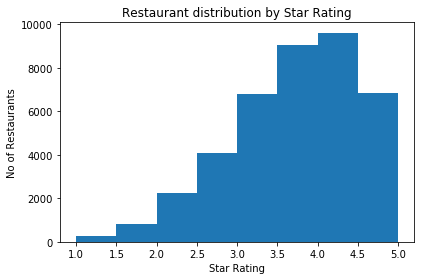

In [81]:
fig, ax = plt.subplots()
bins = [x/2. for x in range(2,11)]
ax.hist(us_restaurants['stars'], bins=bins)

ax.set_title("Restaurant distribution by Star Rating")
ax.set_xlabel("Star Rating")
ax.set_ylabel("No of Restaurants")
fig.tight_layout()

In [82]:
us_restaurants['state'].value_counts()

AZ    13242
NV     8897
OH     5634
NC     4663
PA     4382
WI     1870
IL      748
SC      274
NY       12
WA        2
CA        1
Name: state, dtype: int64

In [73]:
us_restaurants['stars'].value_counts()

4.0    9611
3.5    9072
3.0    6791
4.5    5233
2.5    4062
2.0    2229
5.0    1618
1.5     835
1.0     274
Name: stars, dtype: int64

In [130]:
one_star = us_restaurants[restaurants_df['stars'].isin([1,1.5])]
one_star = one_star.reset_index(drop=True)
five_star = us_restaurants[restaurants_df['stars'].isin([4.5,5])]
five_star = five_star.reset_index(drop=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [147]:
delivery_list_1 = [r.get('RestaurantsDelivery') for r in one_star['attributes']]
delivery_list_5 = [r.get('RestaurantsDelivery') for r in five_star['attributes']]

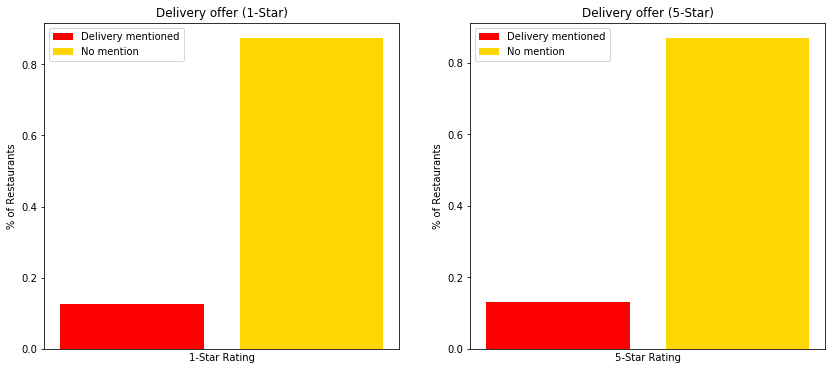

In [161]:
delivery_percent_1 = delivery_list_1.count(True)/len(delivery_list_1)
delivery_percent_5 = delivery_list_5.count(True)/len(delivery_list_5)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

ax1.bar(1,delivery_percent_1, color='red',label='Delivery mentioned')
ax1.bar(2,(1- delivery_percent_1), color='gold',label='No mention')

ax2.bar(1,delivery_percent_5, color='red',label='Delivery mentioned')
ax2.bar(2,(1- delivery_percent_5), color='gold',label='No mention')

ax1.set_title("Delivery offer (1-Star)")
ax1.set_xlabel("1-Star Rating")
ax1.set_ylabel("% of Restaurants")
ax1.set_xticks([], minor=False)
ax1.legend()

ax2.set_title("Delivery offer (5-Star)")
ax2.set_xlabel("5-Star Rating")
ax2.set_ylabel("% of Restaurants")
ax2.set_xticks([], minor=False)

ax2.legend()
fig.tight_layout()

In [150]:
delivery_percent_1, delivery_percent_5

(0.12623985572587917, 0.1315136476426799)